## Data Cleaning

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [5]:
def check_detail(dataframe):
    d = {'SHAPE': dataframe.shape,
        'COLUMNS': dataframe.columns,
        'INDEX': dataframe.index,
        'VALUE TYPES': dataframe.dtypes,
        'DUPLICATED VALUES': dataframe.duplicated().sum(),
        'NUMBER OF UNIQUE VALUES': dataframe.nunique(),
        'ANY MISSING VALUES': dataframe.isnull().values.any(),
        'MISSING VALUES': dataframe.isnull().sum(),
        'DESCRIBE.T': dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T}
    hashtags = '---------------------------'
    for key, val in d.items():
        print(f'{hashtags} {key} {hashtags}')
        print(val)
    print(f'{hashtags} {"LIST END"} {hashtags}')
   

check_detail(dataframe=train)
check_detail(dataframe=test)

--------------------------- SHAPE ---------------------------
(1460, 81)
--------------------------- COLUMNS ---------------------------
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'Fir

## Exploratory Data Analysis

First we need to separate the data into the different data types

In [6]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'O']  # Categorical columns
    num_but_cat = [col for col in dataframe.columns if
                   dataframe[col].nunique() < cat_th and dataframe[col].dtype != 'O']  # Numeric but categorical
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and dataframe[col].dtype == 'O']  # Categorical but cardinal
    cat_cols += num_but_cat  # Combine categorical columns
    cat_cols = [col for col in cat_cols if col not in cat_but_car]  # Exclude cardinal columns from categorical columns

    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != 'O']  # Numerical columns
    num_cols = [col for col in num_cols if col not in num_but_cat]  # Exclude numeric-looking categories

    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [7]:
def identify_check(dataframe):
    print('-' * 80)
    print(f'Categorical : {cat_cols}')
    print('-' * 80)
    print(f'Numerical : {num_cols}')
    print('-' * 80)
    print(f'Categorical but Cardinal : {cat_but_car}')


In [8]:
cat_cols, num_cols, cat_but_car = grab_col_names(train, car_th=25)
identify_check(train)

Observations: 1460
Variables: 81
cat_cols: 54
num_cols: 27
cat_but_car: 0
num_but_cat: 11
--------------------------------------------------------------------------------
Categorical : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'PoolArea', 'YrSold']
--------------------------------------------------------------------------------
N

In [1]:
def to_analysis_cat(dataframe, c_cols, ratio=False, plot=False):
    print('-' * 80)
    if dataframe[c_cols].dtype == 'bool':
        dataframe[c_cols] = dataframe[c_cols].astype(int)

    if ratio:
        print(pd.DataFrame({c_cols: dataframe[c_cols].value_counts(),
                            'Ratio (%)': 100 * dataframe[c_cols].value_counts() / len(dataframe)}))
    print('-' * 80)
    if plot:
        values = dataframe[c_cols].value_counts()
        fig, axes = plt.subplots(1, len(values), figsize=(len(values) * 8, 9))

        for i, (index, value) in enumerate(values.items()):
            ax = axes[i]
            ax.pie([value, len(dataframe) - value], labels=[f'{index} ({value})', f'Others ({len(dataframe) - value})'],
                   colors=['#94bcfb', '#bad6fc', '#fffacd'], autopct='%1.1f%%', startangle=90)
            ax.set_title(f'{c_cols} - {index}')
            ax.axis('equal') 

        plt.suptitle(f'RATIO by {c_cols}', y=1.05, fontsize=20)
        plt.tight_layout()
        plt.show()

--------------------------------------------------------------------------------
          MSZoning  Ratio (%)
MSZoning                     
RL            1151  78.835616
RM             218  14.931507
FV              65   4.452055
RH              16   1.095890
C (all)         10   0.684932
--------------------------------------------------------------------------------


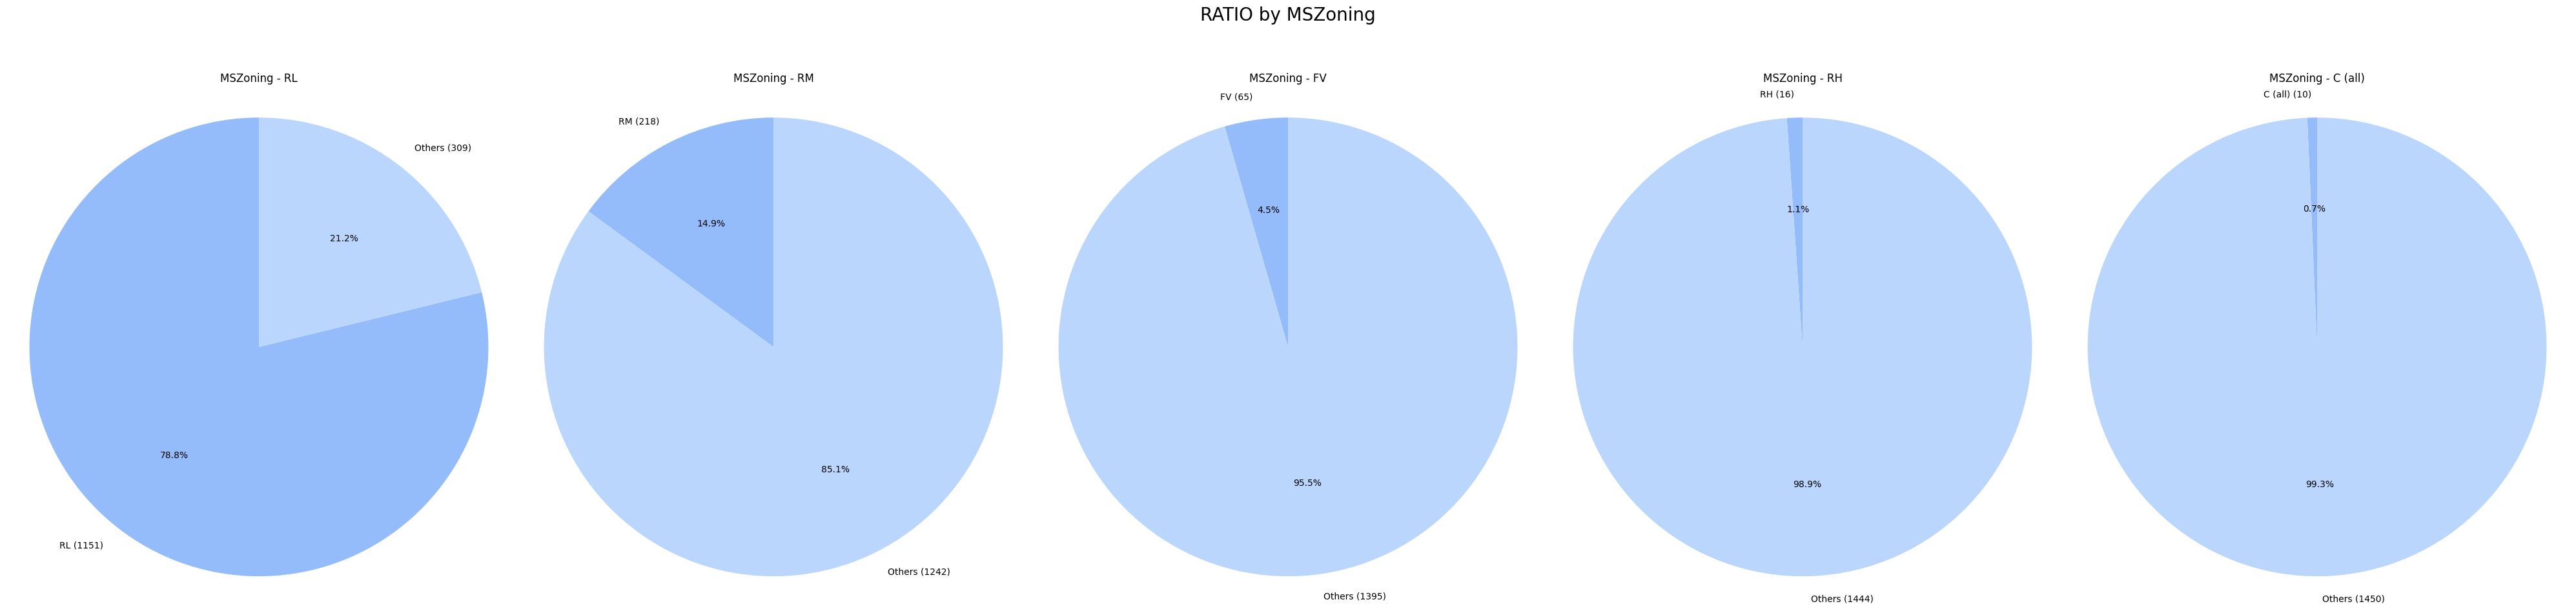

--------------------------------------------------------------------------------
        Street  Ratio (%)
Street                   
Pave      1454  99.589041
Grvl         6   0.410959
--------------------------------------------------------------------------------


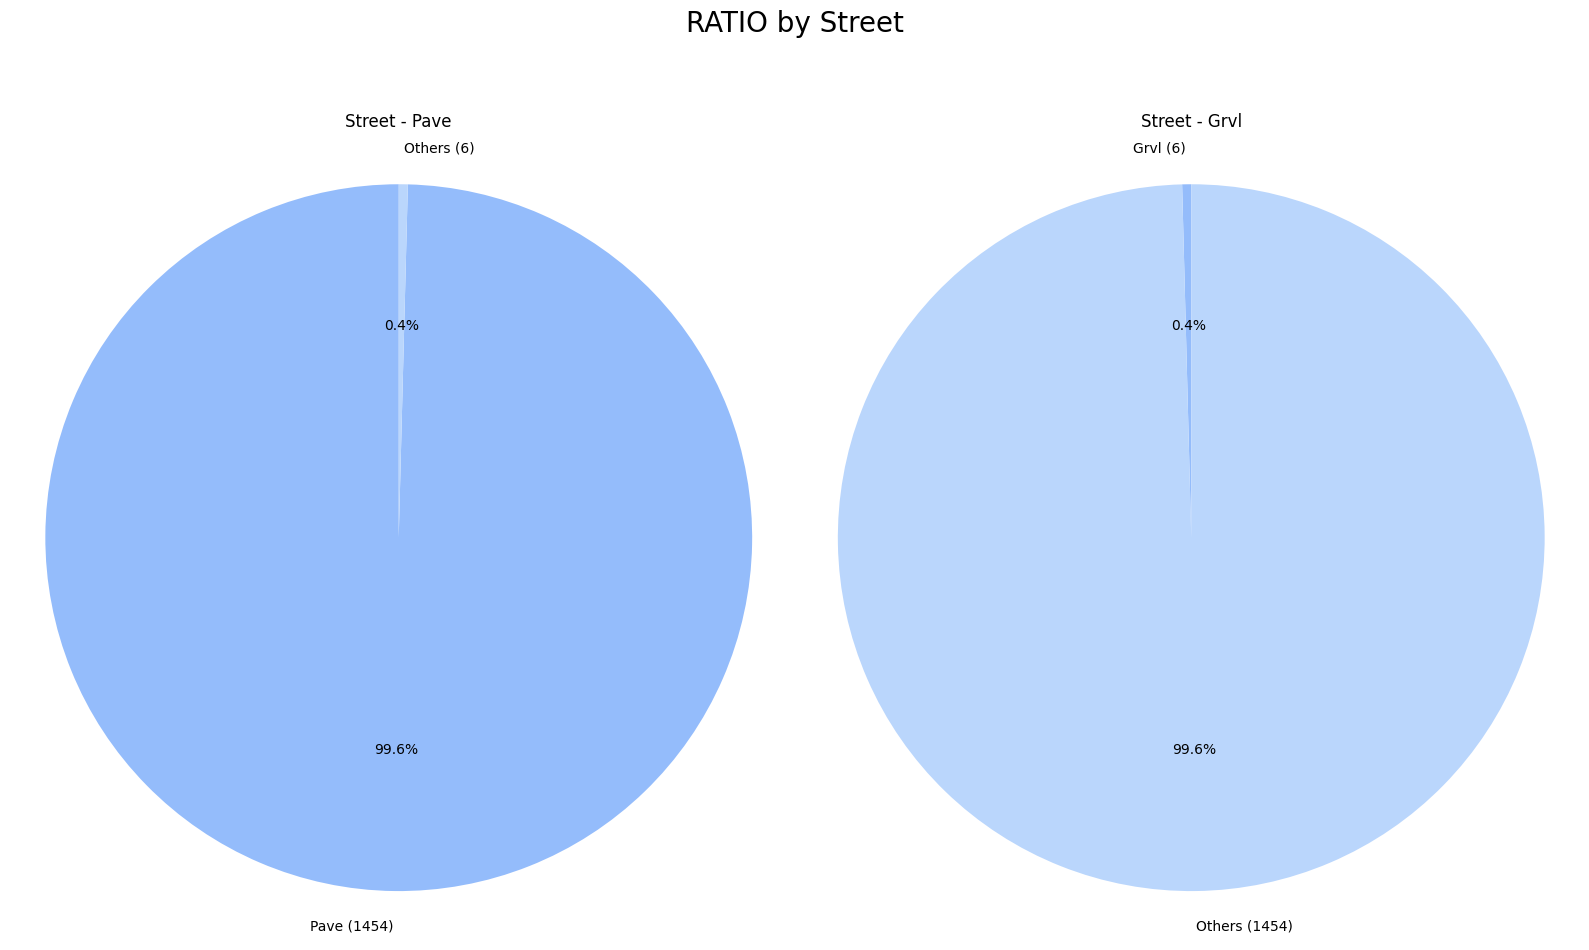

--------------------------------------------------------------------------------
       Alley  Ratio (%)
Alley                  
Grvl      50   3.424658
Pave      41   2.808219
--------------------------------------------------------------------------------


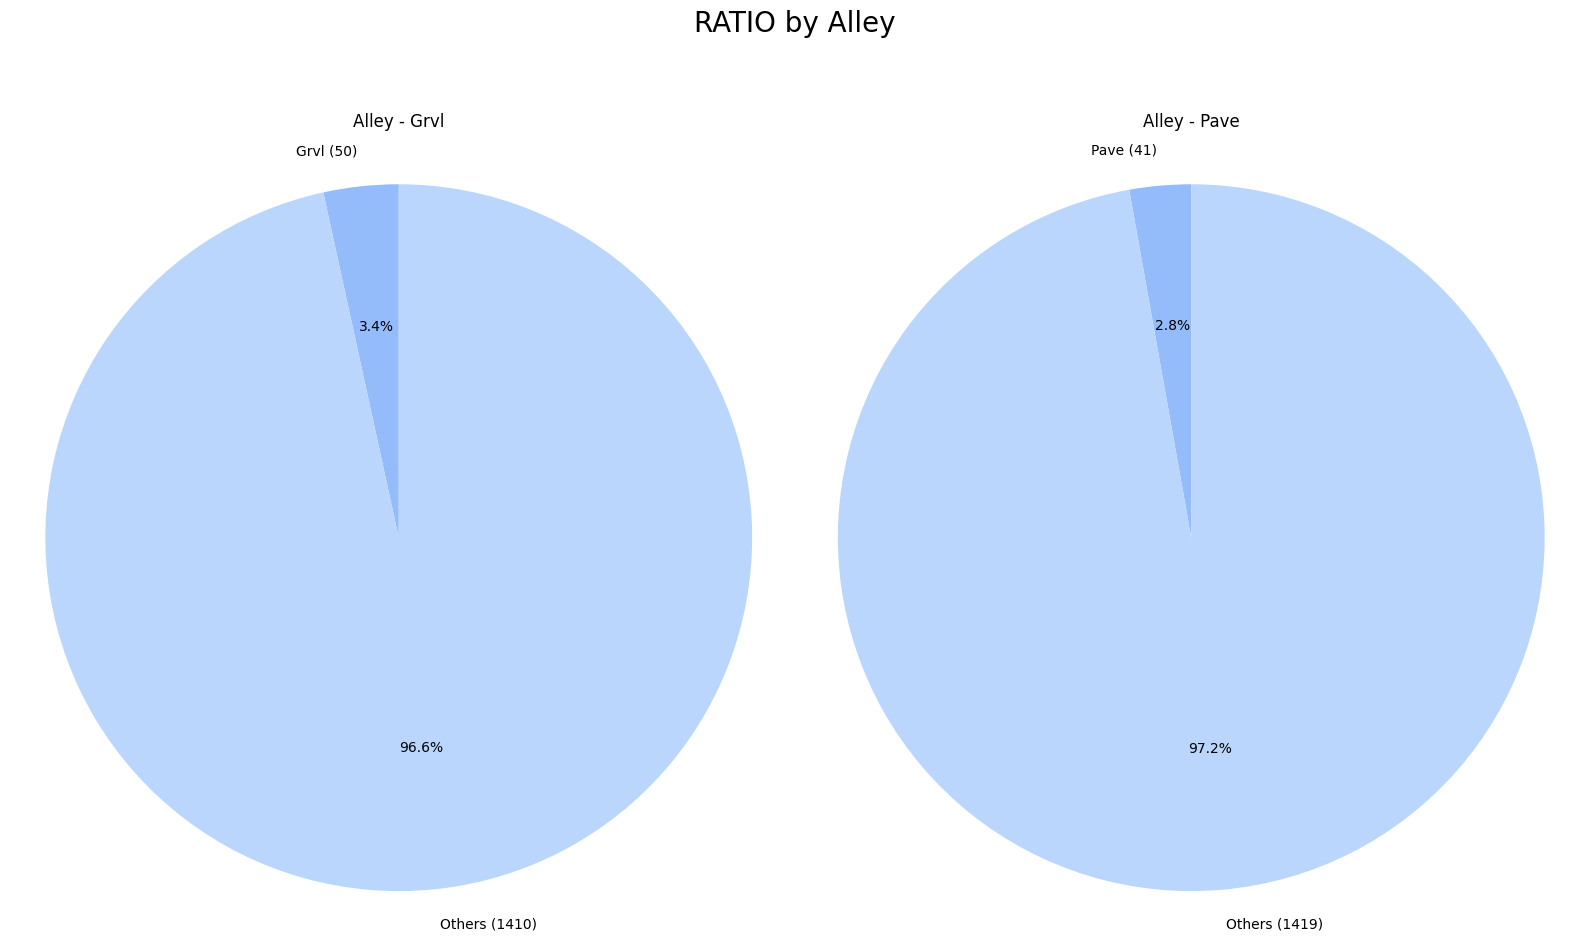

--------------------------------------------------------------------------------
          LotShape  Ratio (%)
LotShape                     
Reg            925  63.356164
IR1            484  33.150685
IR2             41   2.808219
IR3             10   0.684932
--------------------------------------------------------------------------------


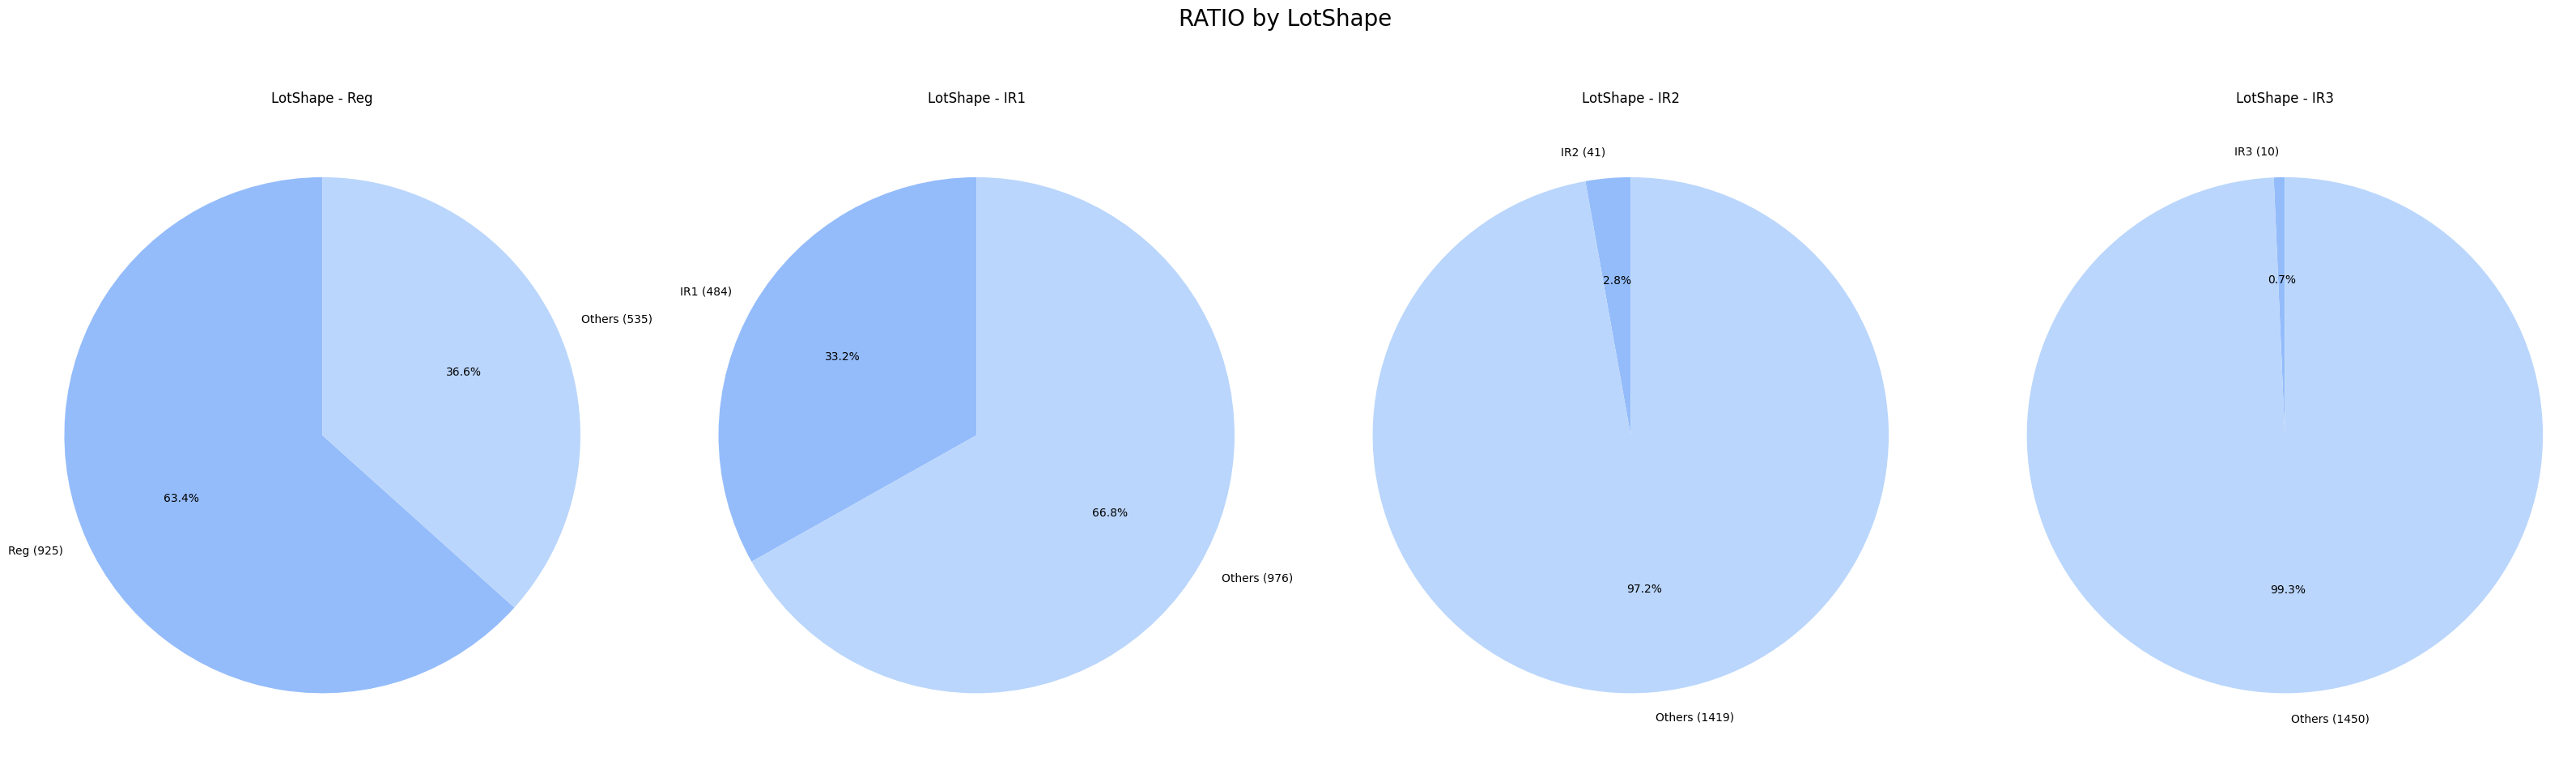

--------------------------------------------------------------------------------
             LandContour  Ratio (%)
LandContour                        
Lvl                 1311  89.794521
Bnk                   63   4.315068
HLS                   50   3.424658
Low                   36   2.465753
--------------------------------------------------------------------------------


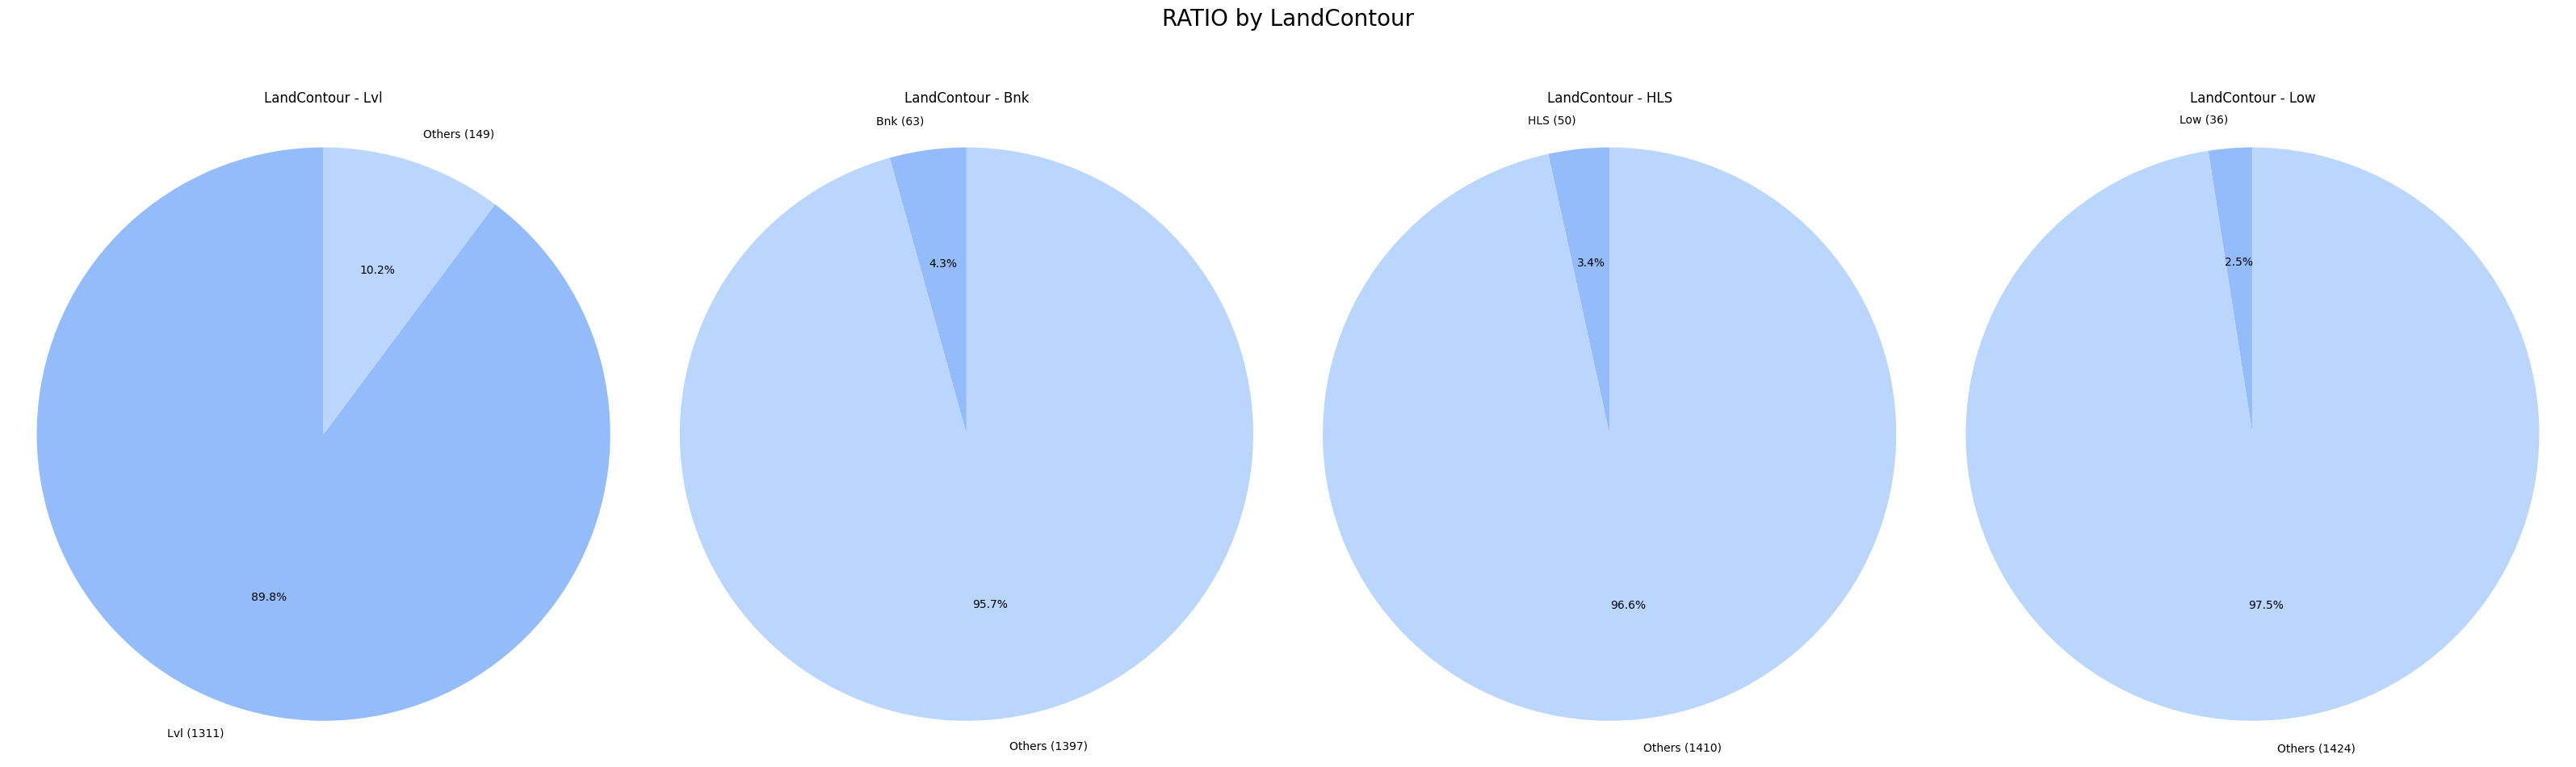

--------------------------------------------------------------------------------
           Utilities  Ratio (%)
Utilities                      
AllPub          1459  99.931507
NoSeWa             1   0.068493
--------------------------------------------------------------------------------


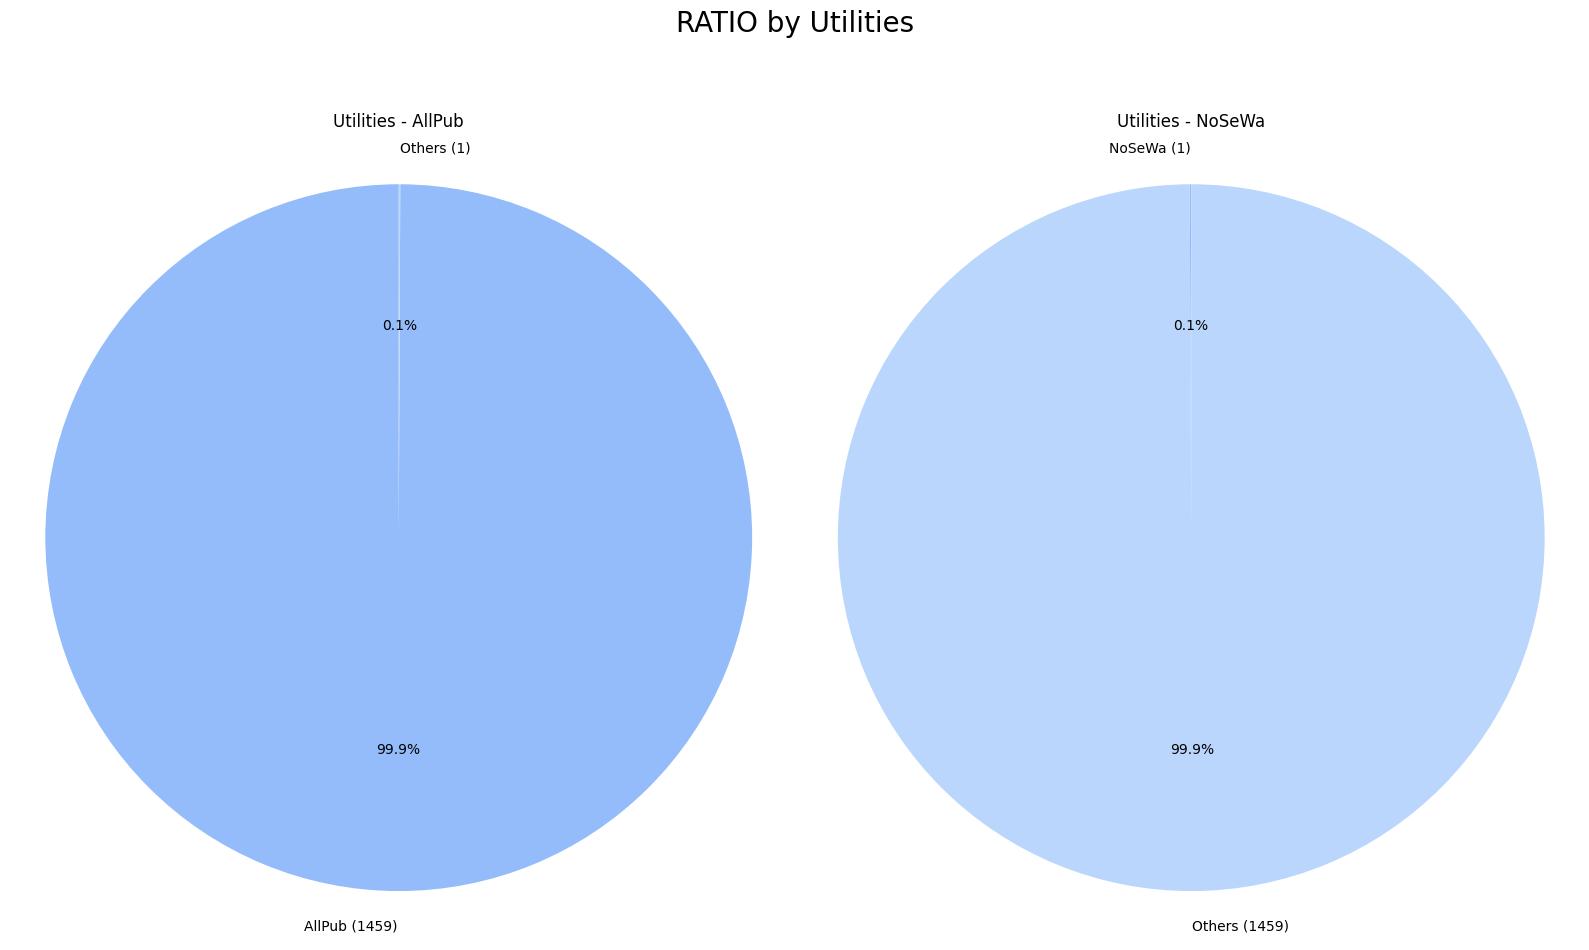

--------------------------------------------------------------------------------
           LotConfig  Ratio (%)
LotConfig                      
Inside          1052  72.054795
Corner           263  18.013699
CulDSac           94   6.438356
FR2               47   3.219178
FR3                4   0.273973
--------------------------------------------------------------------------------


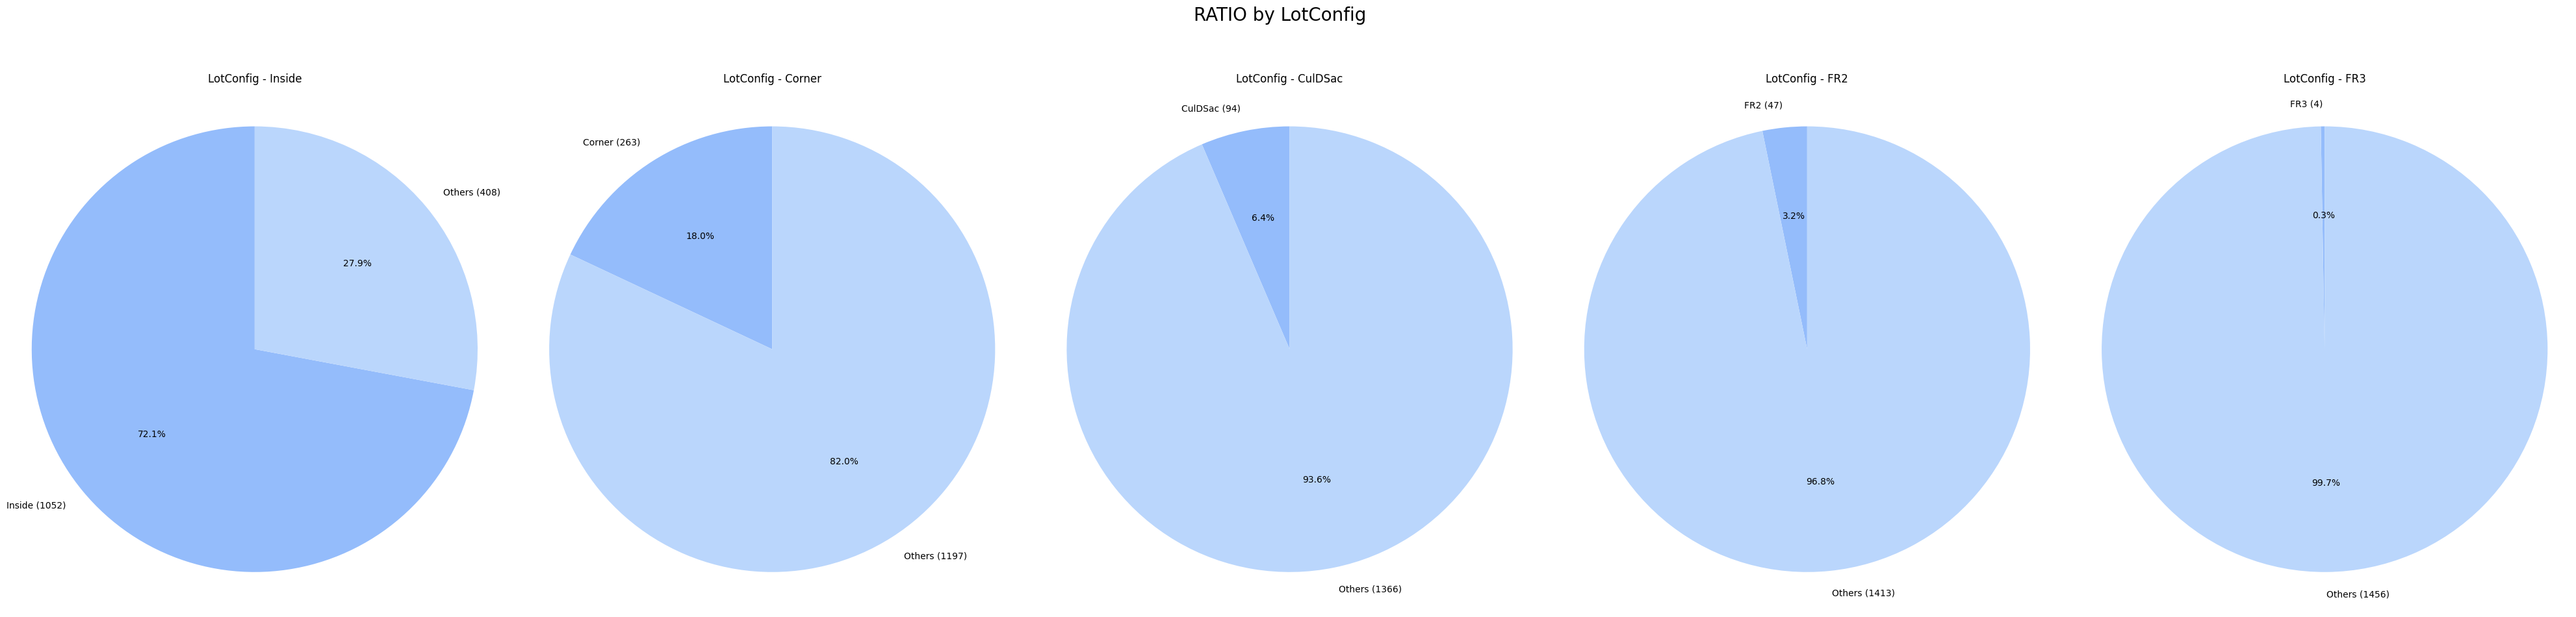

--------------------------------------------------------------------------------
           LandSlope  Ratio (%)
LandSlope                      
Gtl             1382  94.657534
Mod               65   4.452055
Sev               13   0.890411
--------------------------------------------------------------------------------


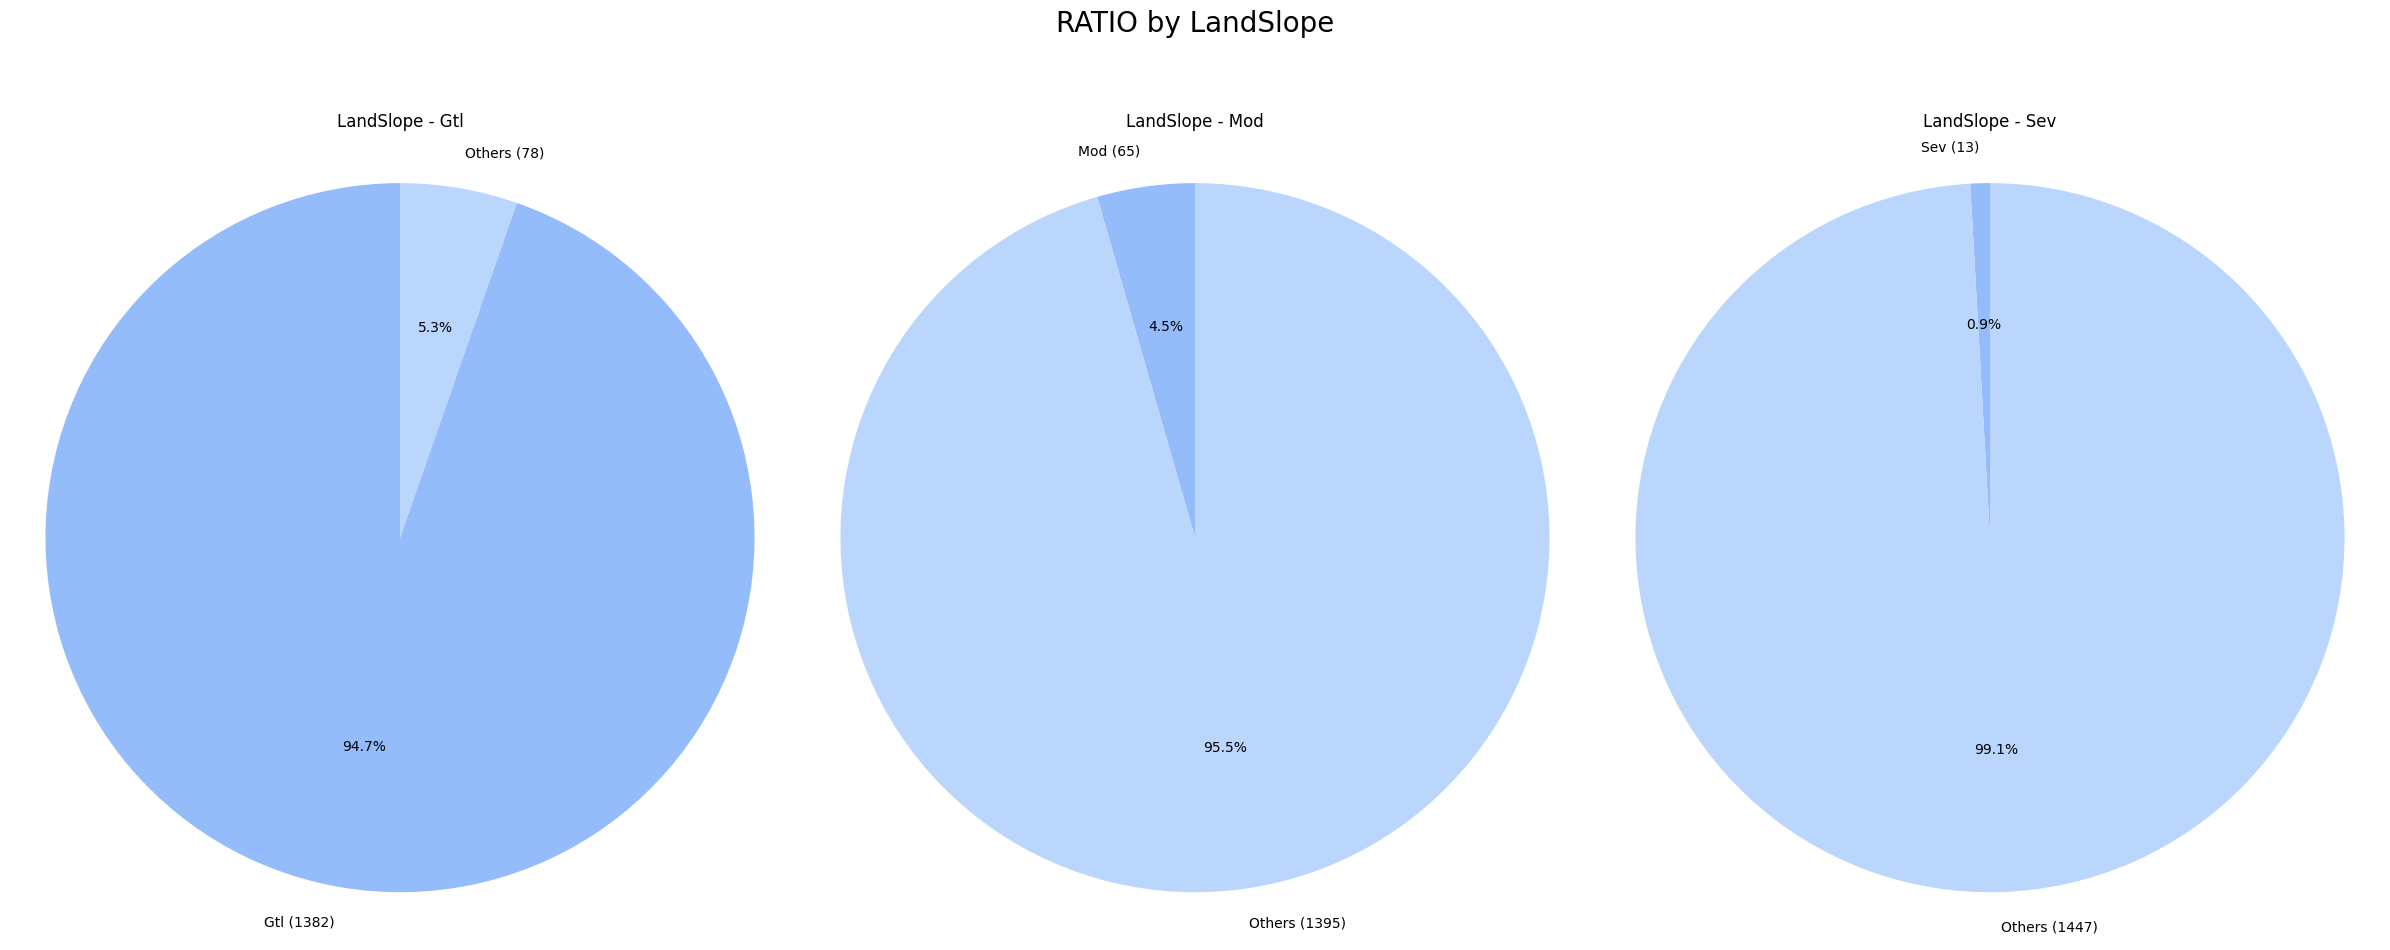

--------------------------------------------------------------------------------
              Neighborhood  Ratio (%)
Neighborhood                         
NAmes                  225  15.410959
CollgCr                150  10.273973
OldTown                113   7.739726
Edwards                100   6.849315
Somerst                 86   5.890411
Gilbert                 79   5.410959
NridgHt                 77   5.273973
Sawyer                  74   5.068493
NWAmes                  73   5.000000
SawyerW                 59   4.041096
BrkSide                 58   3.972603
Crawfor                 51   3.493151
Mitchel                 49   3.356164
NoRidge                 41   2.808219
Timber                  38   2.602740
IDOTRR                  37   2.534247
ClearCr                 28   1.917808
SWISU                   25   1.712329
StoneBr                 25   1.712329
Blmngtn                 17   1.164384
MeadowV                 17   1.164384
BrDale                  16   1.095890
Veenker

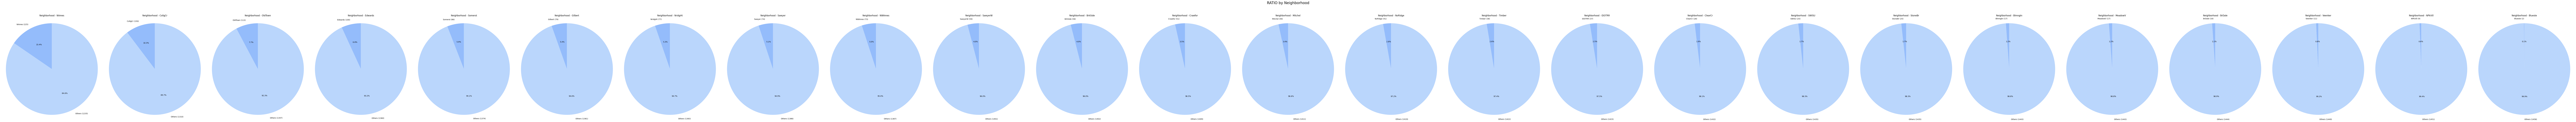

--------------------------------------------------------------------------------
            Condition1  Ratio (%)
Condition1                       
Norm              1260  86.301370
Feedr               81   5.547945
Artery              48   3.287671
RRAn                26   1.780822
PosN                19   1.301370
RRAe                11   0.753425
PosA                 8   0.547945
RRNn                 5   0.342466
RRNe                 2   0.136986
--------------------------------------------------------------------------------


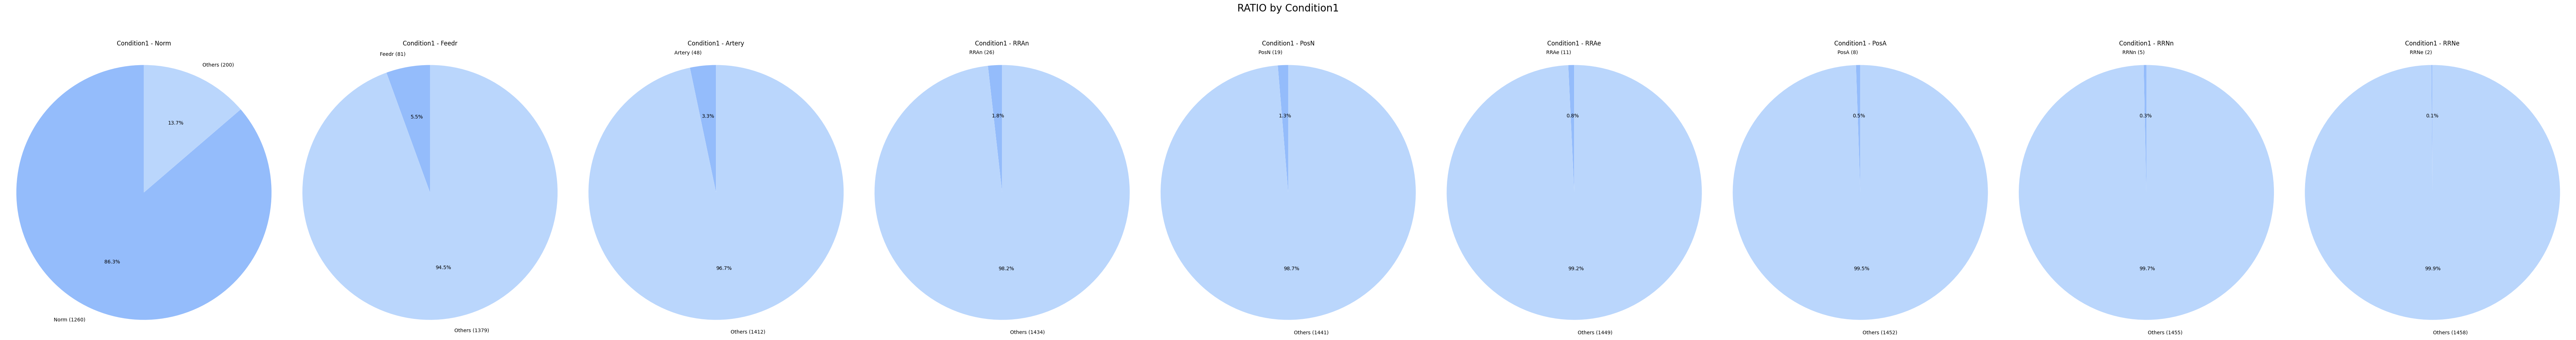

--------------------------------------------------------------------------------
            Condition2  Ratio (%)
Condition2                       
Norm              1445  98.972603
Feedr                6   0.410959
Artery               2   0.136986
RRNn                 2   0.136986
PosN                 2   0.136986
PosA                 1   0.068493
RRAn                 1   0.068493
RRAe                 1   0.068493
--------------------------------------------------------------------------------


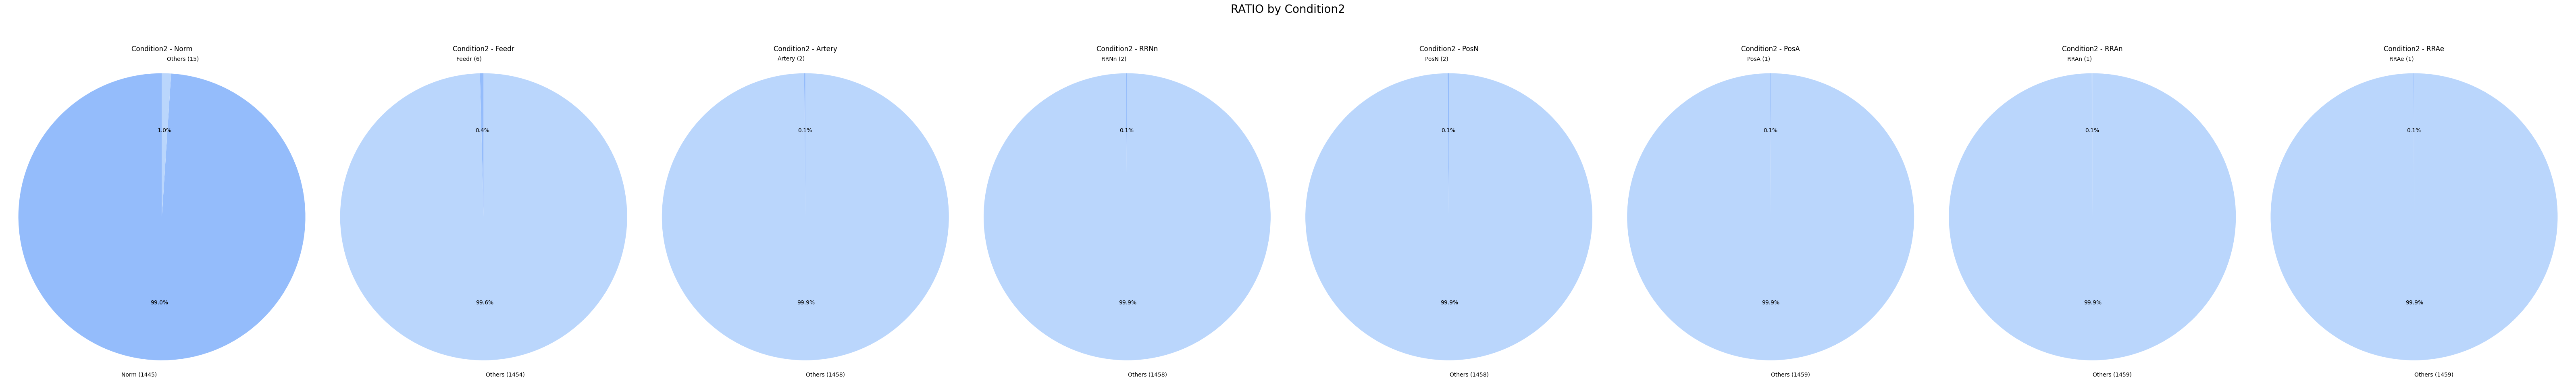

--------------------------------------------------------------------------------
          BldgType  Ratio (%)
BldgType                     
1Fam          1220  83.561644
TwnhsE         114   7.808219
Duplex          52   3.561644
Twnhs           43   2.945205
2fmCon          31   2.123288
--------------------------------------------------------------------------------


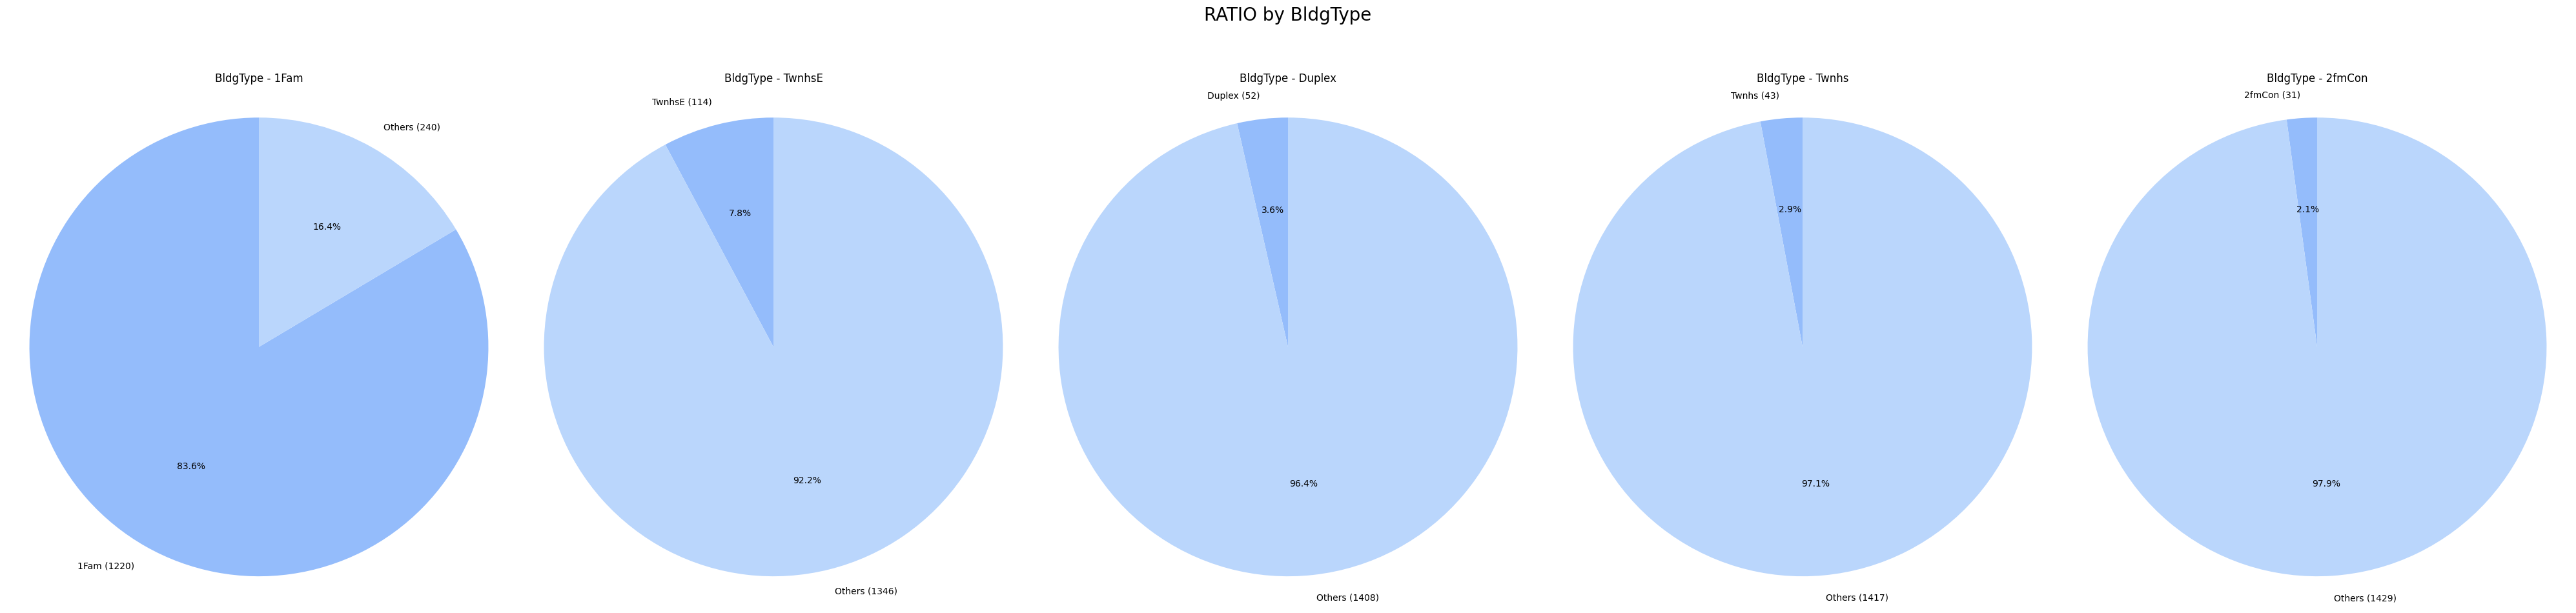

--------------------------------------------------------------------------------
            HouseStyle  Ratio (%)
HouseStyle                       
1Story             726  49.726027
2Story             445  30.479452
1.5Fin             154  10.547945
SLvl                65   4.452055
SFoyer              37   2.534247
1.5Unf              14   0.958904
2.5Unf              11   0.753425
2.5Fin               8   0.547945
--------------------------------------------------------------------------------


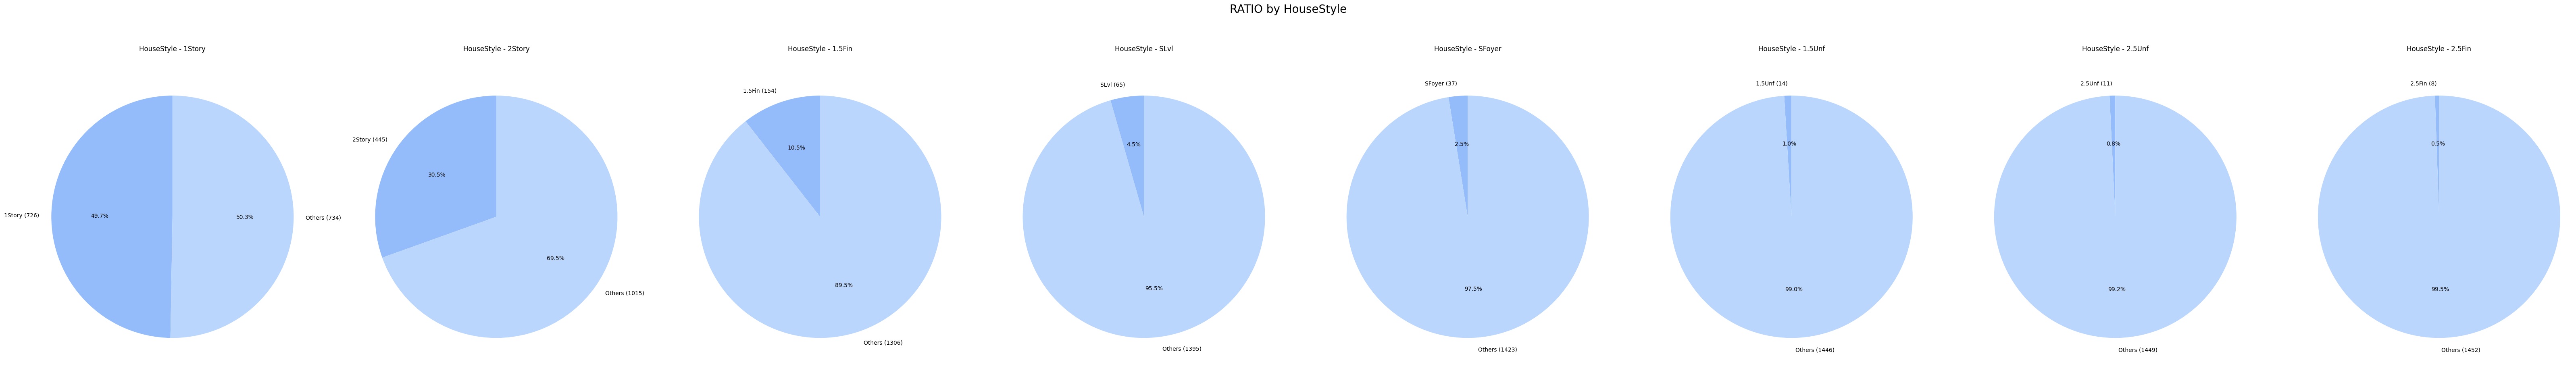

--------------------------------------------------------------------------------
           RoofStyle  Ratio (%)
RoofStyle                      
Gable           1141  78.150685
Hip              286  19.589041
Flat              13   0.890411
Gambrel           11   0.753425
Mansard            7   0.479452
Shed               2   0.136986
--------------------------------------------------------------------------------


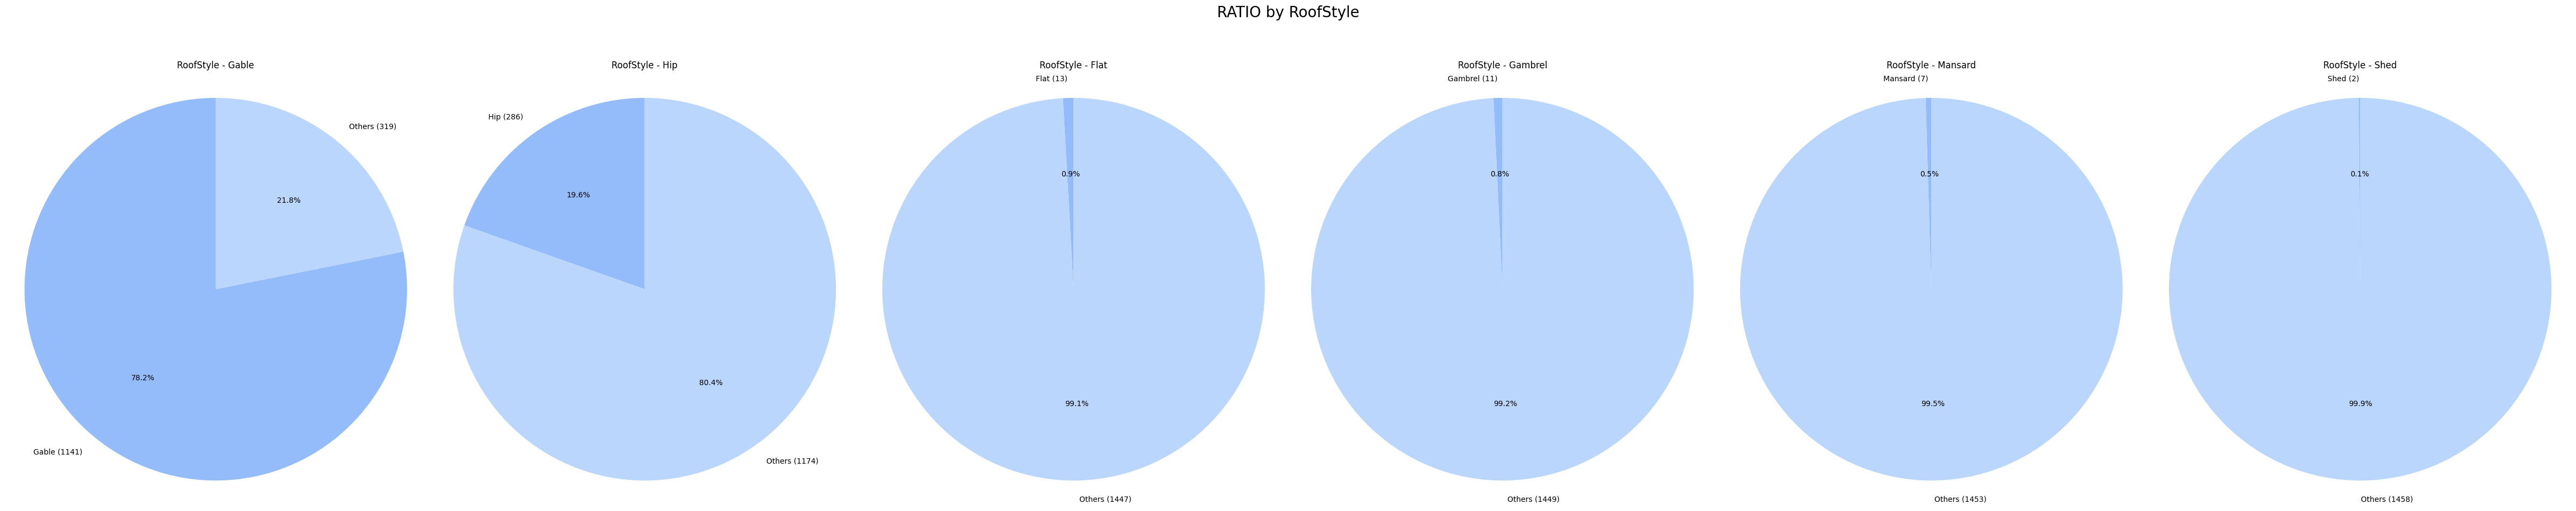

--------------------------------------------------------------------------------
          RoofMatl  Ratio (%)
RoofMatl                     
CompShg       1434  98.219178
Tar&Grv         11   0.753425
WdShngl          6   0.410959
WdShake          5   0.342466
Metal            1   0.068493
Membran          1   0.068493
Roll             1   0.068493
ClyTile          1   0.068493
--------------------------------------------------------------------------------


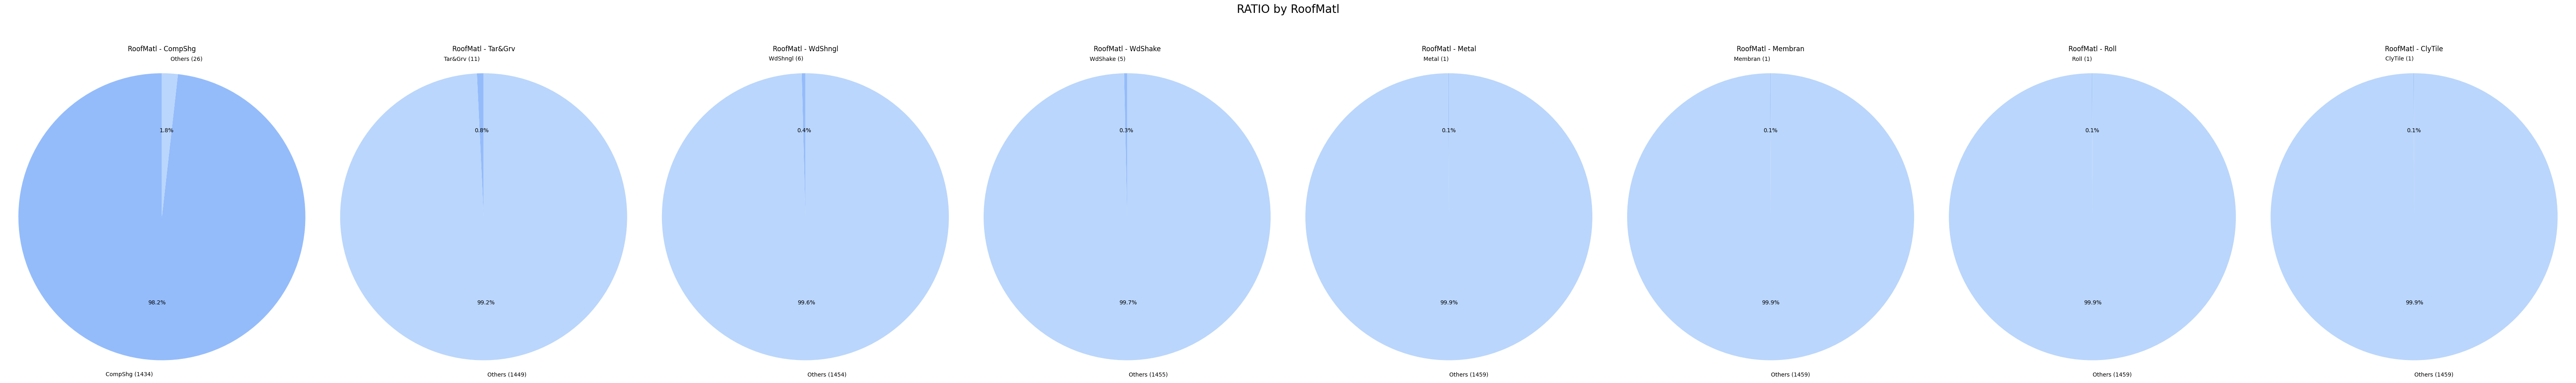

--------------------------------------------------------------------------------
             Exterior1st  Ratio (%)
Exterior1st                        
VinylSd              515  35.273973
HdBoard              222  15.205479
MetalSd              220  15.068493
Wd Sdng              206  14.109589
Plywood              108   7.397260
CemntBd               61   4.178082
BrkFace               50   3.424658
WdShing               26   1.780822
Stucco                25   1.712329
AsbShng               20   1.369863
BrkComm                2   0.136986
Stone                  2   0.136986
AsphShn                1   0.068493
ImStucc                1   0.068493
CBlock                 1   0.068493
--------------------------------------------------------------------------------


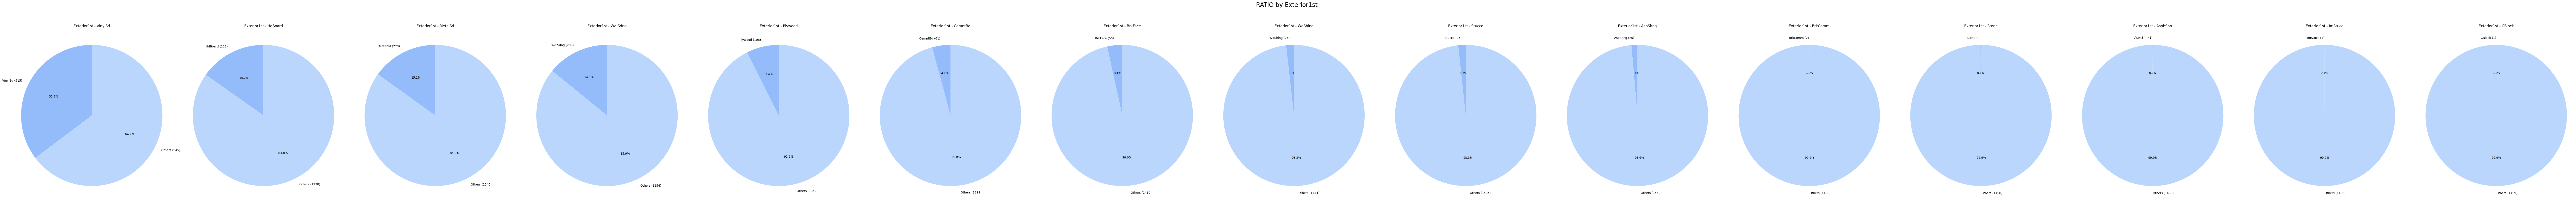

--------------------------------------------------------------------------------
             Exterior2nd  Ratio (%)
Exterior2nd                        
VinylSd              504  34.520548
MetalSd              214  14.657534
HdBoard              207  14.178082
Wd Sdng              197  13.493151
Plywood              142   9.726027
CmentBd               60   4.109589
Wd Shng               38   2.602740
Stucco                26   1.780822
BrkFace               25   1.712329
AsbShng               20   1.369863
ImStucc               10   0.684932
Brk Cmn                7   0.479452
Stone                  5   0.342466
AsphShn                3   0.205479
Other                  1   0.068493
CBlock                 1   0.068493
--------------------------------------------------------------------------------


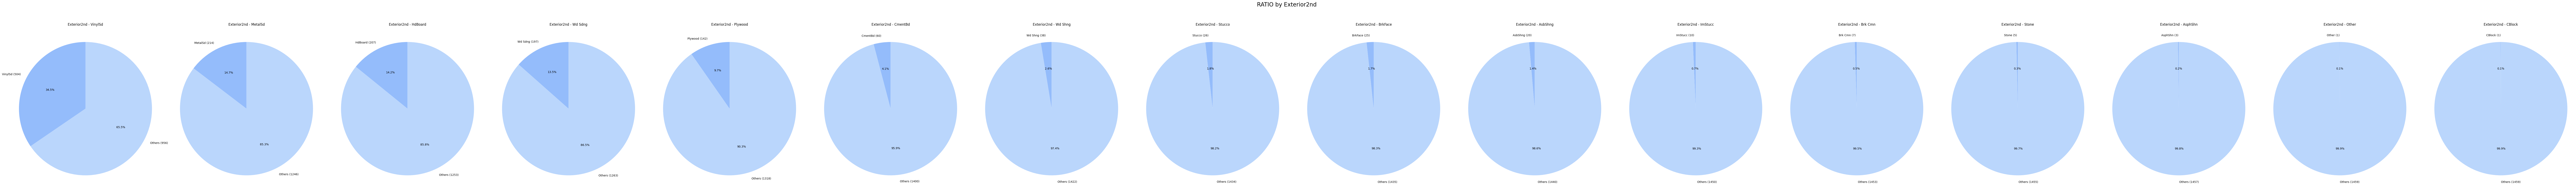

--------------------------------------------------------------------------------
            MasVnrType  Ratio (%)
MasVnrType                       
BrkFace            445  30.479452
Stone              128   8.767123
BrkCmn              15   1.027397
--------------------------------------------------------------------------------


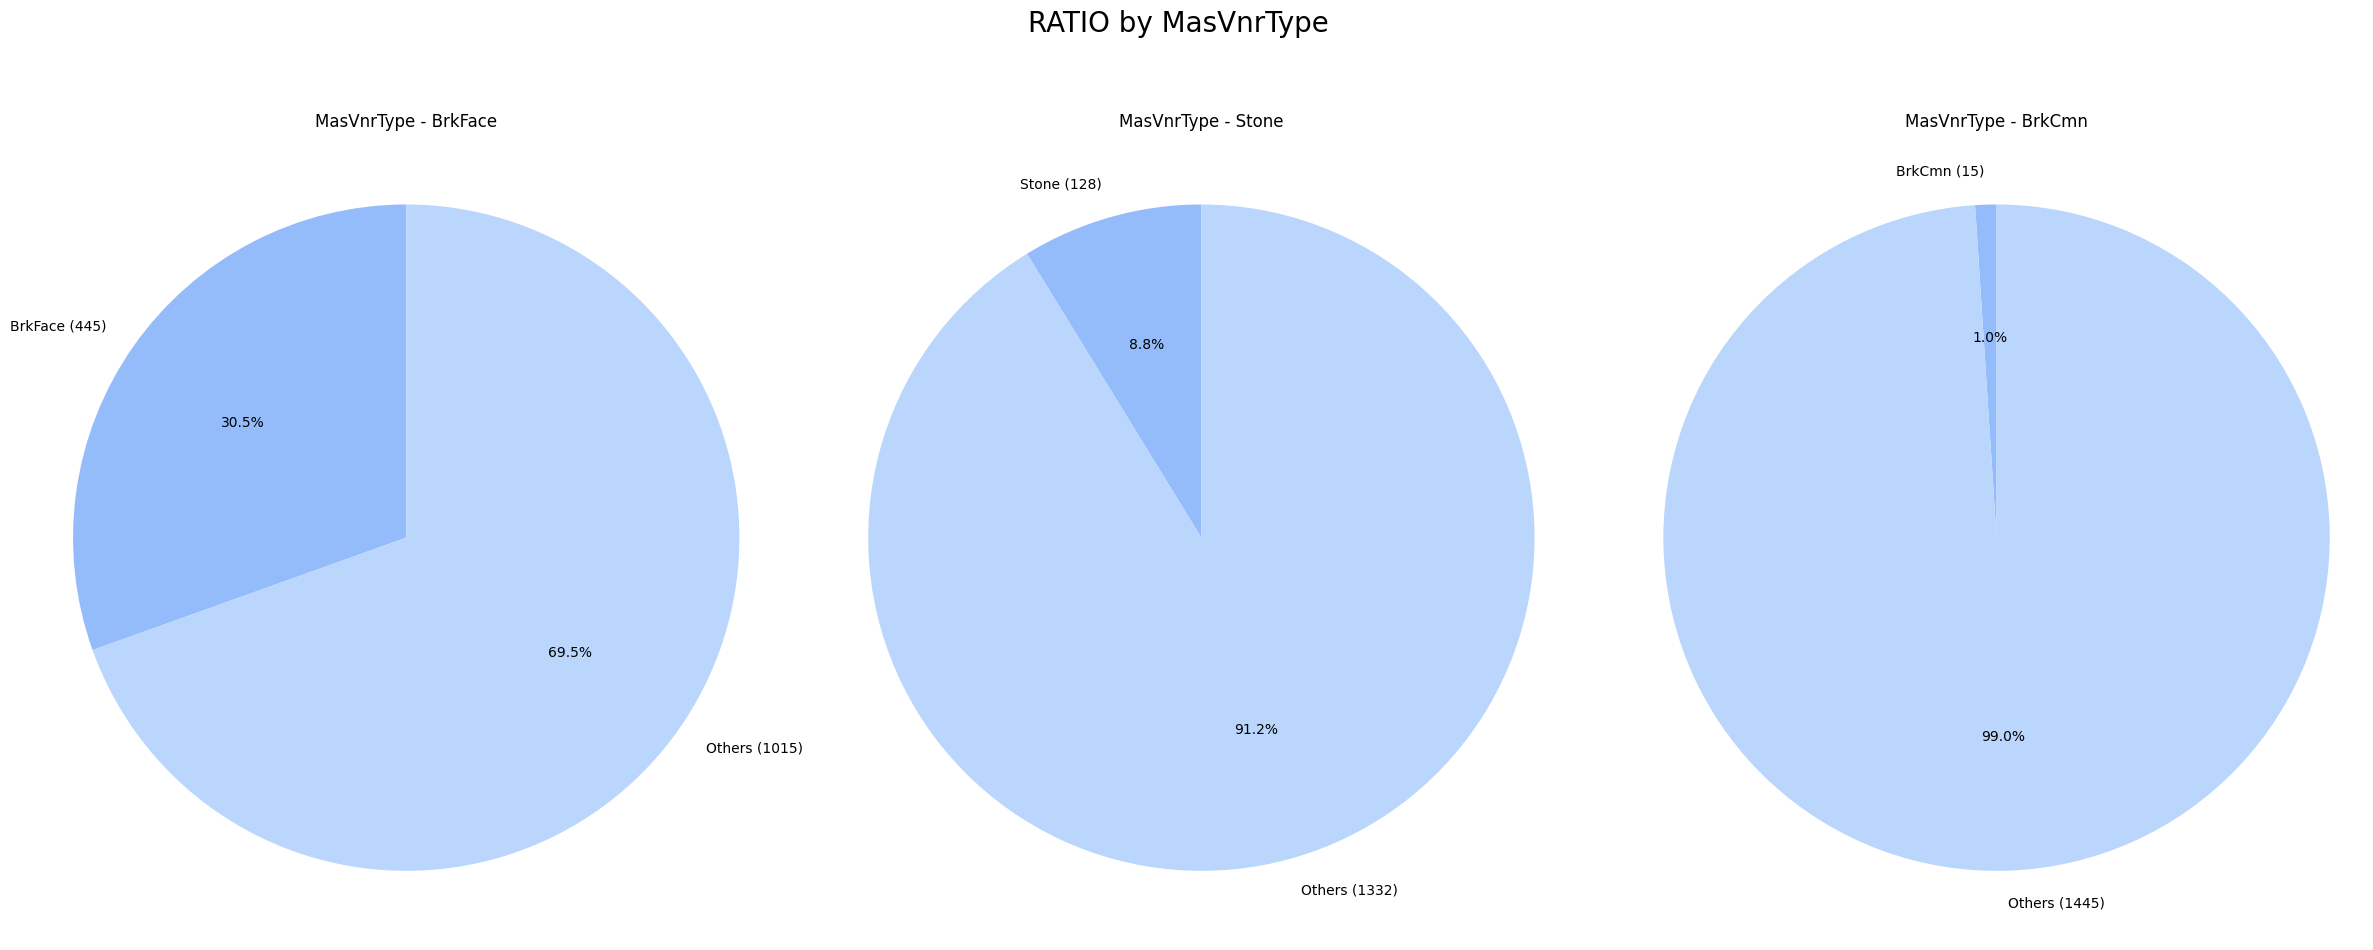

--------------------------------------------------------------------------------
           ExterQual  Ratio (%)
ExterQual                      
TA               906  62.054795
Gd               488  33.424658
Ex                52   3.561644
Fa                14   0.958904
--------------------------------------------------------------------------------


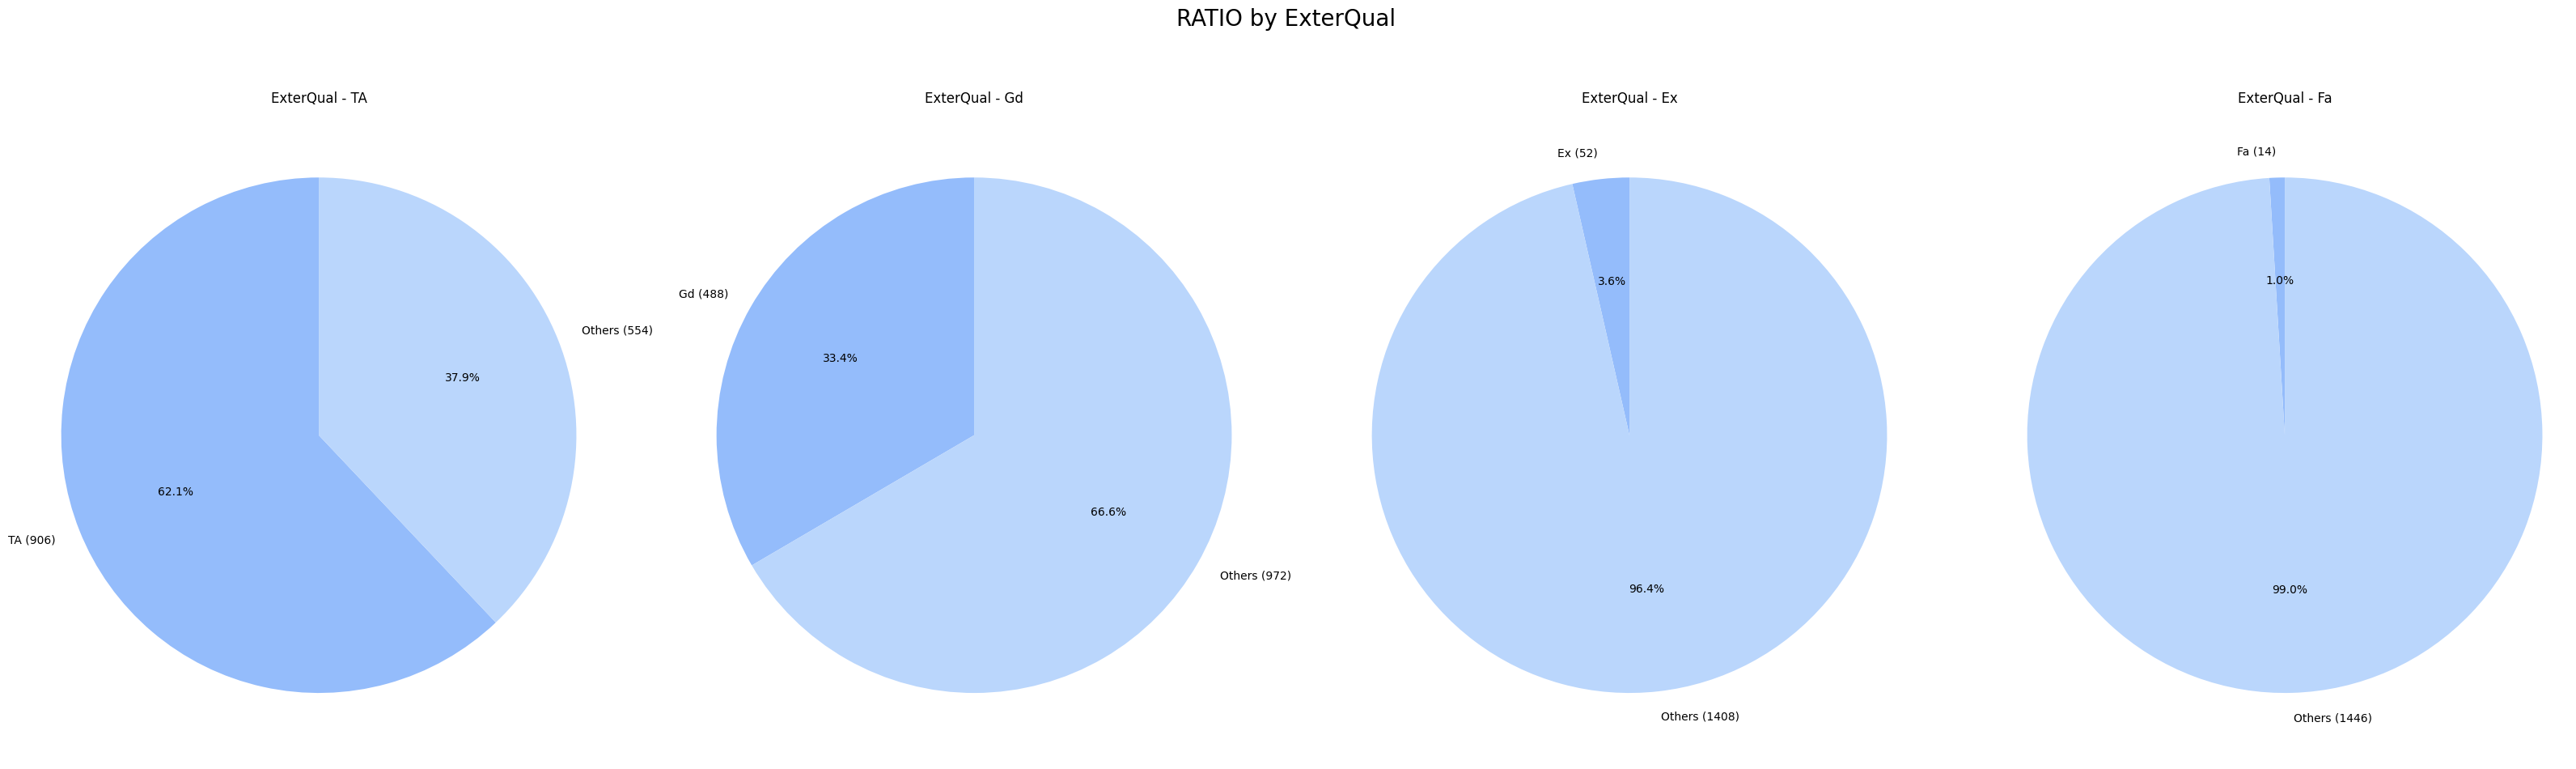

--------------------------------------------------------------------------------
           ExterCond  Ratio (%)
ExterCond                      
TA              1282  87.808219
Gd               146  10.000000
Fa                28   1.917808
Ex                 3   0.205479
Po                 1   0.068493
--------------------------------------------------------------------------------


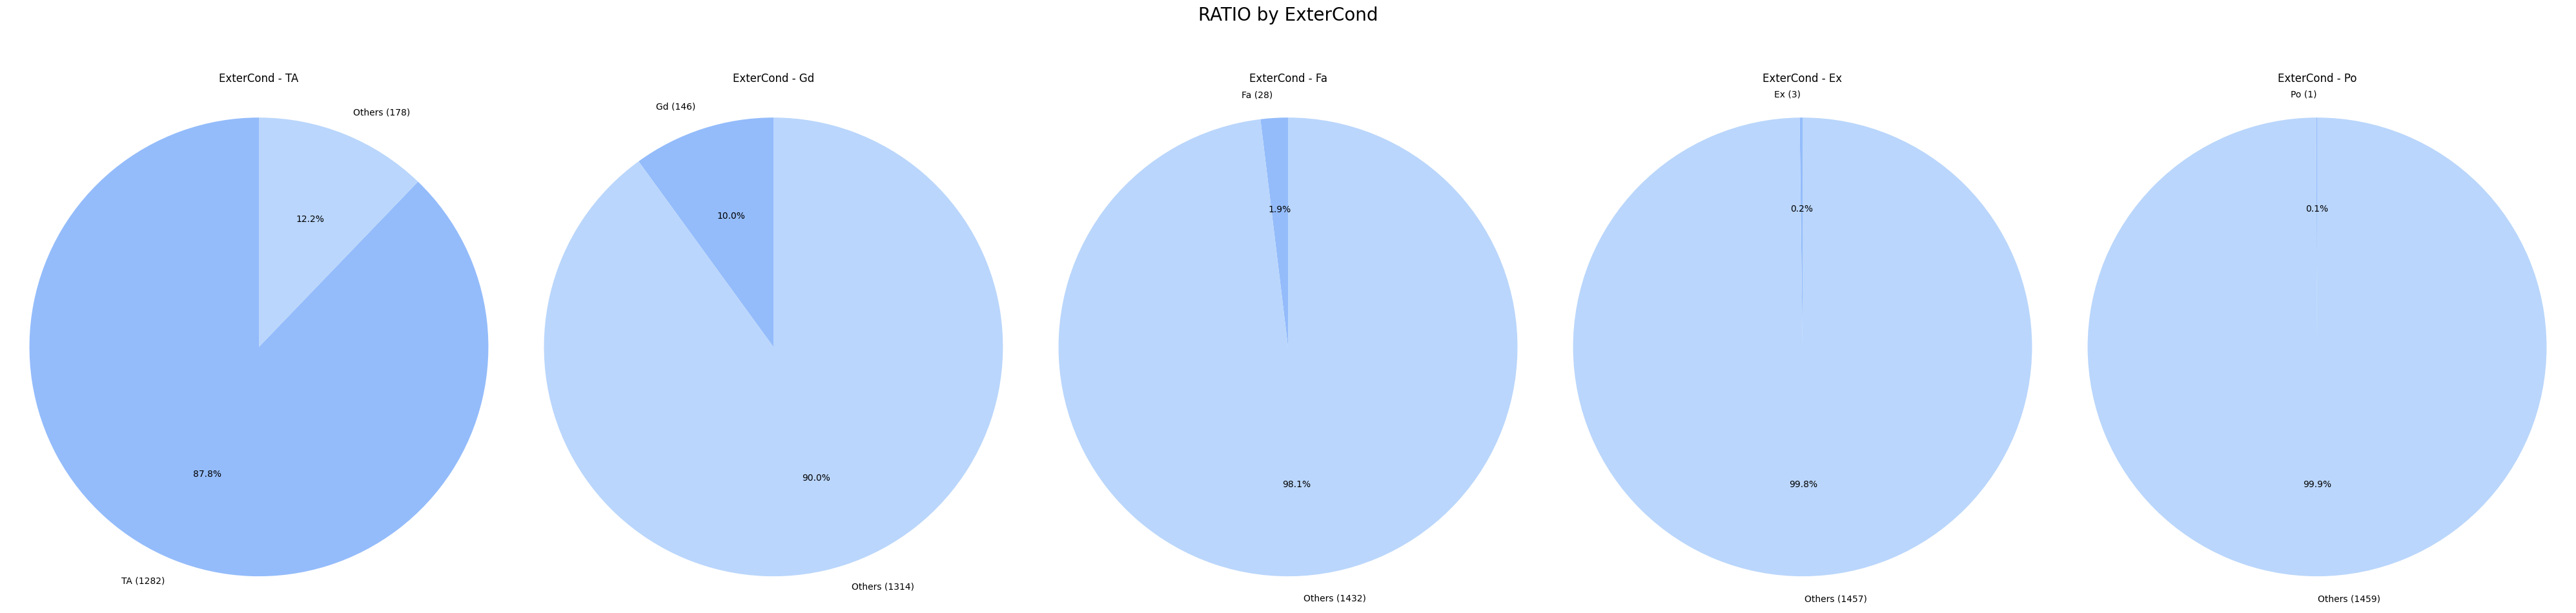

--------------------------------------------------------------------------------
            Foundation  Ratio (%)
Foundation                       
PConc              647  44.315068
CBlock             634  43.424658
BrkTil             146  10.000000
Slab                24   1.643836
Stone                6   0.410959
Wood                 3   0.205479
--------------------------------------------------------------------------------


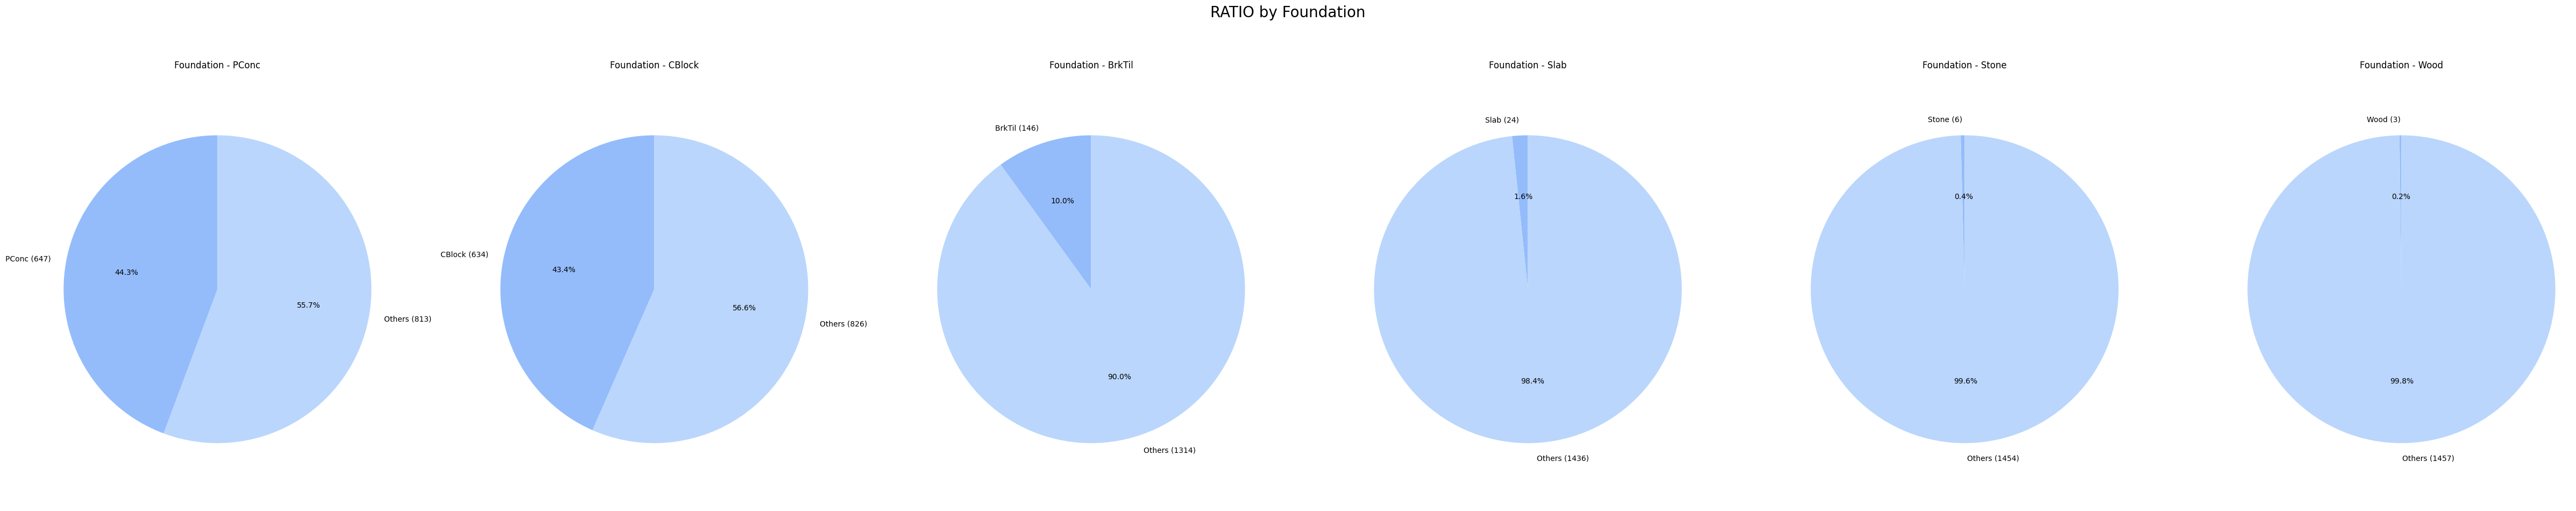

--------------------------------------------------------------------------------
          BsmtQual  Ratio (%)
BsmtQual                     
TA             649  44.452055
Gd             618  42.328767
Ex             121   8.287671
Fa              35   2.397260
--------------------------------------------------------------------------------


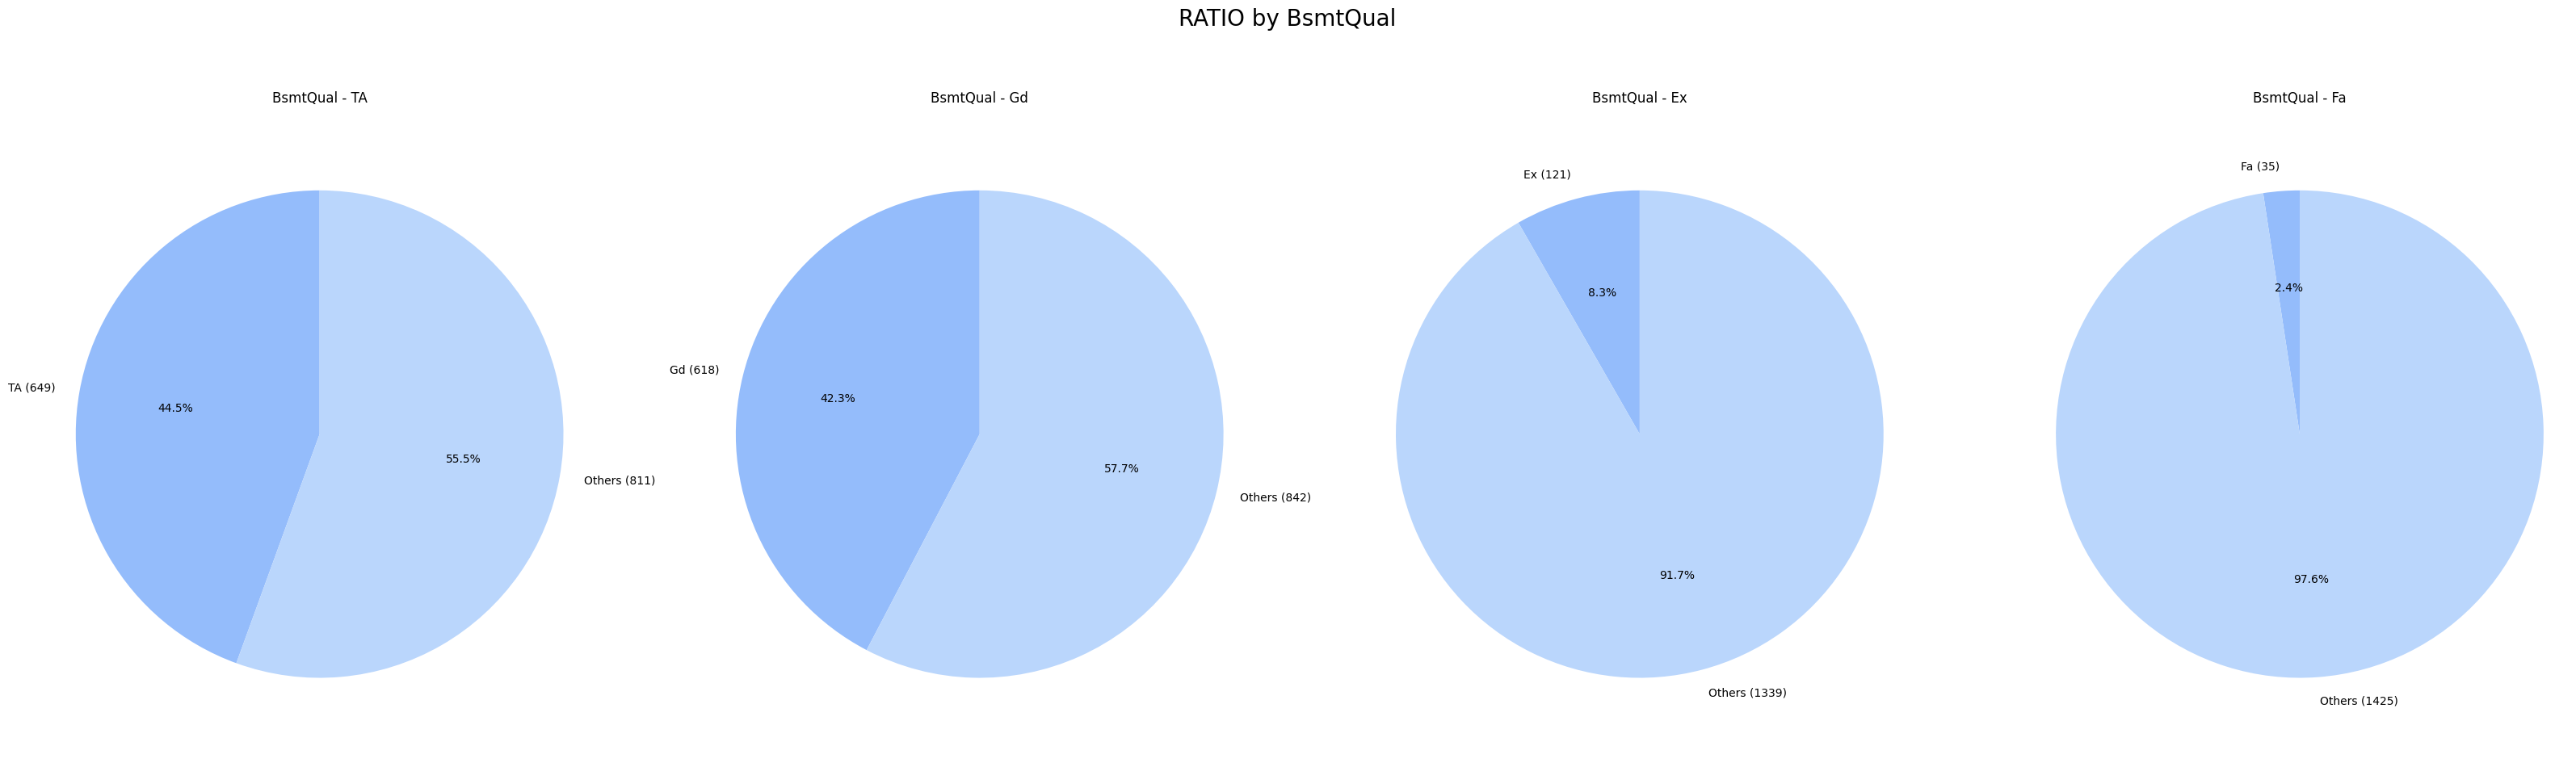

--------------------------------------------------------------------------------
          BsmtCond  Ratio (%)
BsmtCond                     
TA            1311  89.794521
Gd              65   4.452055
Fa              45   3.082192
Po               2   0.136986
--------------------------------------------------------------------------------


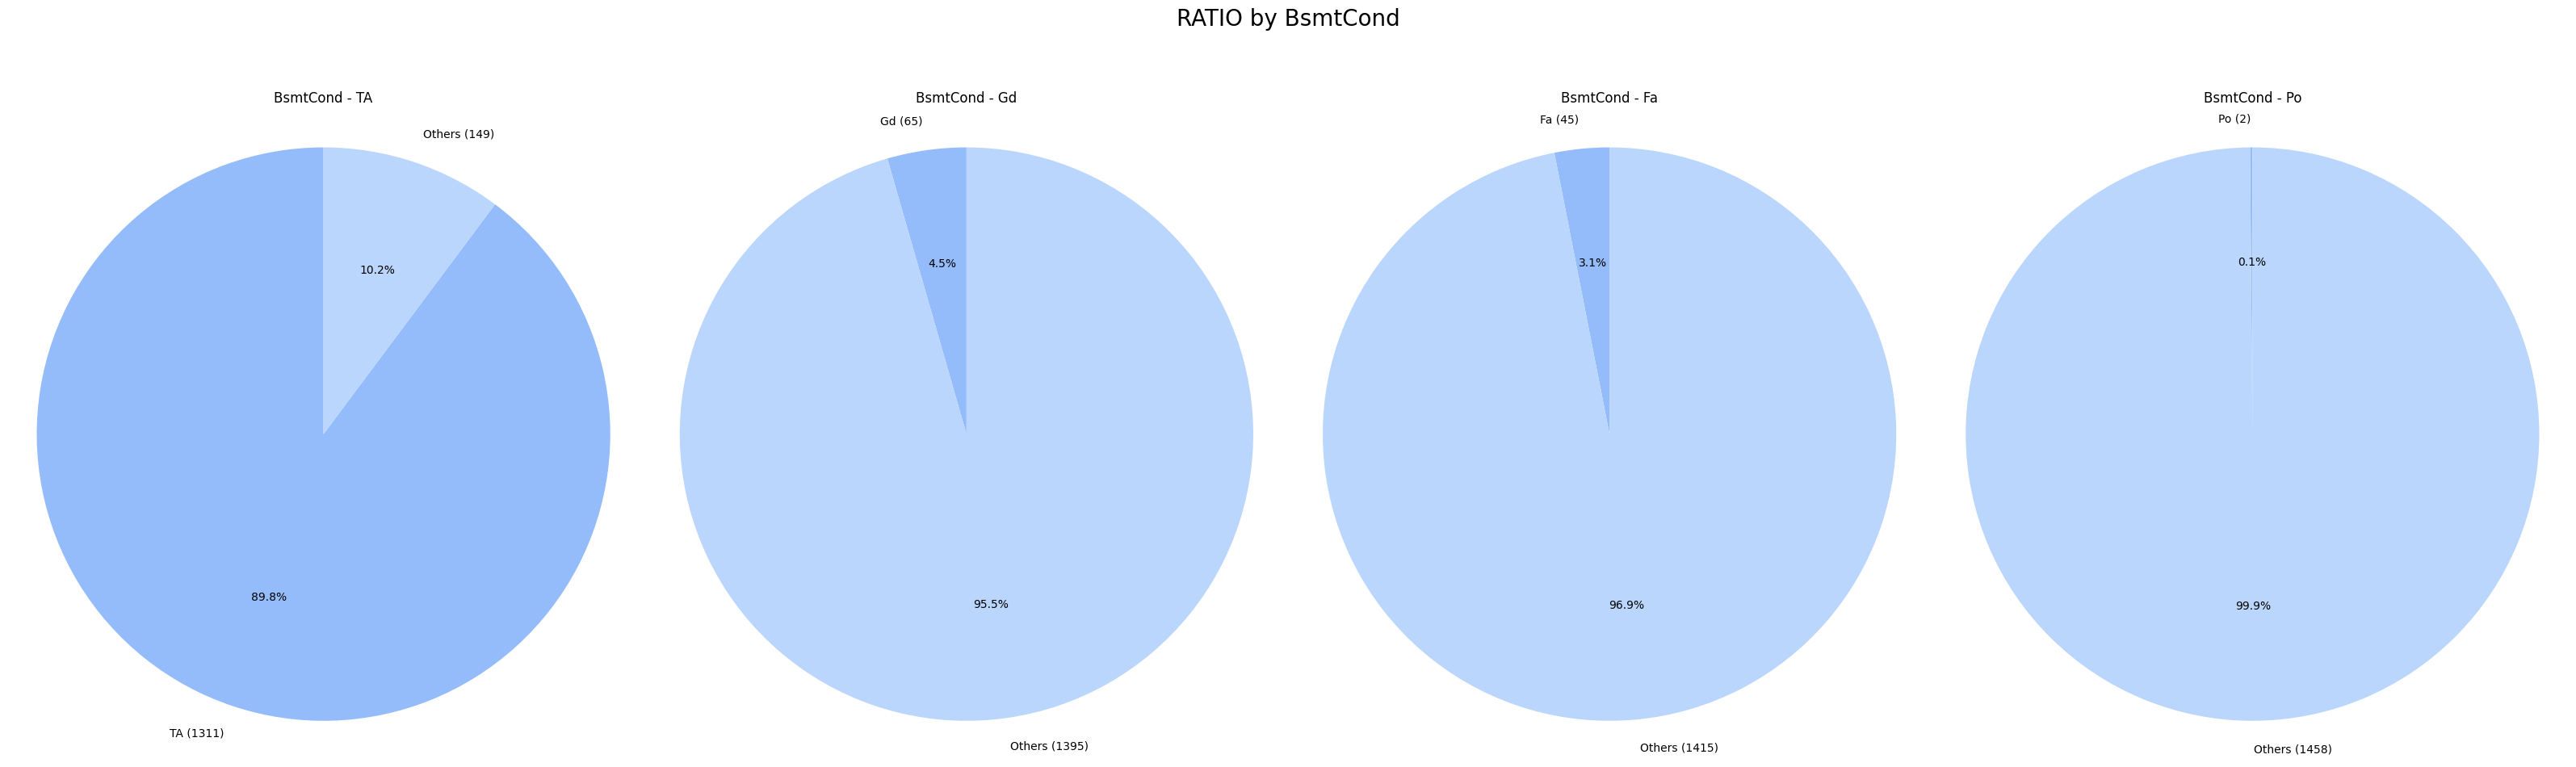

--------------------------------------------------------------------------------
              BsmtExposure  Ratio (%)
BsmtExposure                         
No                     953  65.273973
Av                     221  15.136986
Gd                     134   9.178082
Mn                     114   7.808219
--------------------------------------------------------------------------------


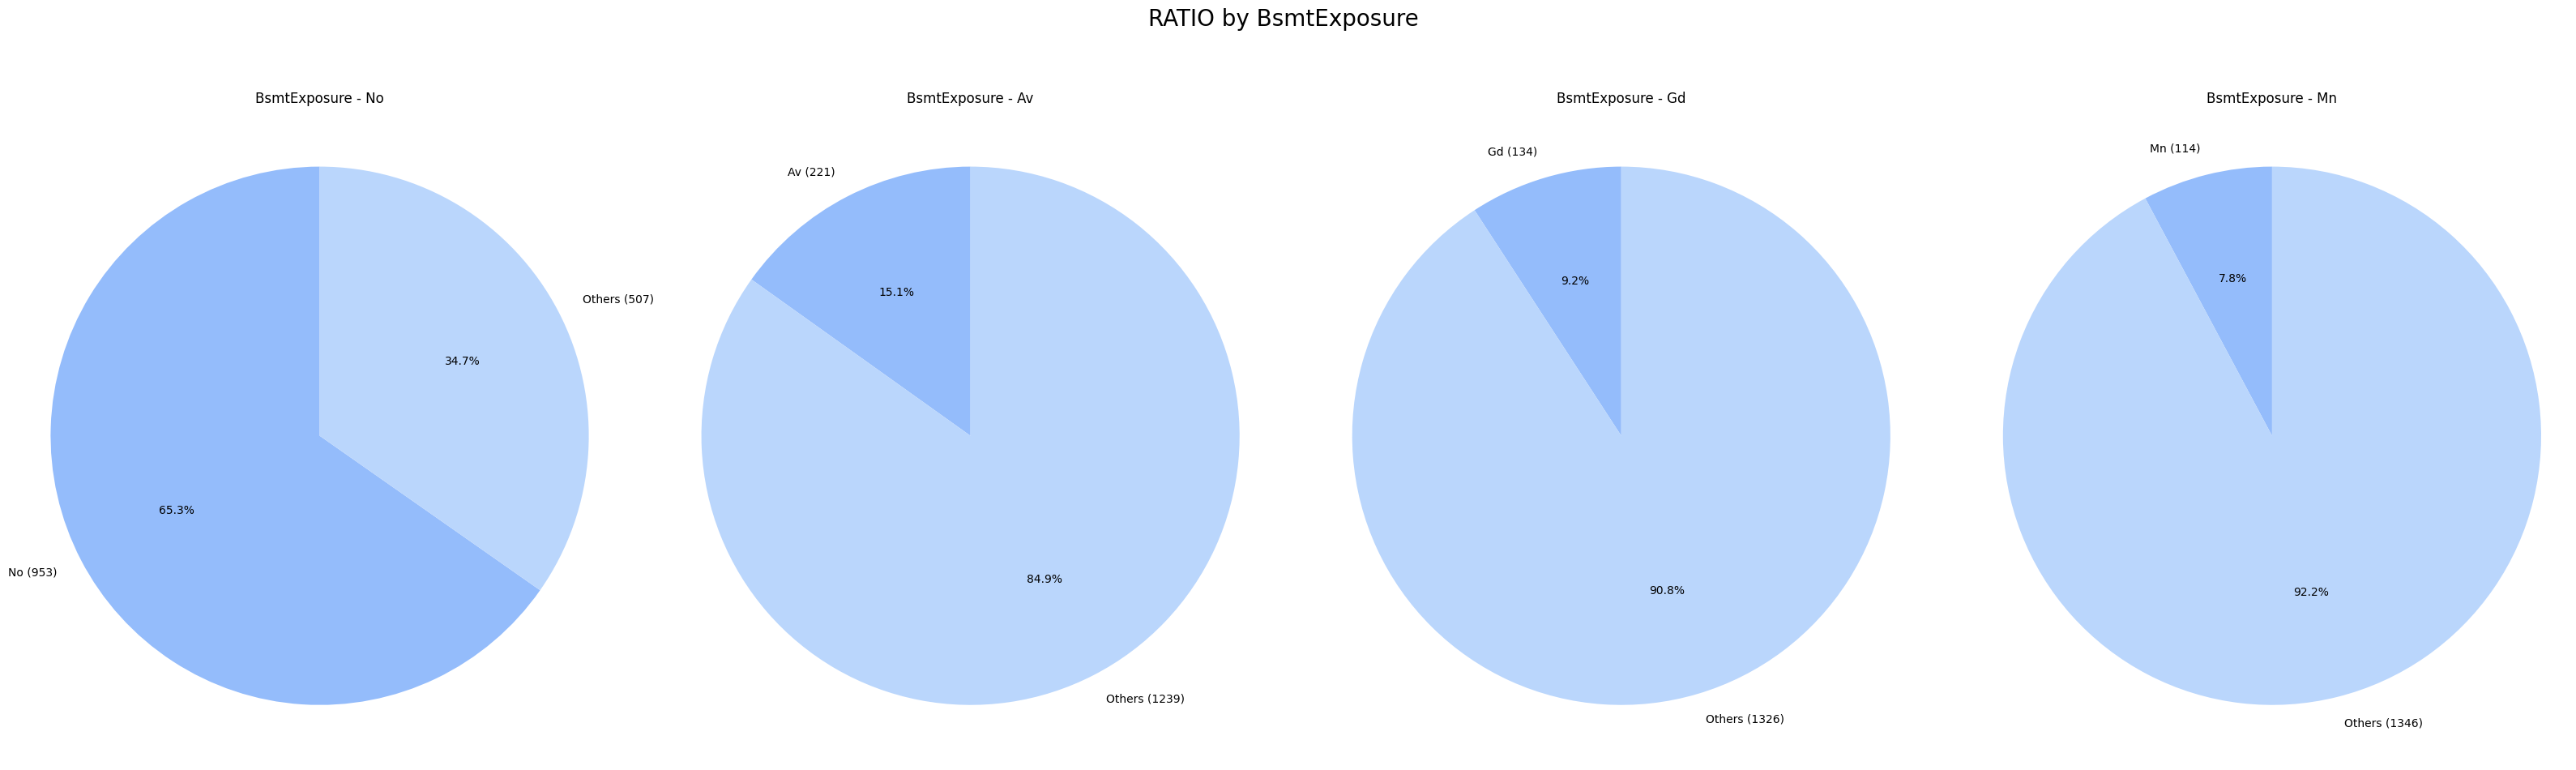

--------------------------------------------------------------------------------
              BsmtFinType1  Ratio (%)
BsmtFinType1                         
Unf                    430  29.452055
GLQ                    418  28.630137
ALQ                    220  15.068493
BLQ                    148  10.136986
Rec                    133   9.109589
LwQ                     74   5.068493
--------------------------------------------------------------------------------


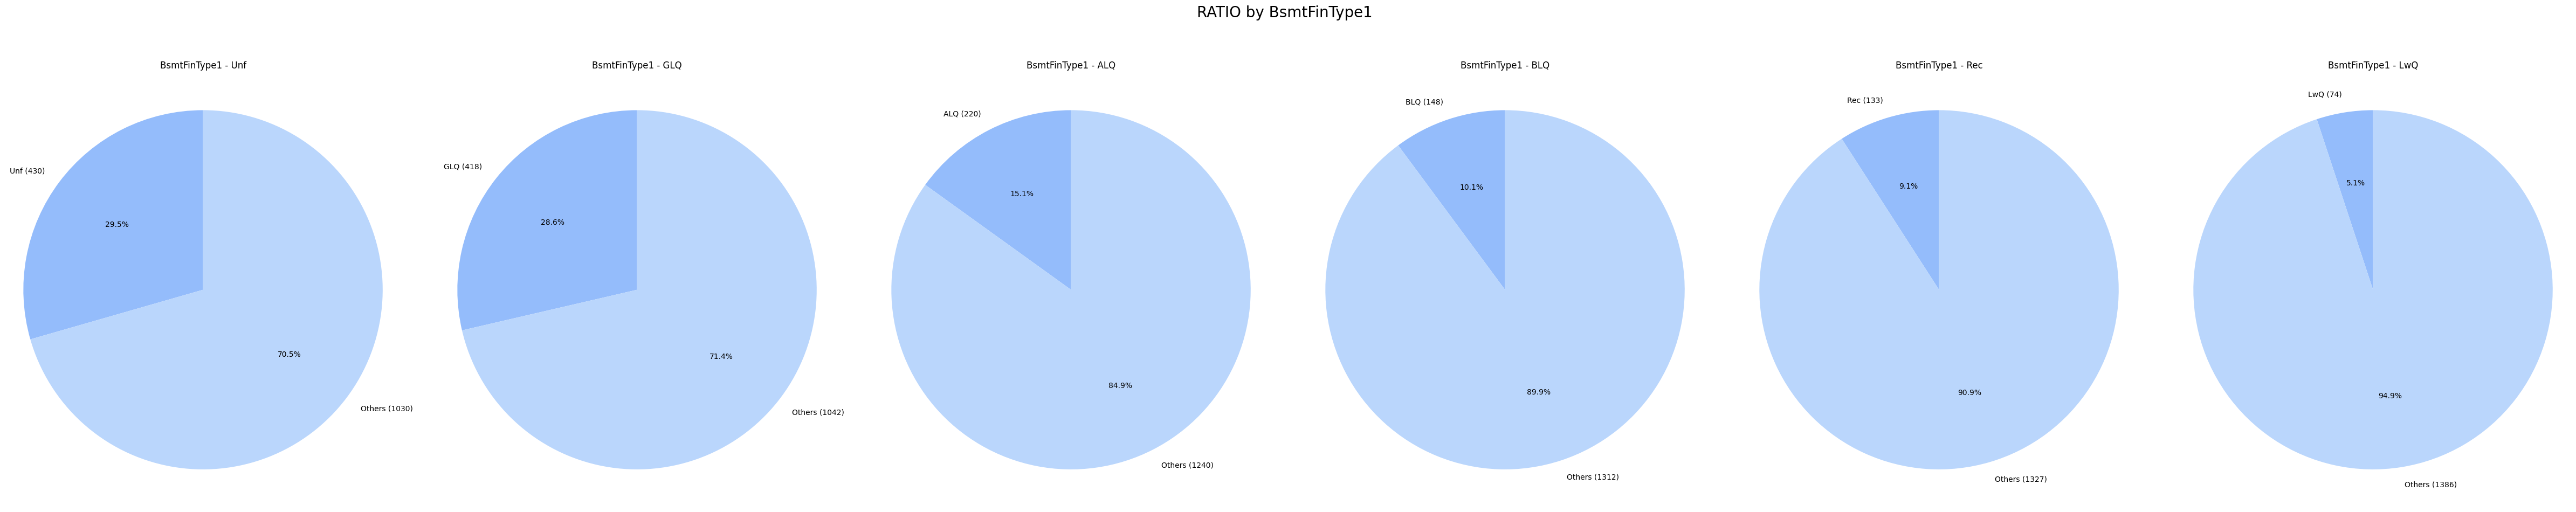

--------------------------------------------------------------------------------
              BsmtFinType2  Ratio (%)
BsmtFinType2                         
Unf                   1256  86.027397
Rec                     54   3.698630
LwQ                     46   3.150685
BLQ                     33   2.260274
ALQ                     19   1.301370
GLQ                     14   0.958904
--------------------------------------------------------------------------------


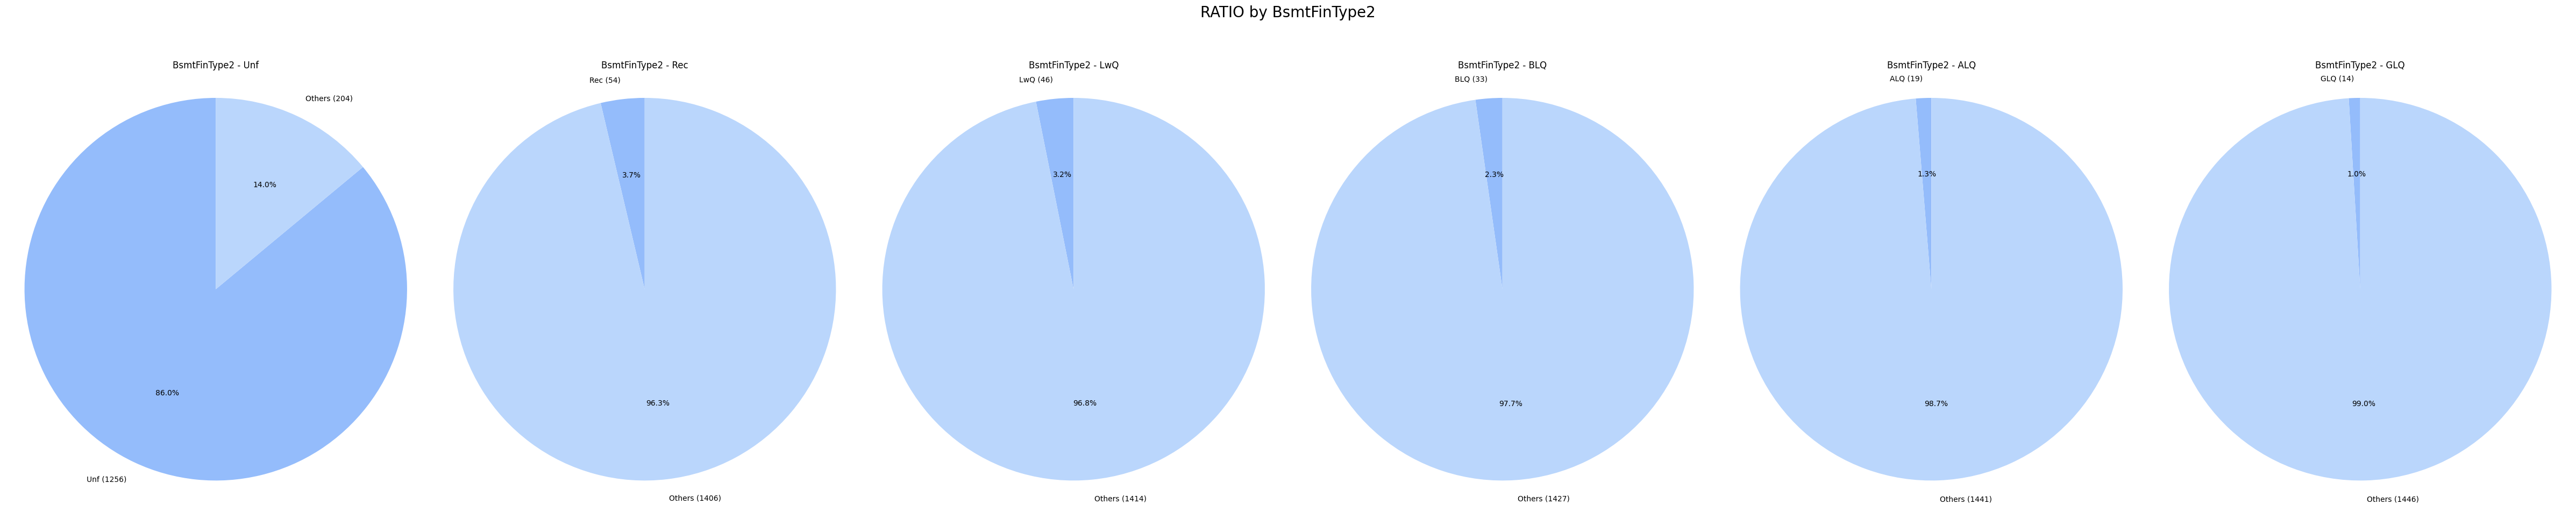

--------------------------------------------------------------------------------
         Heating  Ratio (%)
Heating                    
GasA        1428  97.808219
GasW          18   1.232877
Grav           7   0.479452
Wall           4   0.273973
OthW           2   0.136986
Floor          1   0.068493
--------------------------------------------------------------------------------


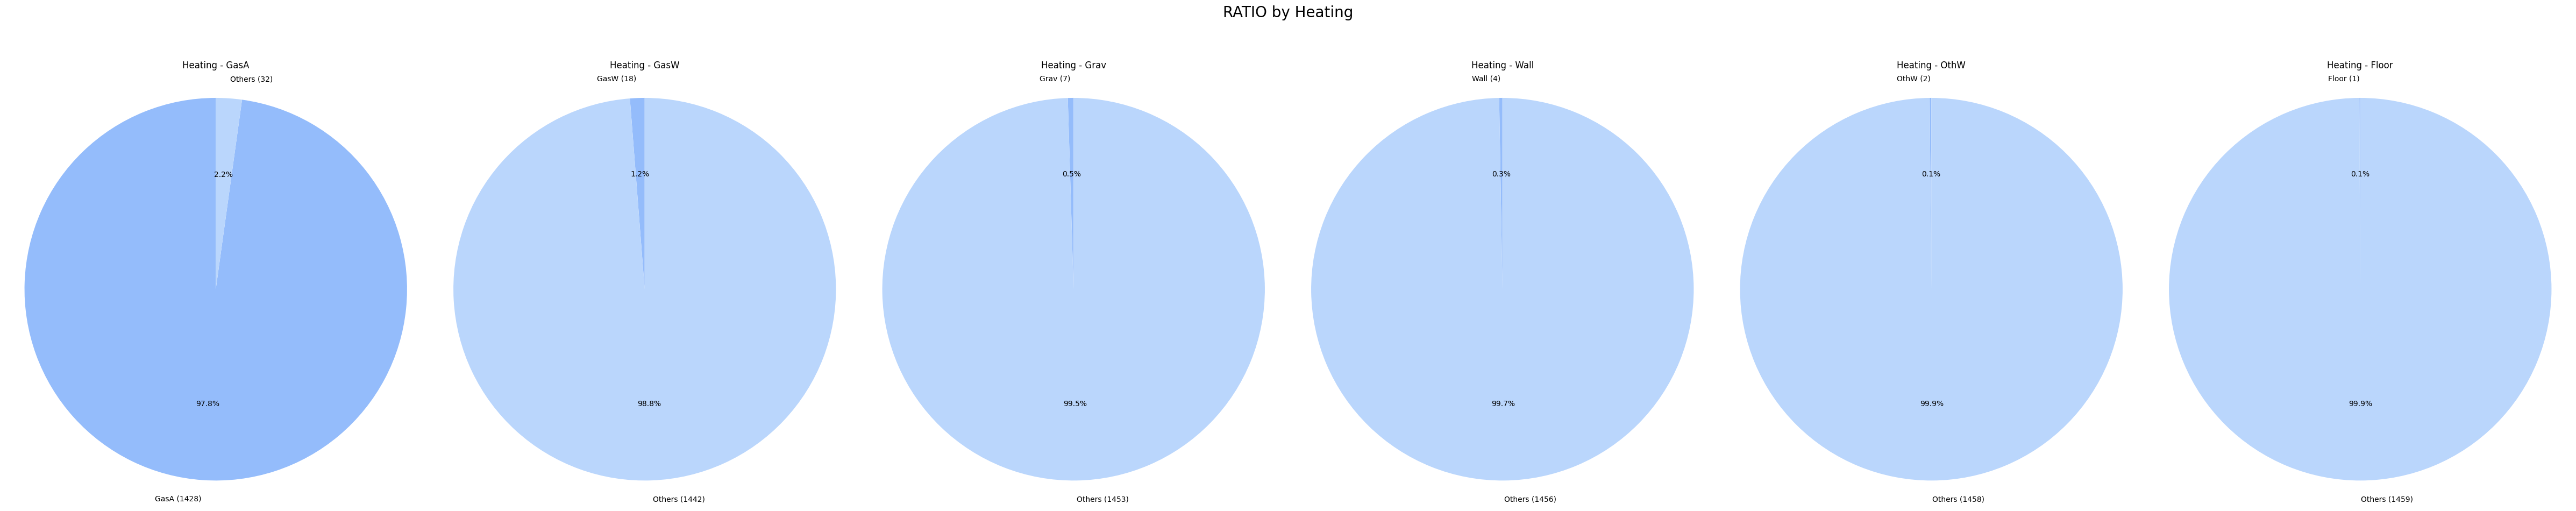

--------------------------------------------------------------------------------
           HeatingQC  Ratio (%)
HeatingQC                      
Ex               741  50.753425
TA               428  29.315068
Gd               241  16.506849
Fa                49   3.356164
Po                 1   0.068493
--------------------------------------------------------------------------------


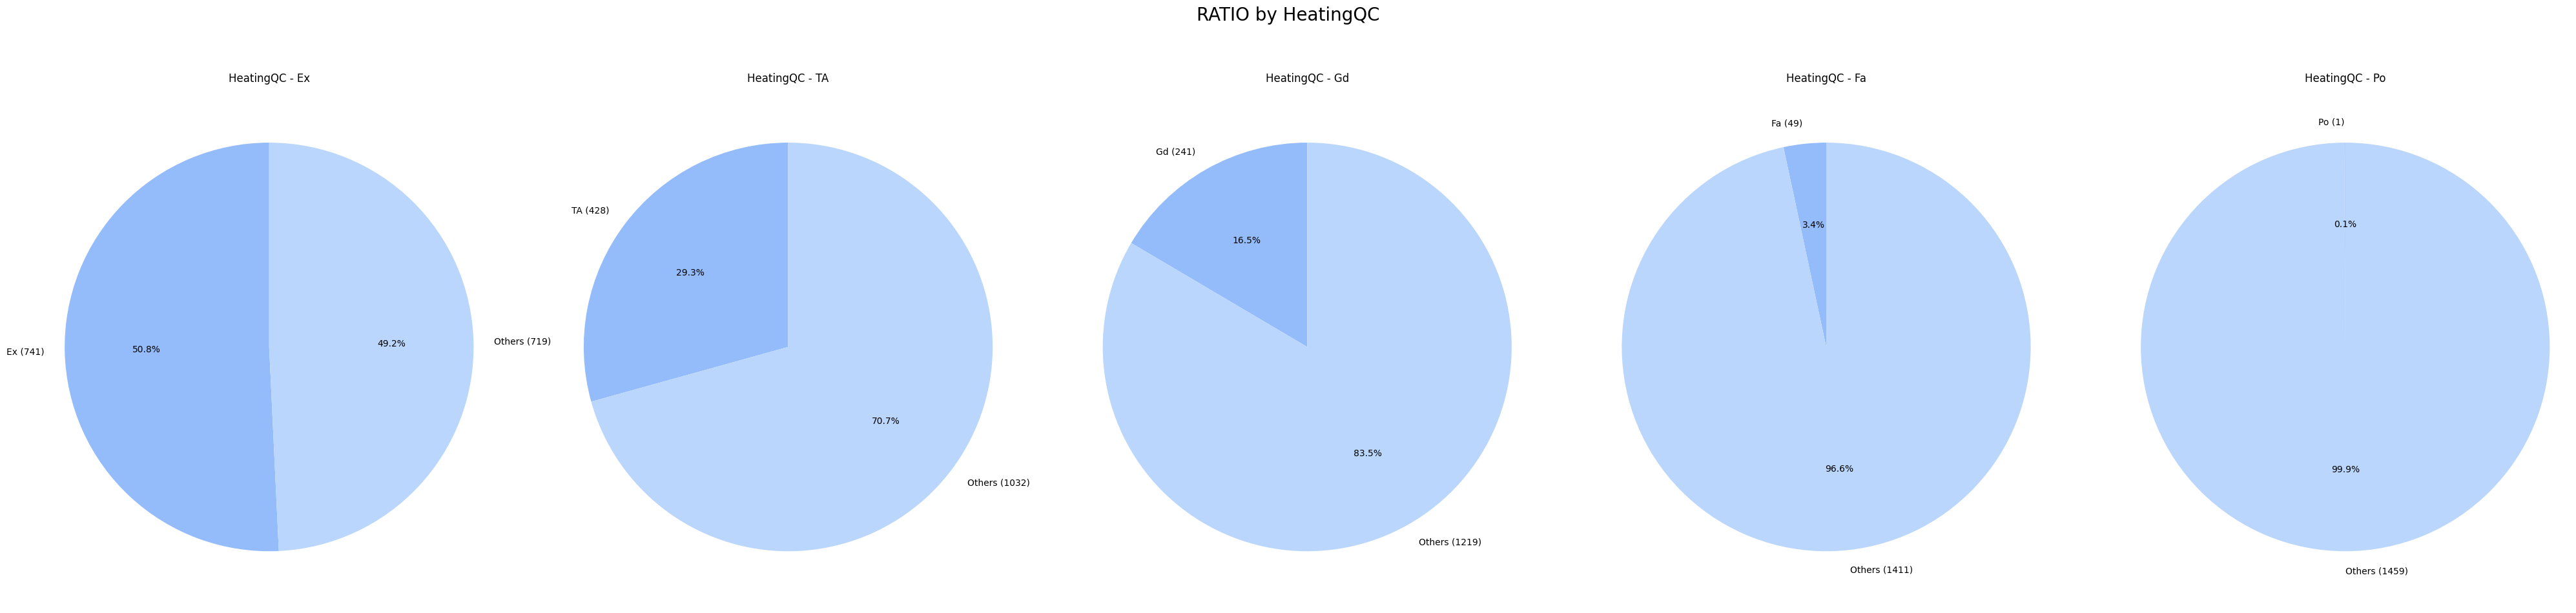

--------------------------------------------------------------------------------
            CentralAir  Ratio (%)
CentralAir                       
Y                 1365  93.493151
N                   95   6.506849
--------------------------------------------------------------------------------


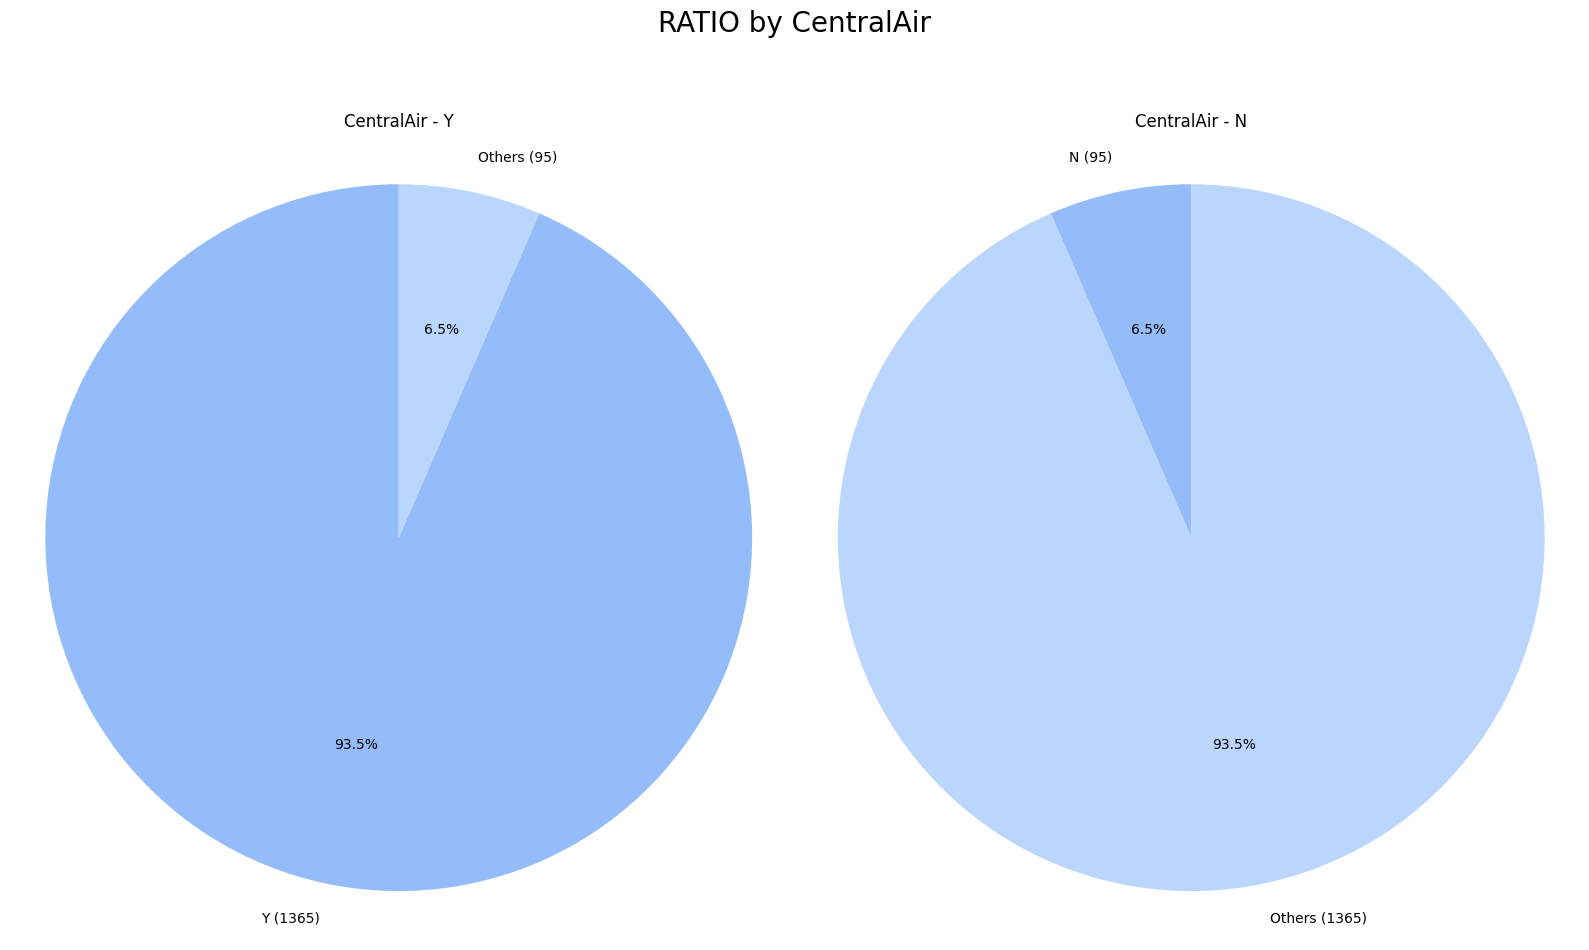

--------------------------------------------------------------------------------
            Electrical  Ratio (%)
Electrical                       
SBrkr             1334  91.369863
FuseA               94   6.438356
FuseF               27   1.849315
FuseP                3   0.205479
Mix                  1   0.068493
--------------------------------------------------------------------------------


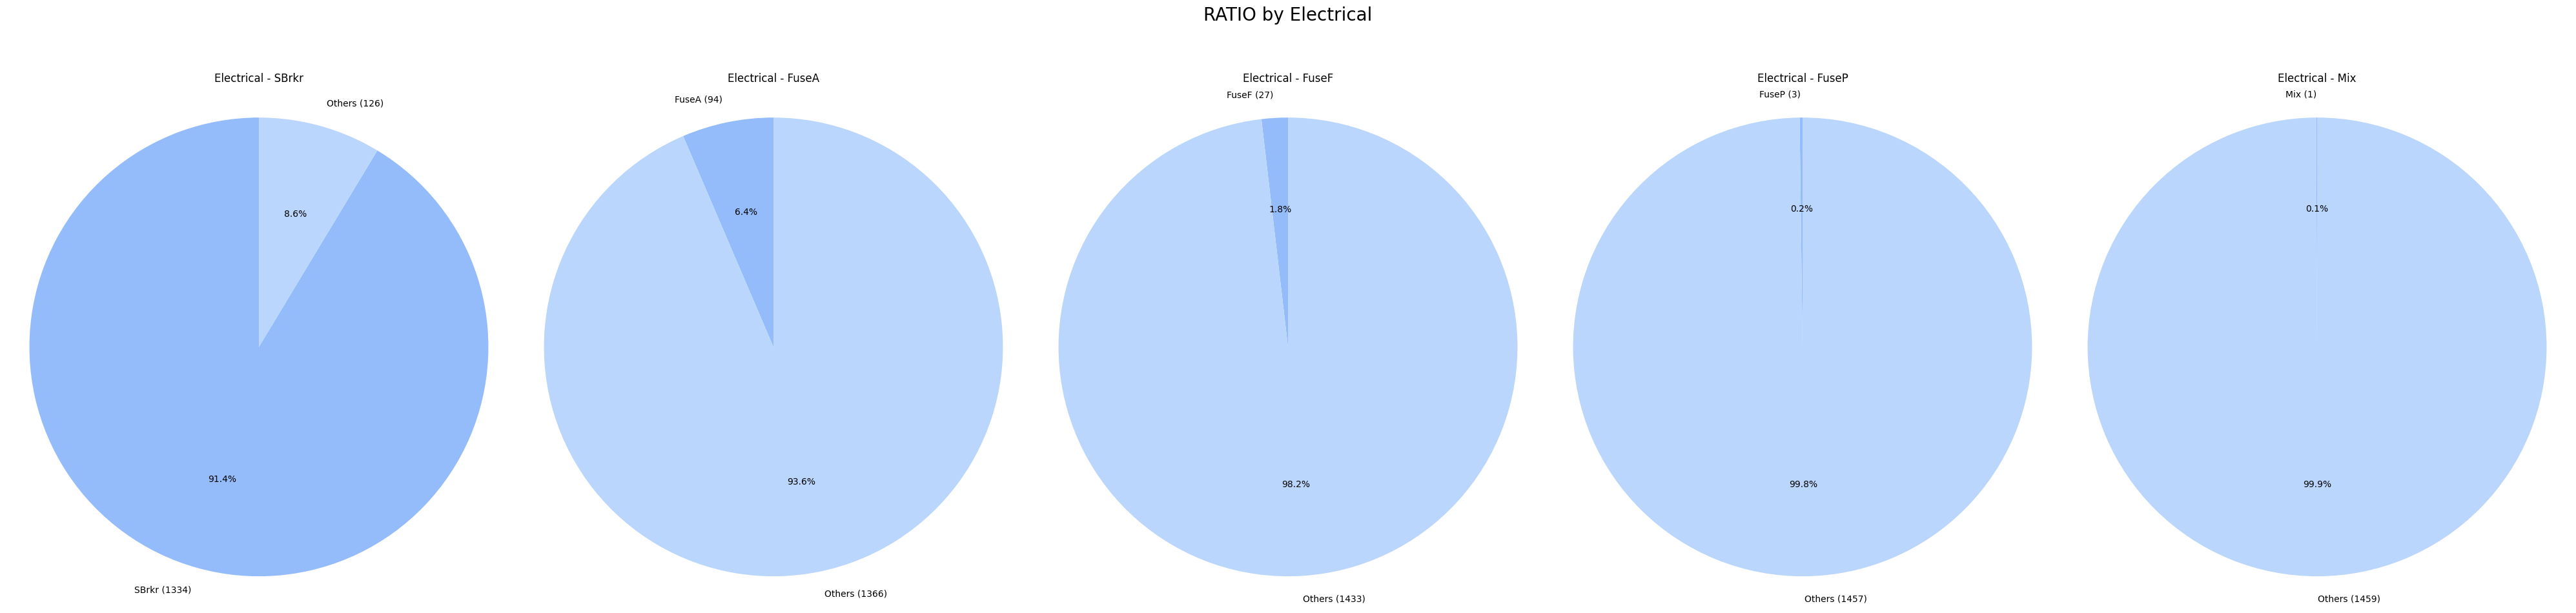

--------------------------------------------------------------------------------
             KitchenQual  Ratio (%)
KitchenQual                        
TA                   735  50.342466
Gd                   586  40.136986
Ex                   100   6.849315
Fa                    39   2.671233
--------------------------------------------------------------------------------


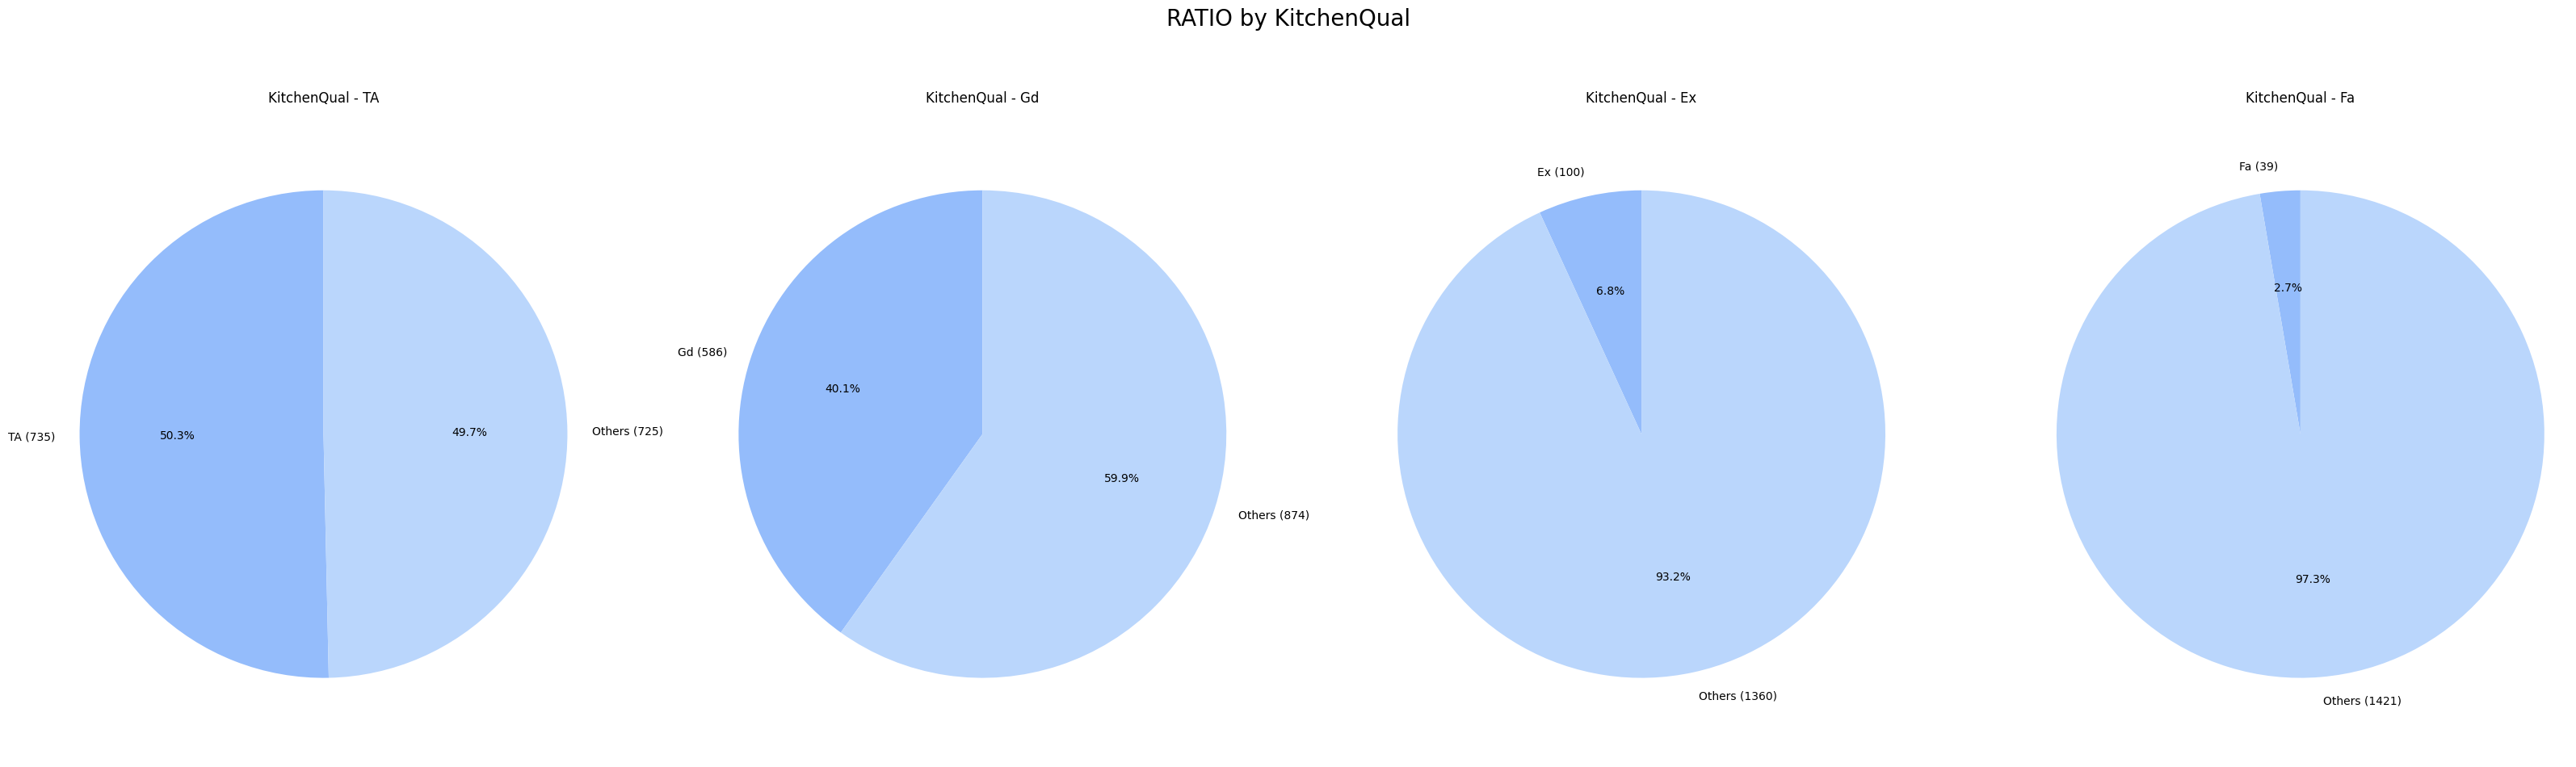

--------------------------------------------------------------------------------
            Functional  Ratio (%)
Functional                       
Typ               1360  93.150685
Min2                34   2.328767
Min1                31   2.123288
Mod                 15   1.027397
Maj1                14   0.958904
Maj2                 5   0.342466
Sev                  1   0.068493
--------------------------------------------------------------------------------


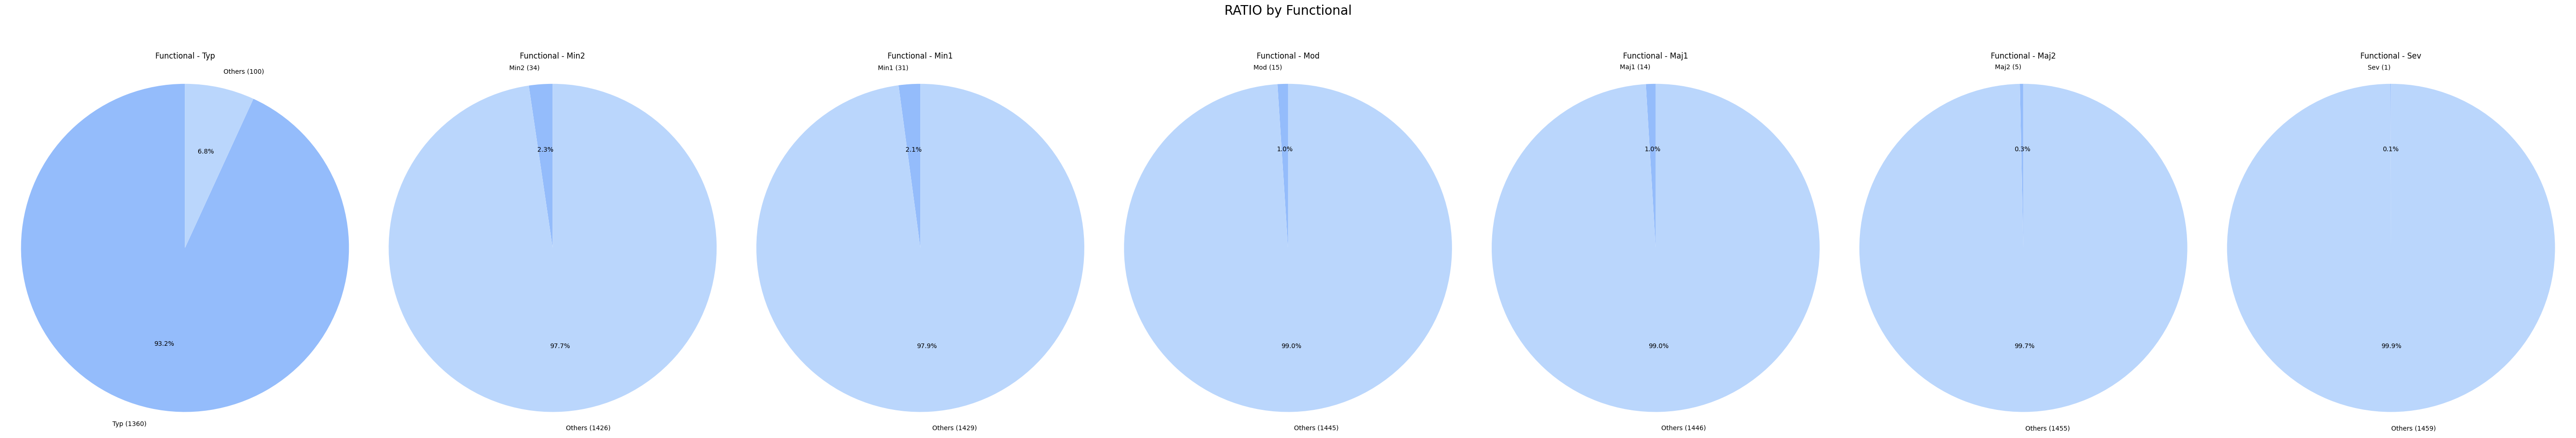

--------------------------------------------------------------------------------
             FireplaceQu  Ratio (%)
FireplaceQu                        
Gd                   380  26.027397
TA                   313  21.438356
Fa                    33   2.260274
Ex                    24   1.643836
Po                    20   1.369863
--------------------------------------------------------------------------------


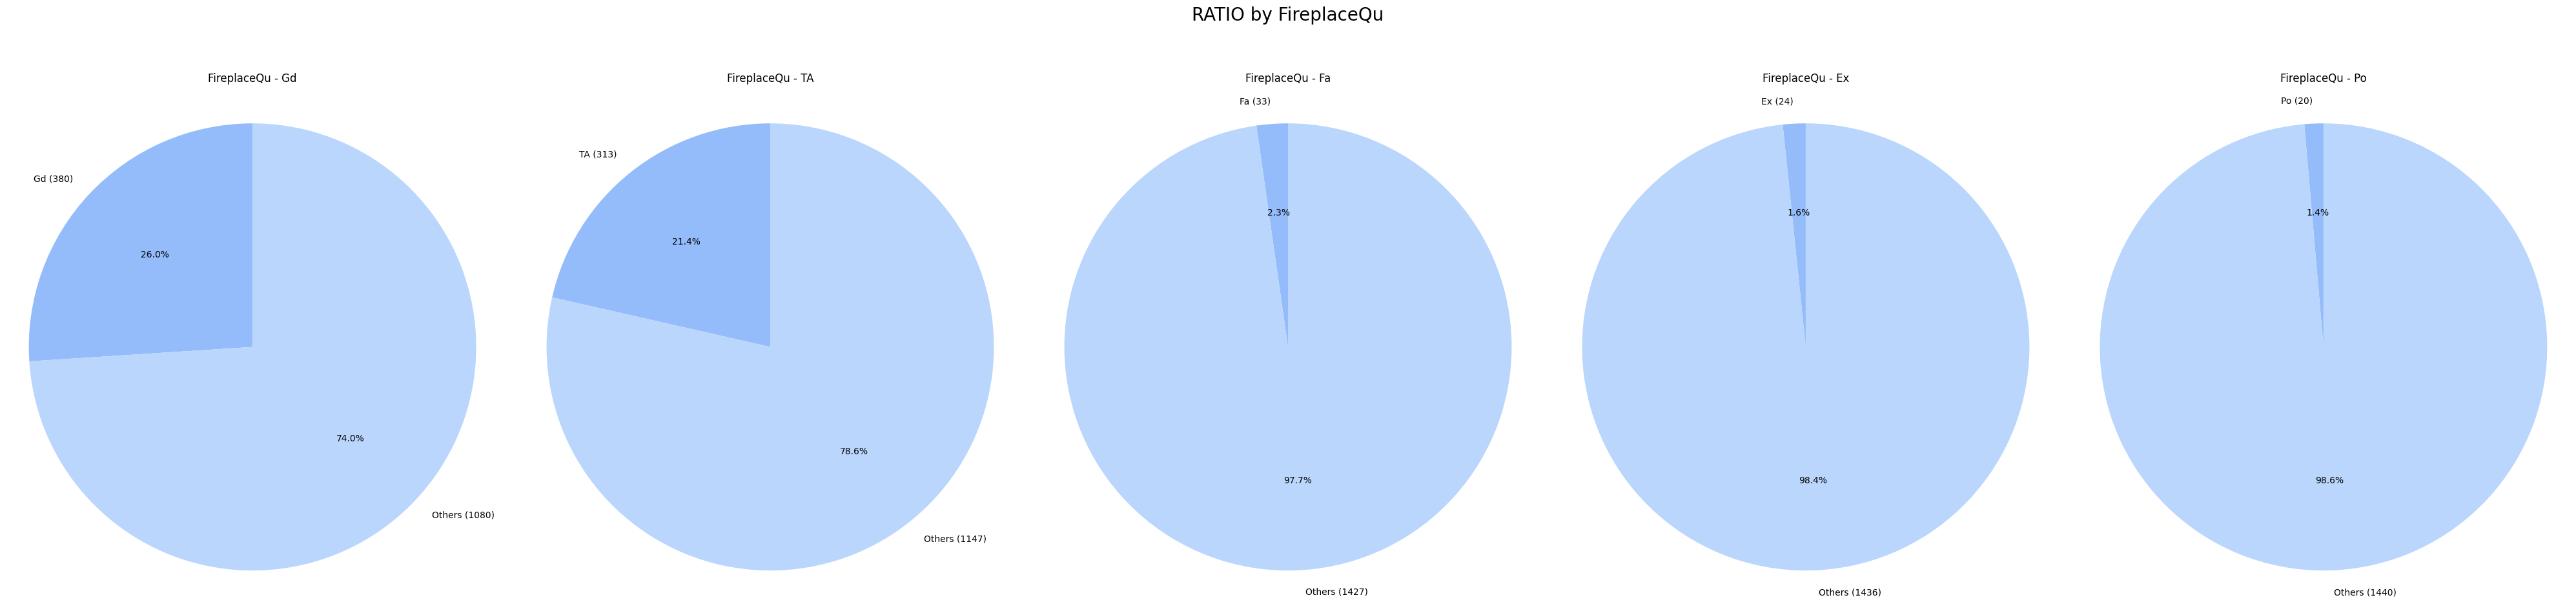

--------------------------------------------------------------------------------
            GarageType  Ratio (%)
GarageType                       
Attchd             870  59.589041
Detchd             387  26.506849
BuiltIn             88   6.027397
Basment             19   1.301370
CarPort              9   0.616438
2Types               6   0.410959
--------------------------------------------------------------------------------


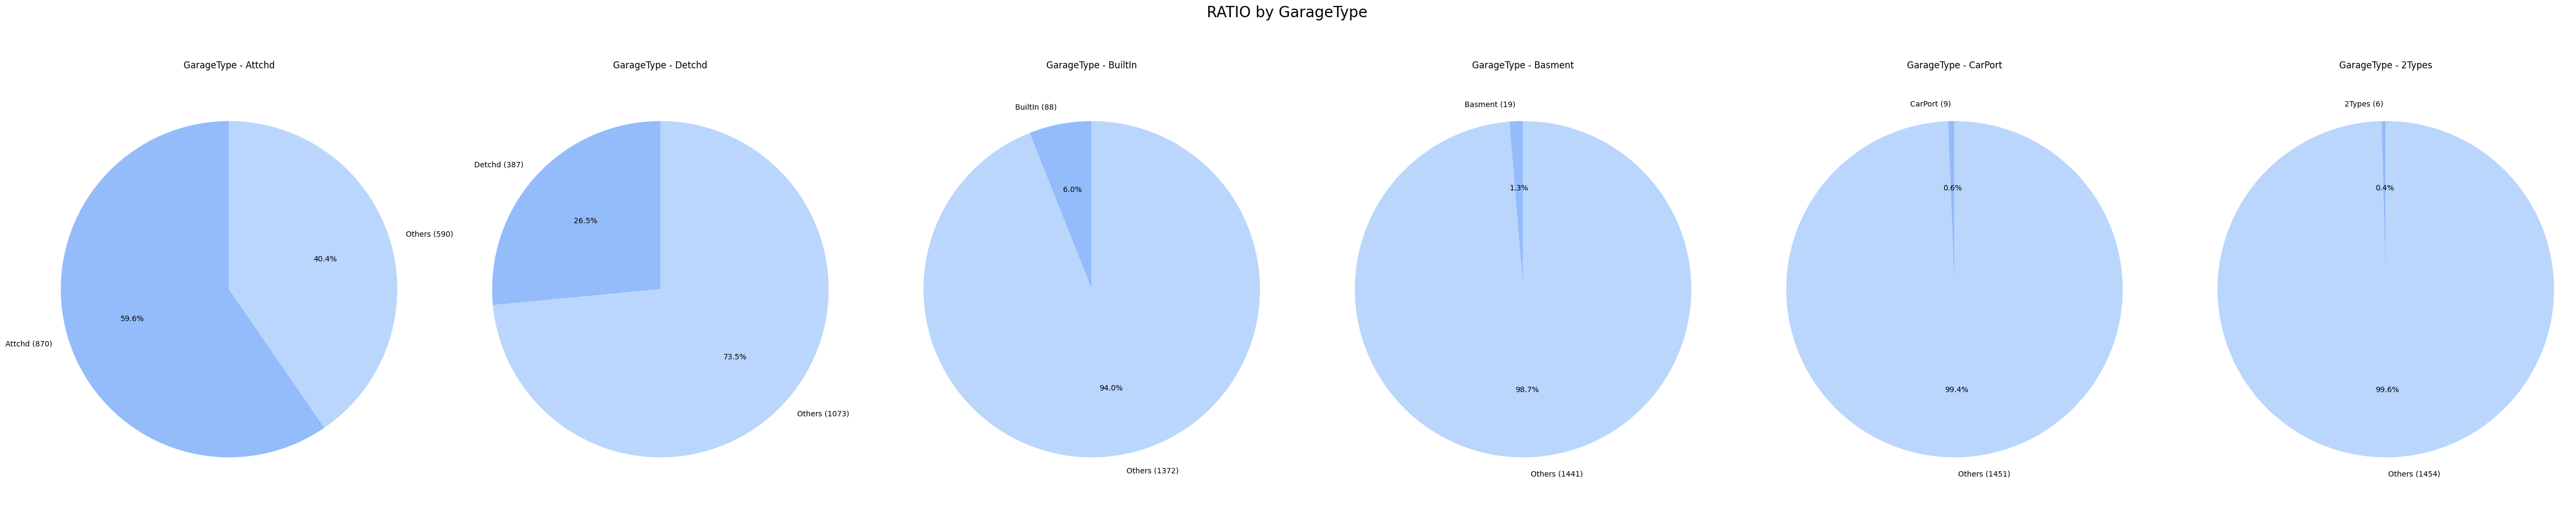

--------------------------------------------------------------------------------
              GarageFinish  Ratio (%)
GarageFinish                         
Unf                    605  41.438356
RFn                    422  28.904110
Fin                    352  24.109589
--------------------------------------------------------------------------------


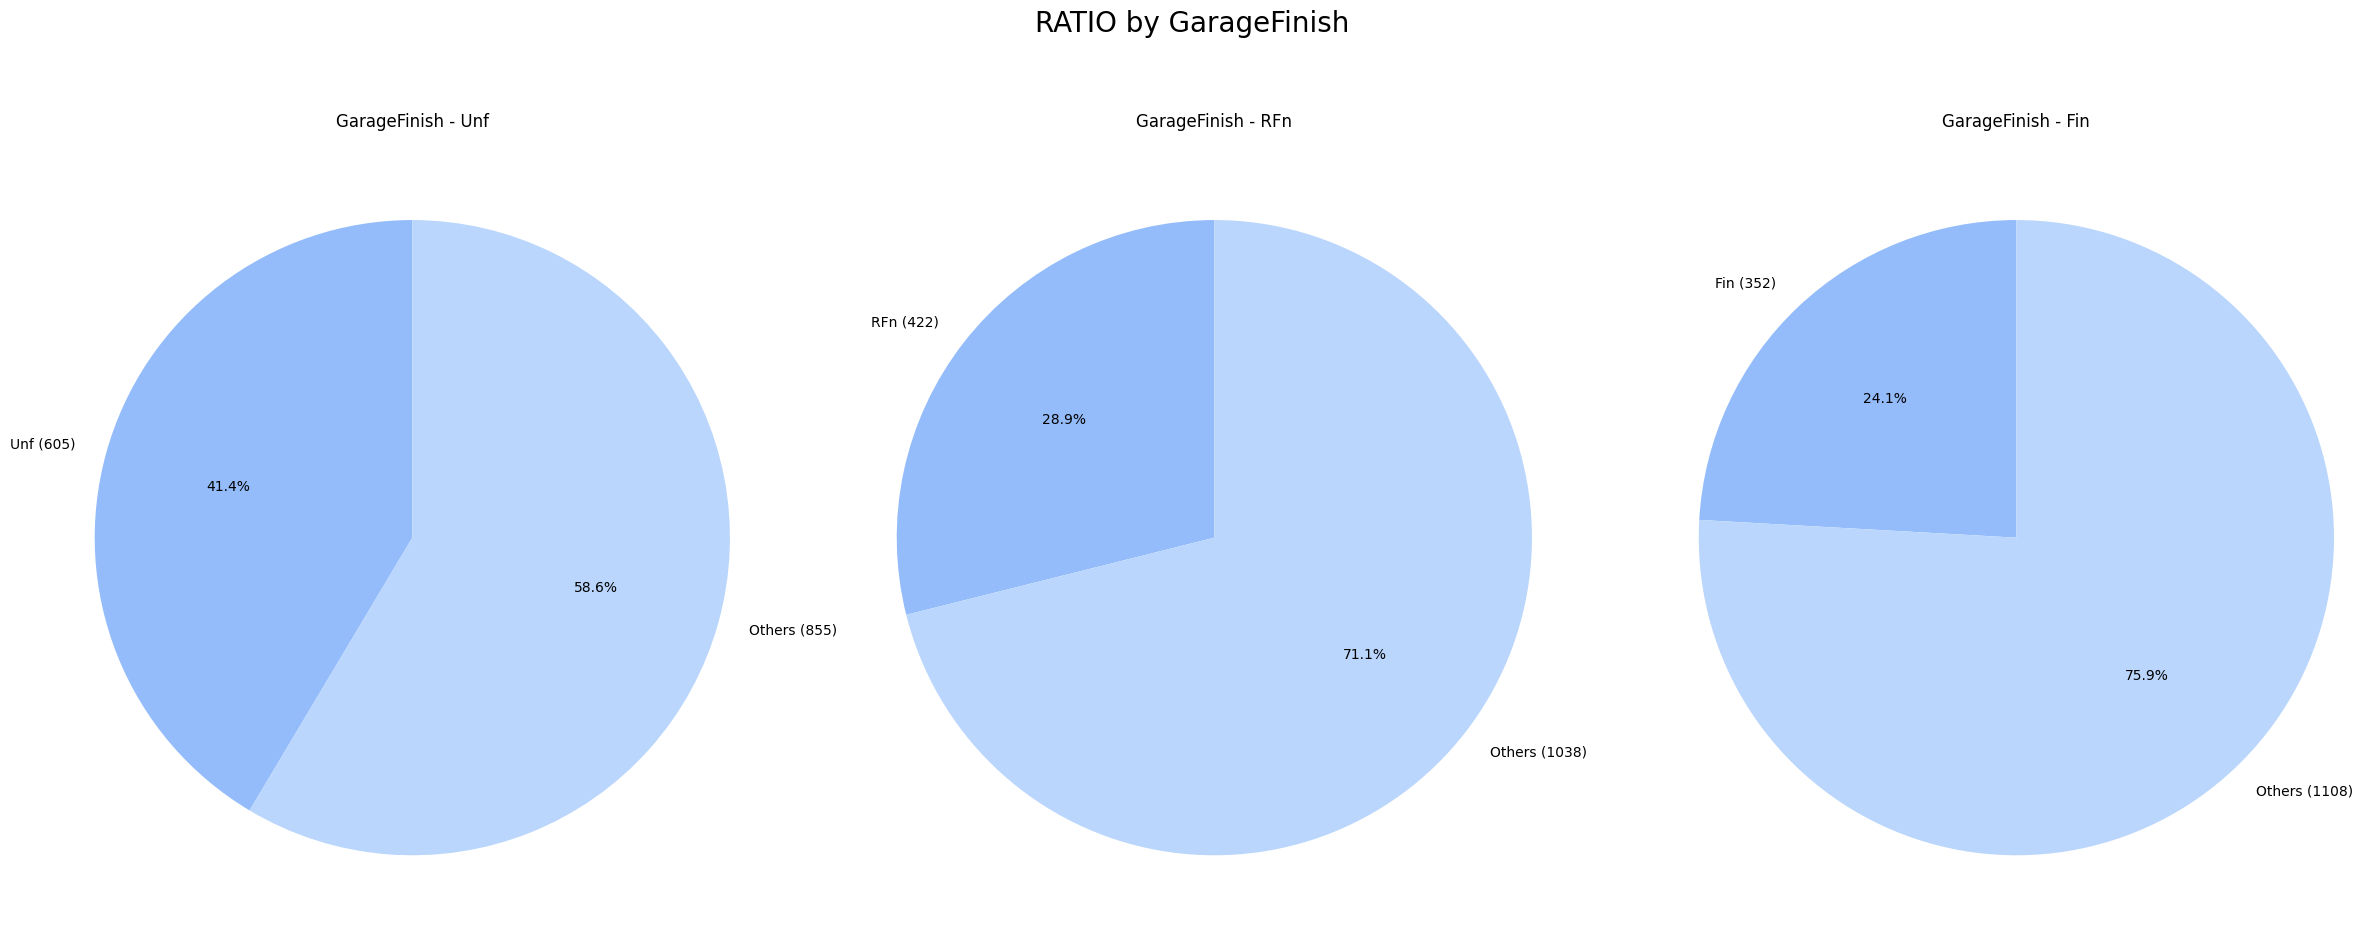

--------------------------------------------------------------------------------
            GarageQual  Ratio (%)
GarageQual                       
TA                1311  89.794521
Fa                  48   3.287671
Gd                  14   0.958904
Ex                   3   0.205479
Po                   3   0.205479
--------------------------------------------------------------------------------


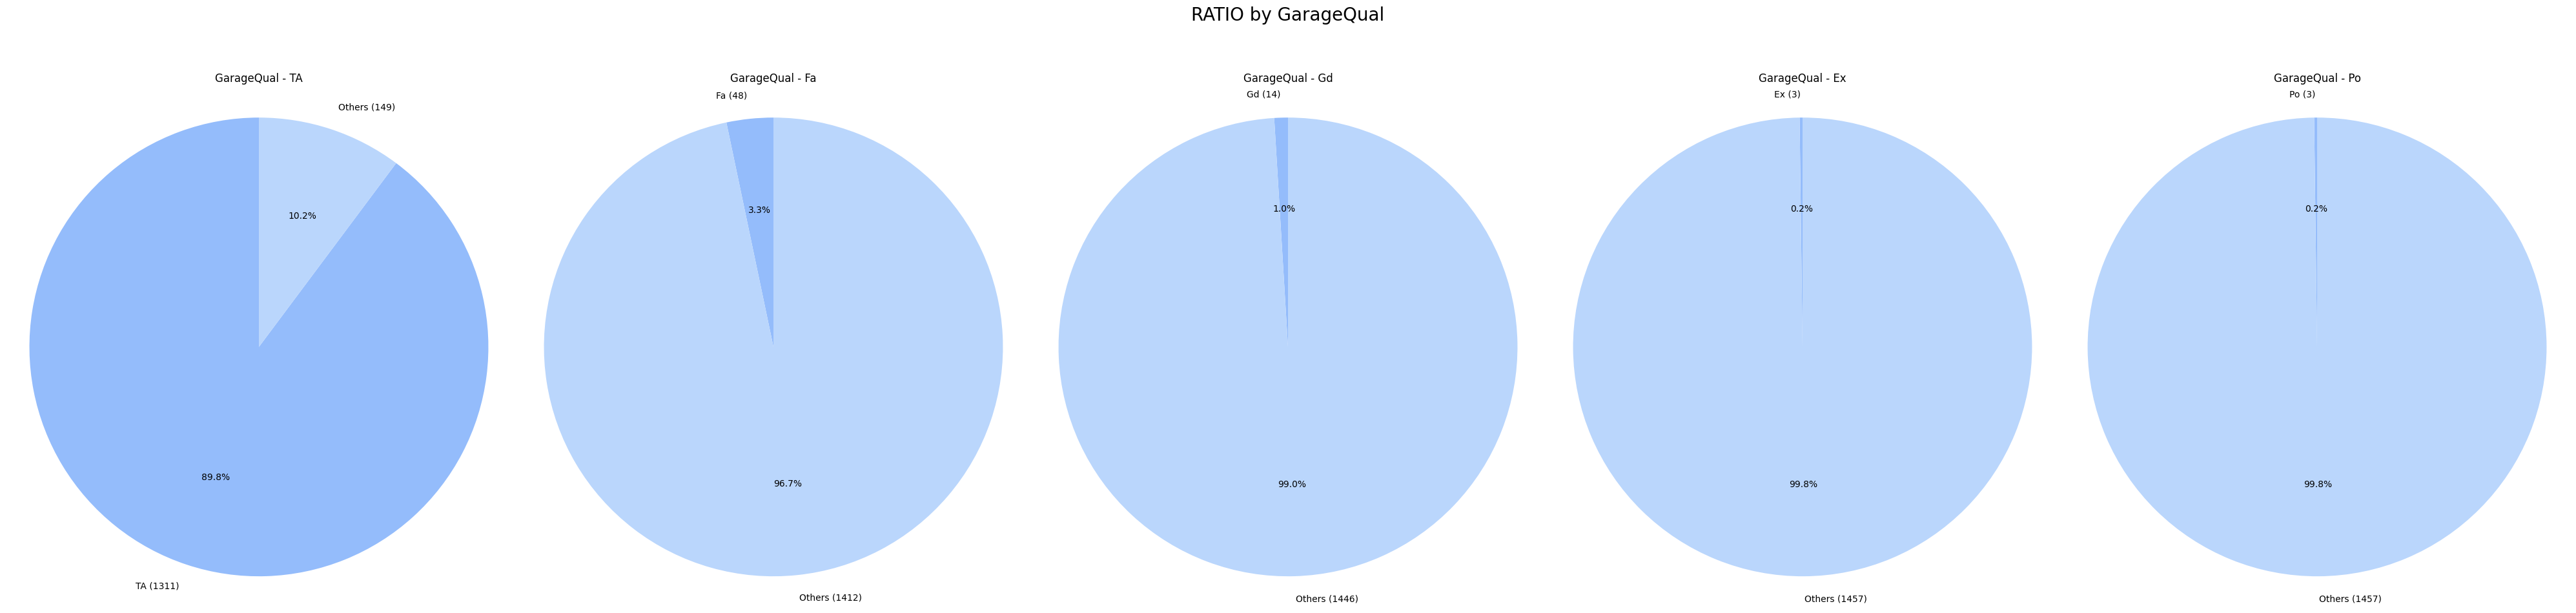

--------------------------------------------------------------------------------
            GarageCond  Ratio (%)
GarageCond                       
TA                1326  90.821918
Fa                  35   2.397260
Gd                   9   0.616438
Po                   7   0.479452
Ex                   2   0.136986
--------------------------------------------------------------------------------


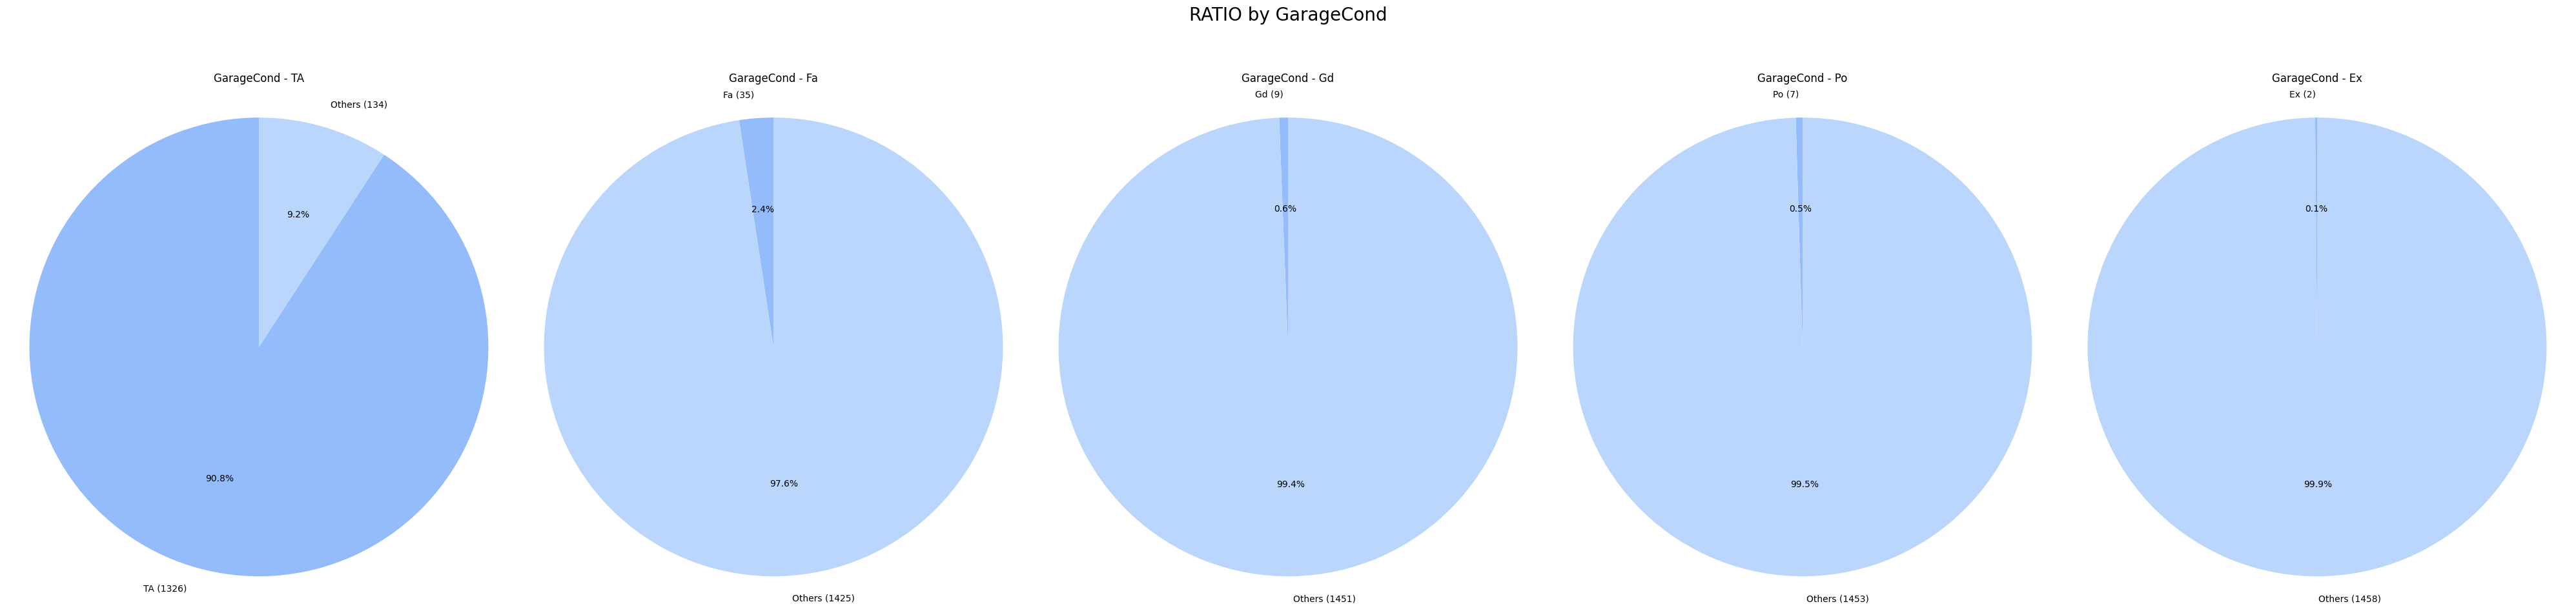

--------------------------------------------------------------------------------
            PavedDrive  Ratio (%)
PavedDrive                       
Y                 1340  91.780822
N                   90   6.164384
P                   30   2.054795
--------------------------------------------------------------------------------


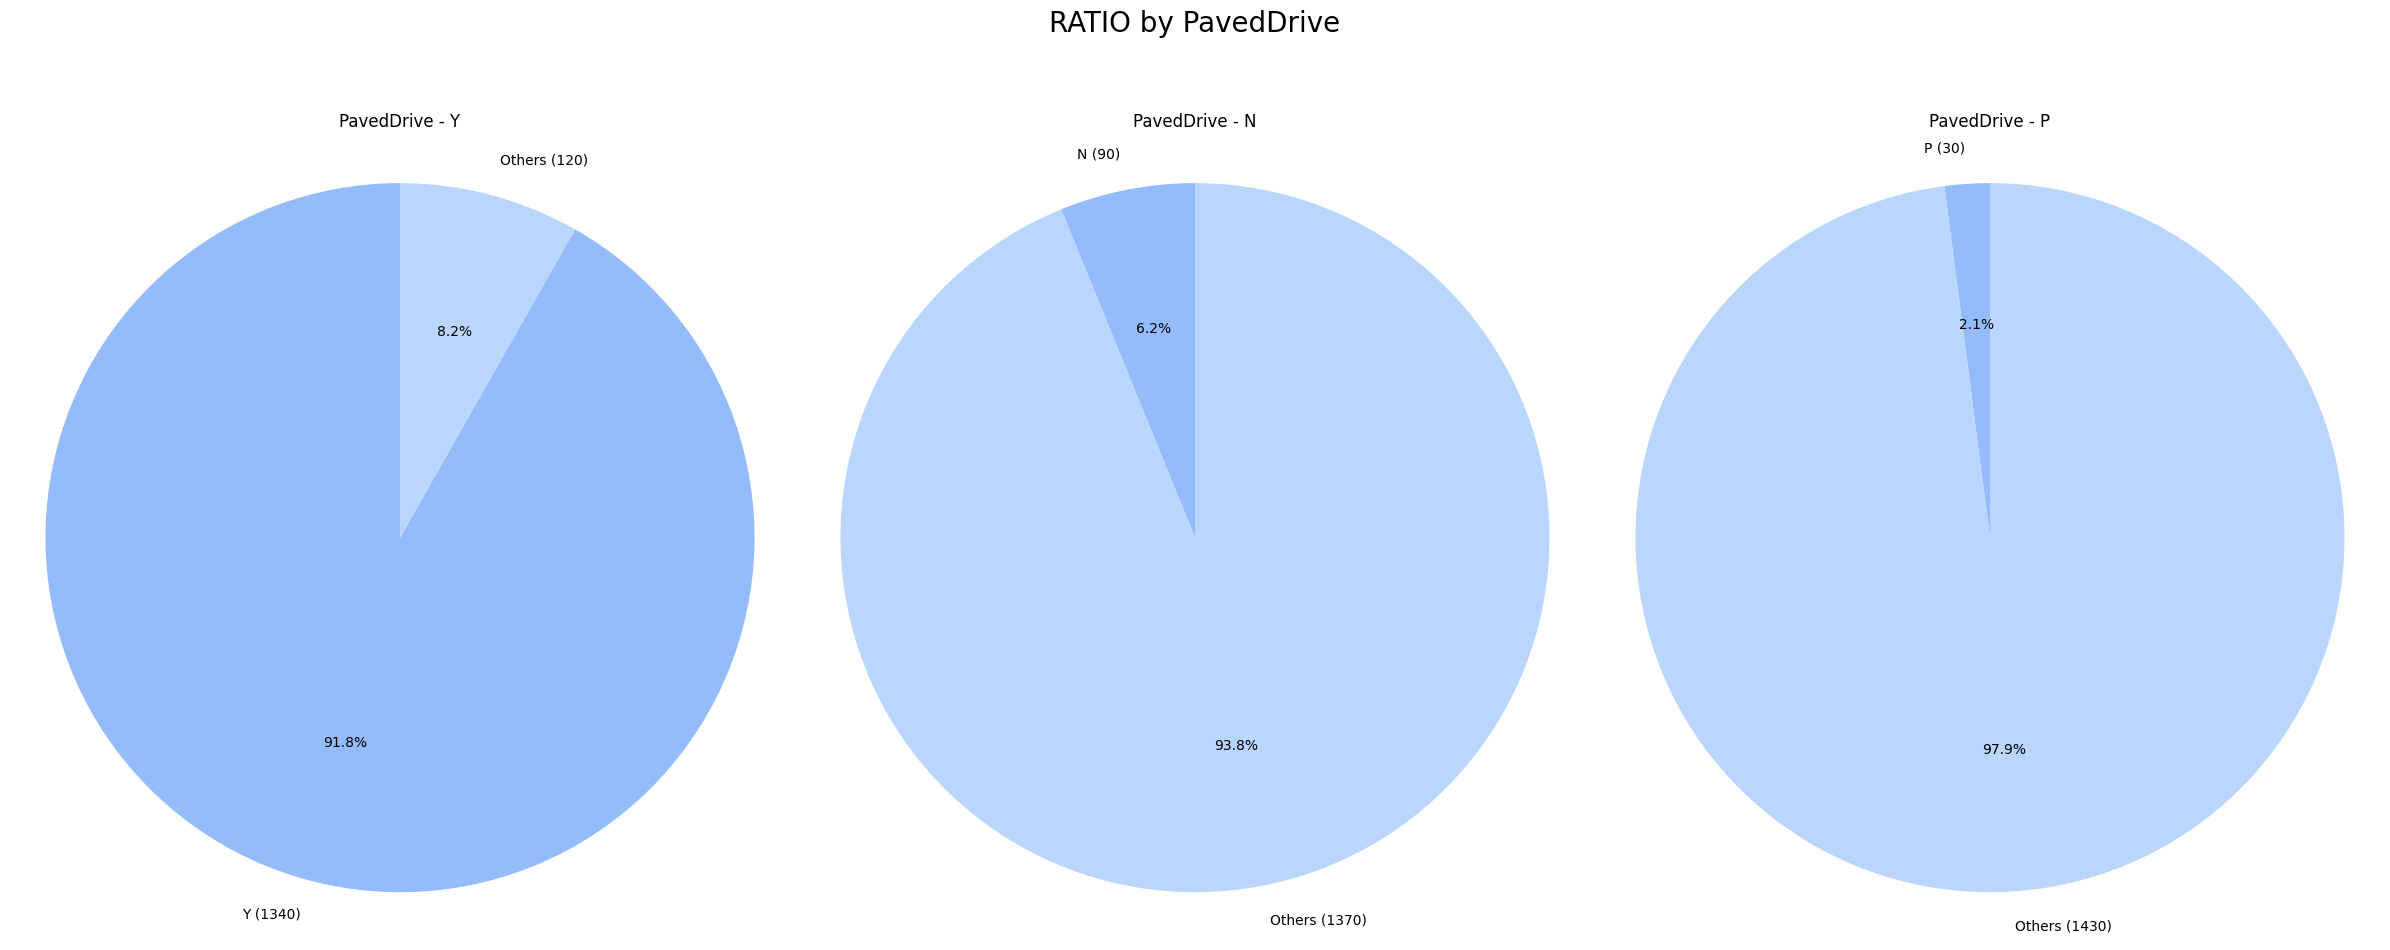

--------------------------------------------------------------------------------
        PoolQC  Ratio (%)
PoolQC                   
Gd           3   0.205479
Ex           2   0.136986
Fa           2   0.136986
--------------------------------------------------------------------------------


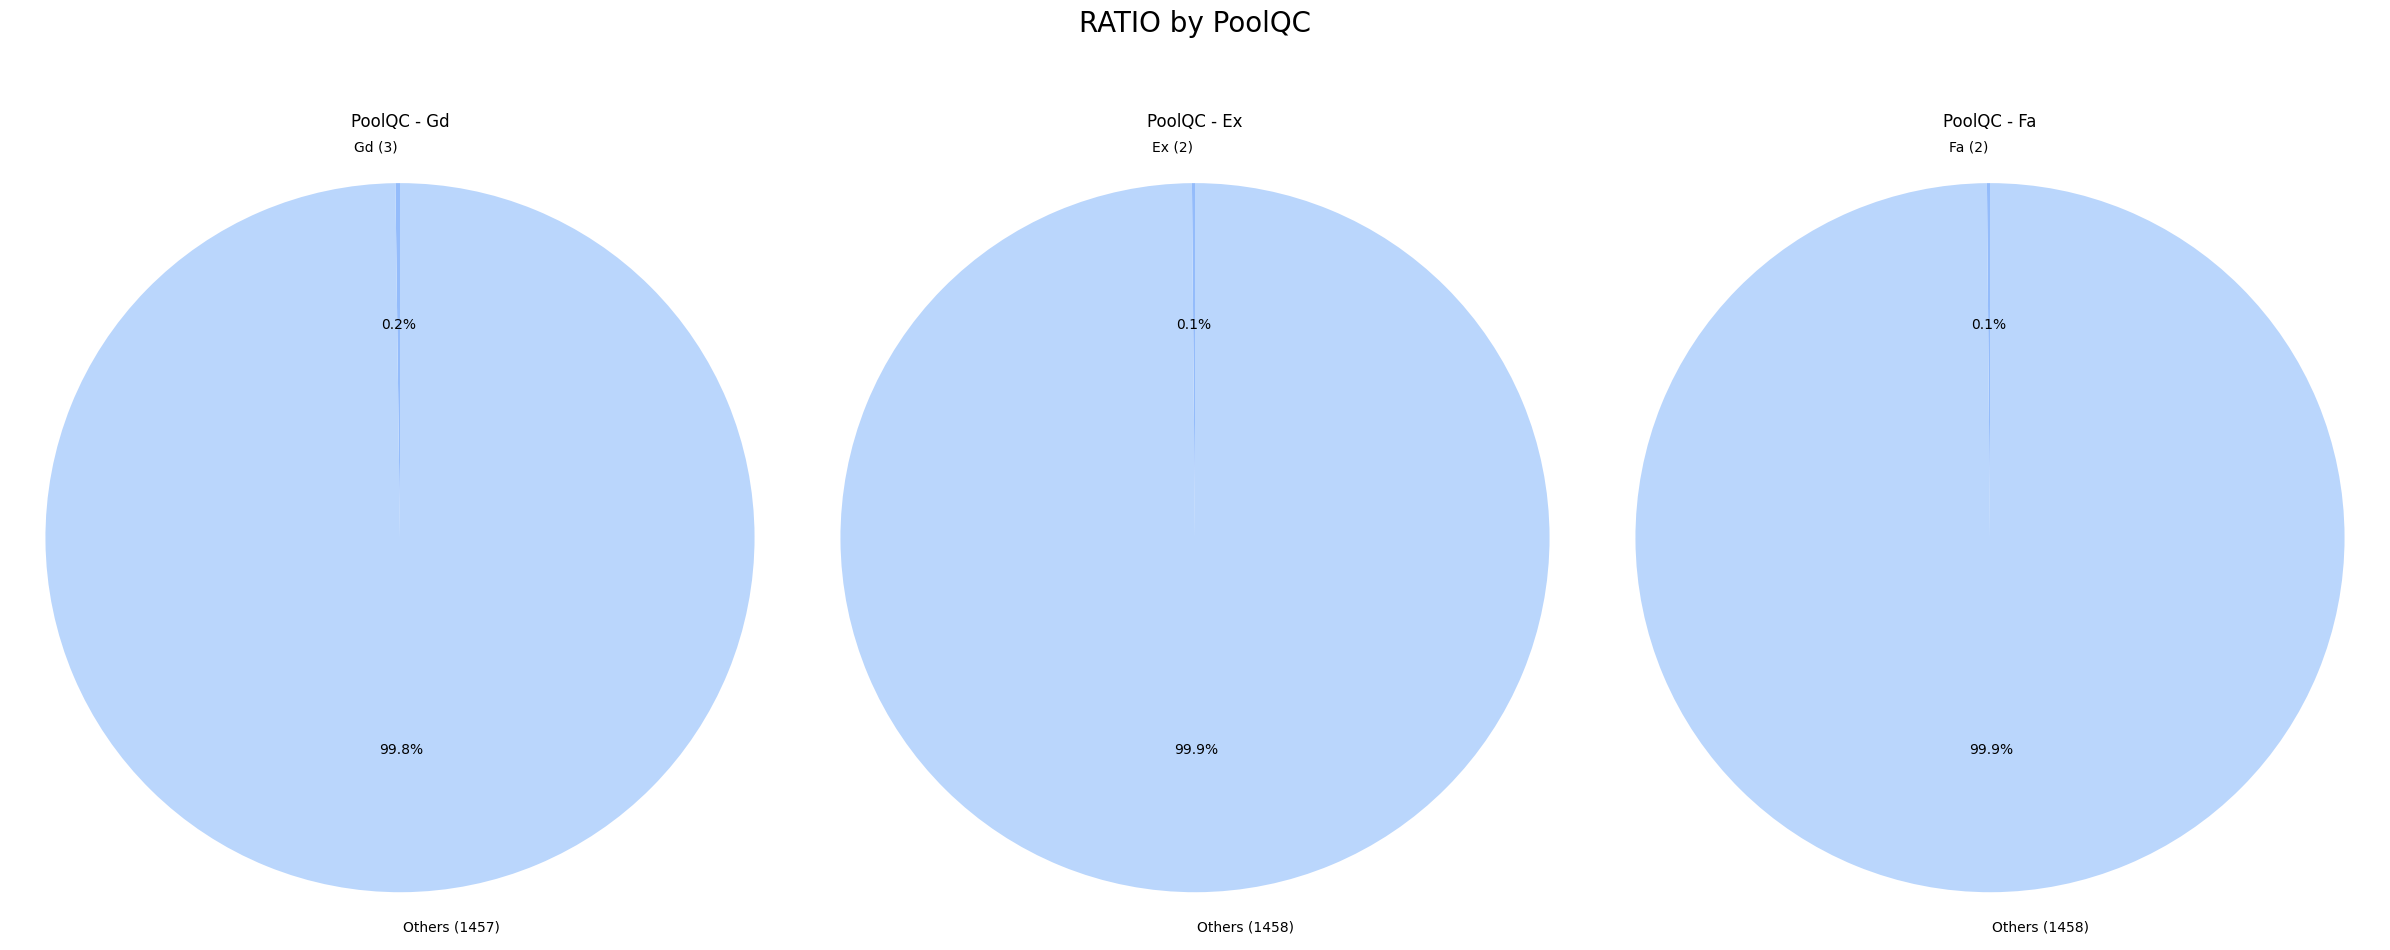

--------------------------------------------------------------------------------
       Fence  Ratio (%)
Fence                  
MnPrv    157  10.753425
GdPrv     59   4.041096
GdWo      54   3.698630
MnWw      11   0.753425
--------------------------------------------------------------------------------


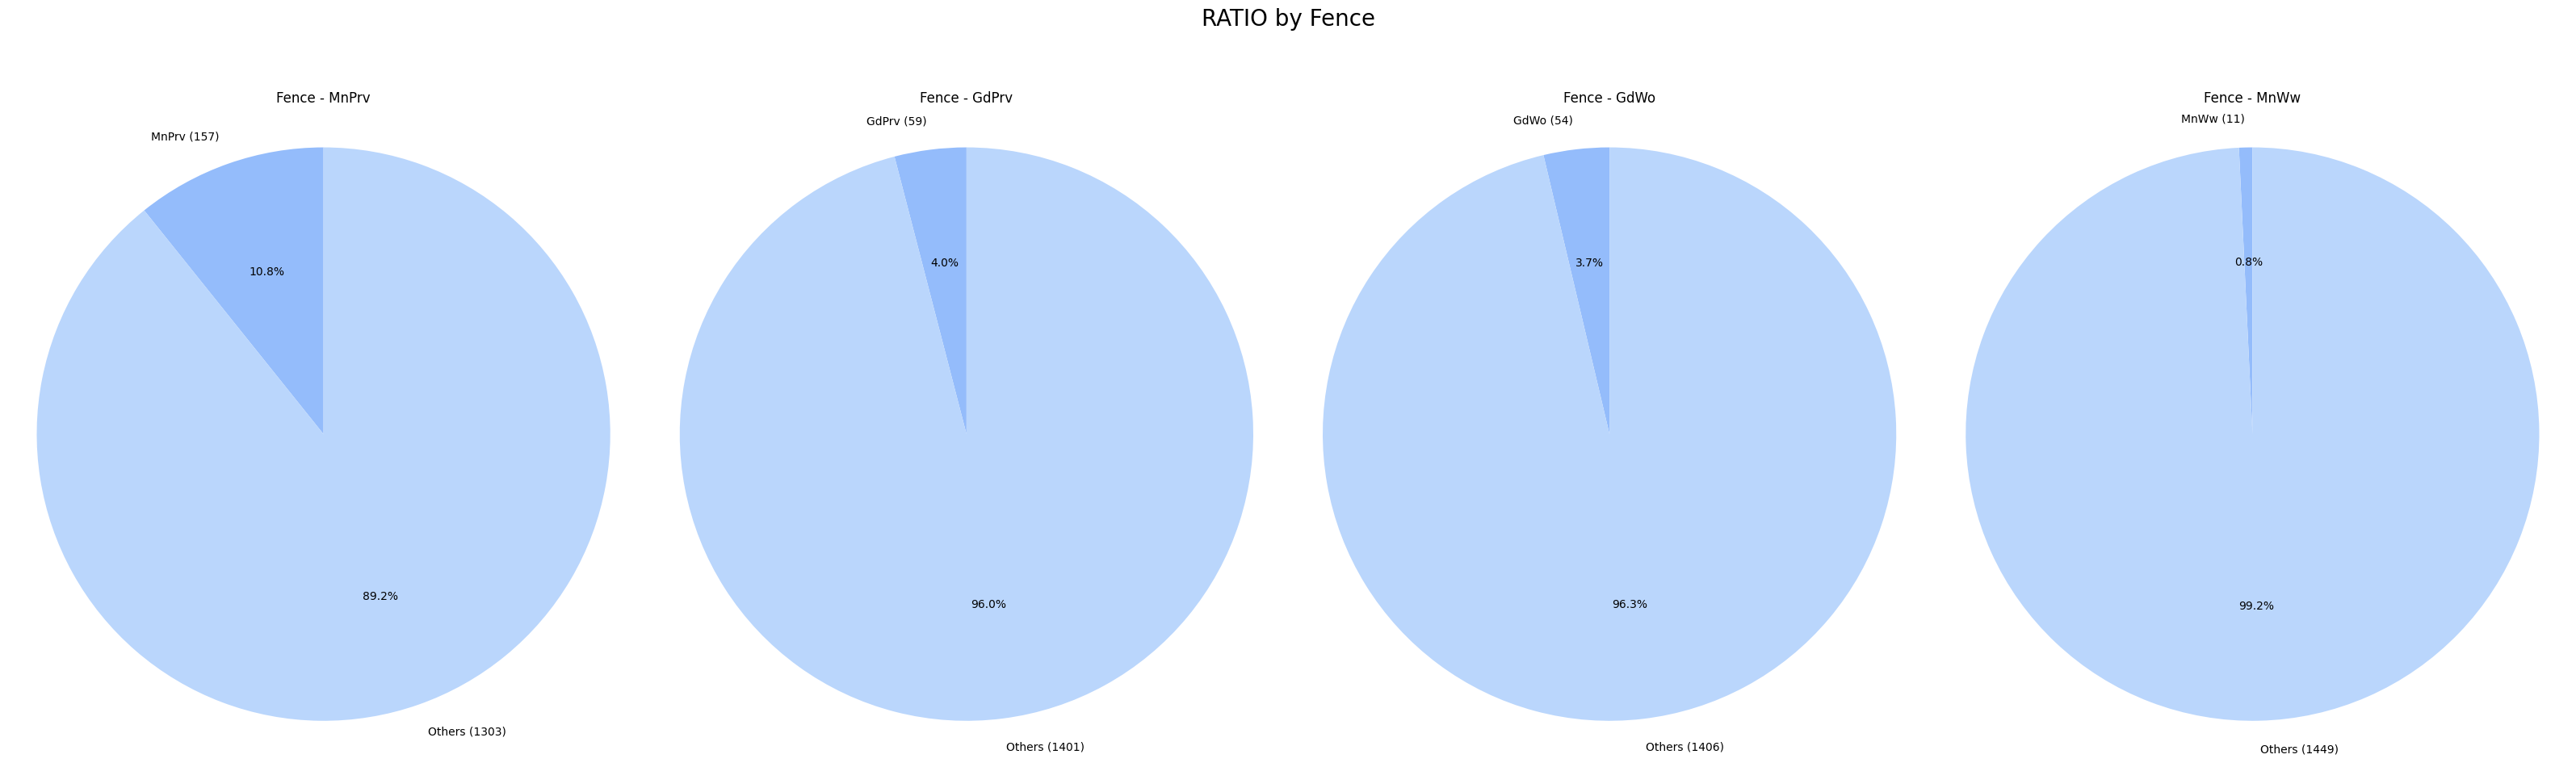

--------------------------------------------------------------------------------
             MiscFeature  Ratio (%)
MiscFeature                        
Shed                  49   3.356164
Gar2                   2   0.136986
Othr                   2   0.136986
TenC                   1   0.068493
--------------------------------------------------------------------------------


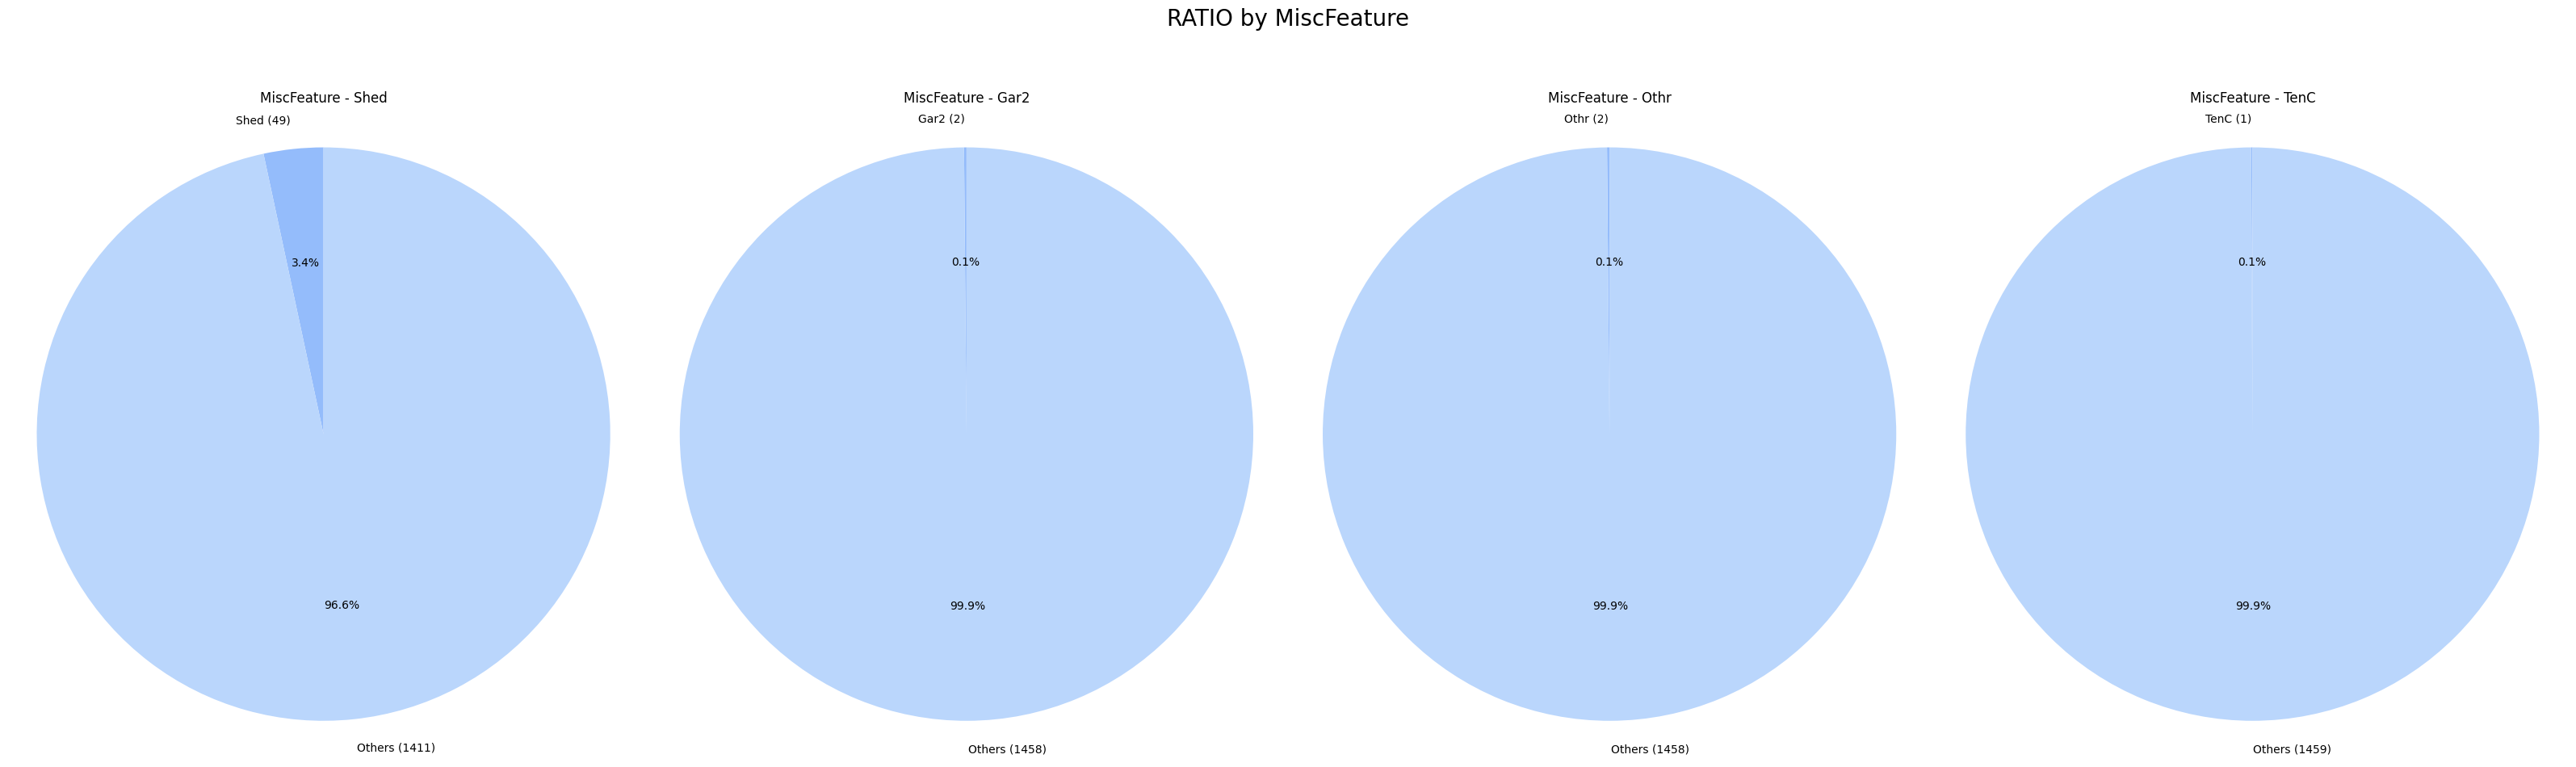

--------------------------------------------------------------------------------
          SaleType  Ratio (%)
SaleType                     
WD            1267  86.780822
New            122   8.356164
COD             43   2.945205
ConLD            9   0.616438
ConLI            5   0.342466
ConLw            5   0.342466
CWD              4   0.273973
Oth              3   0.205479
Con              2   0.136986
--------------------------------------------------------------------------------


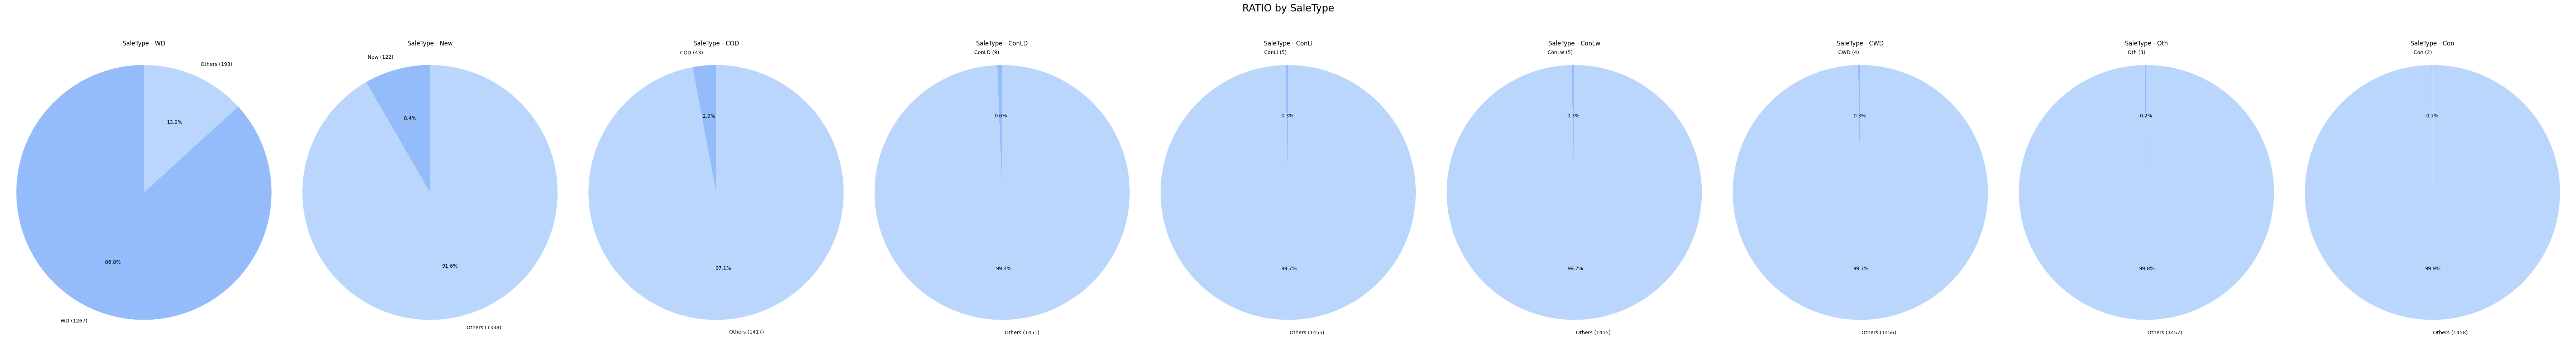

--------------------------------------------------------------------------------
               SaleCondition  Ratio (%)
SaleCondition                          
Normal                  1198  82.054795
Partial                  125   8.561644
Abnorml                  101   6.917808
Family                    20   1.369863
Alloca                    12   0.821918
AdjLand                    4   0.273973
--------------------------------------------------------------------------------


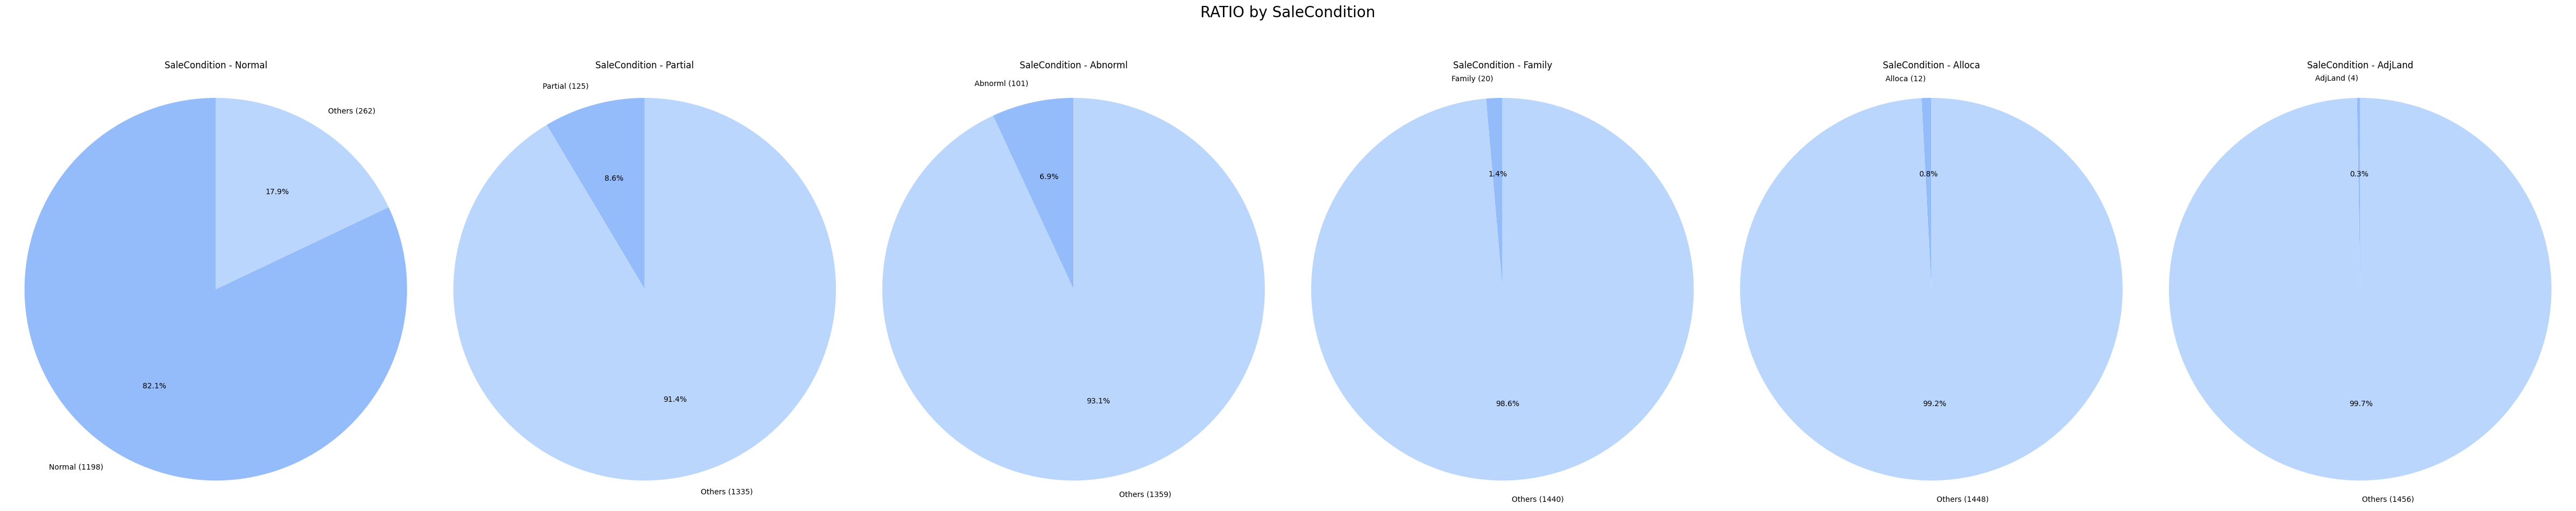

--------------------------------------------------------------------------------
             OverallCond  Ratio (%)
OverallCond                        
5                    821  56.232877
6                    252  17.260274
7                    205  14.041096
8                     72   4.931507
4                     57   3.904110
3                     25   1.712329
9                     22   1.506849
2                      5   0.342466
1                      1   0.068493
--------------------------------------------------------------------------------


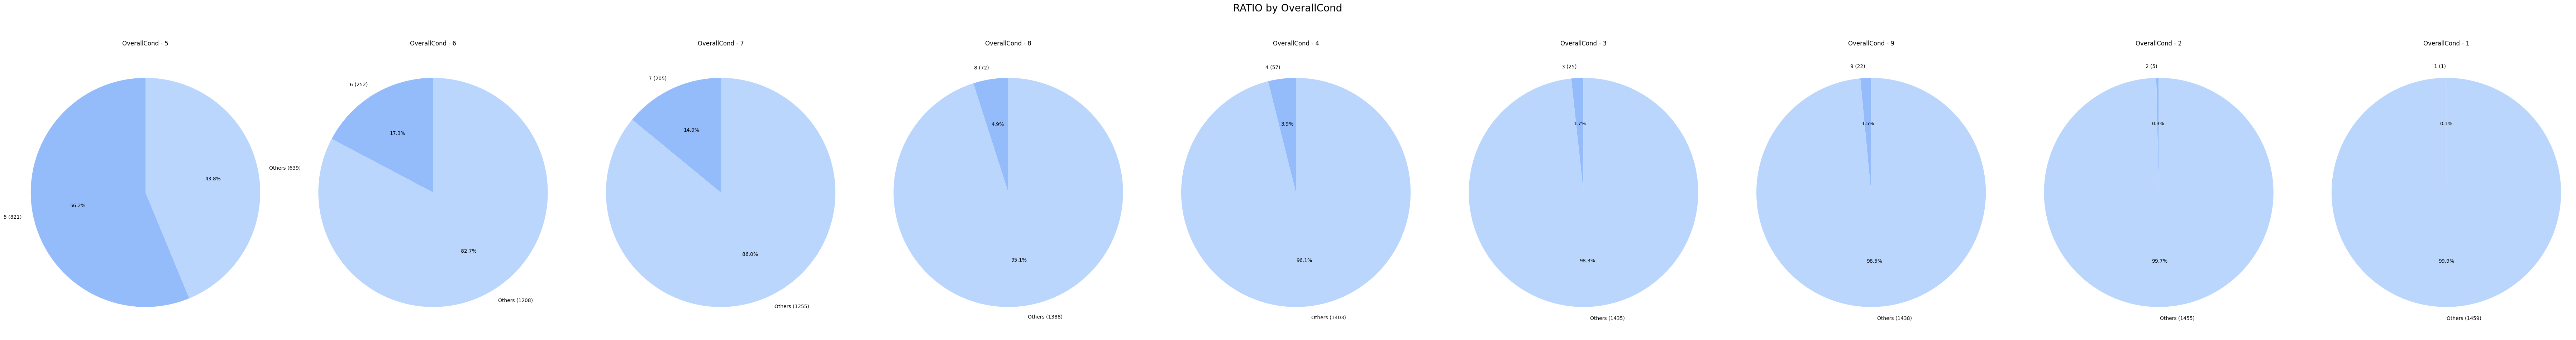

--------------------------------------------------------------------------------
              BsmtFullBath  Ratio (%)
BsmtFullBath                         
0                      856  58.630137
1                      588  40.273973
2                       15   1.027397
3                        1   0.068493
--------------------------------------------------------------------------------


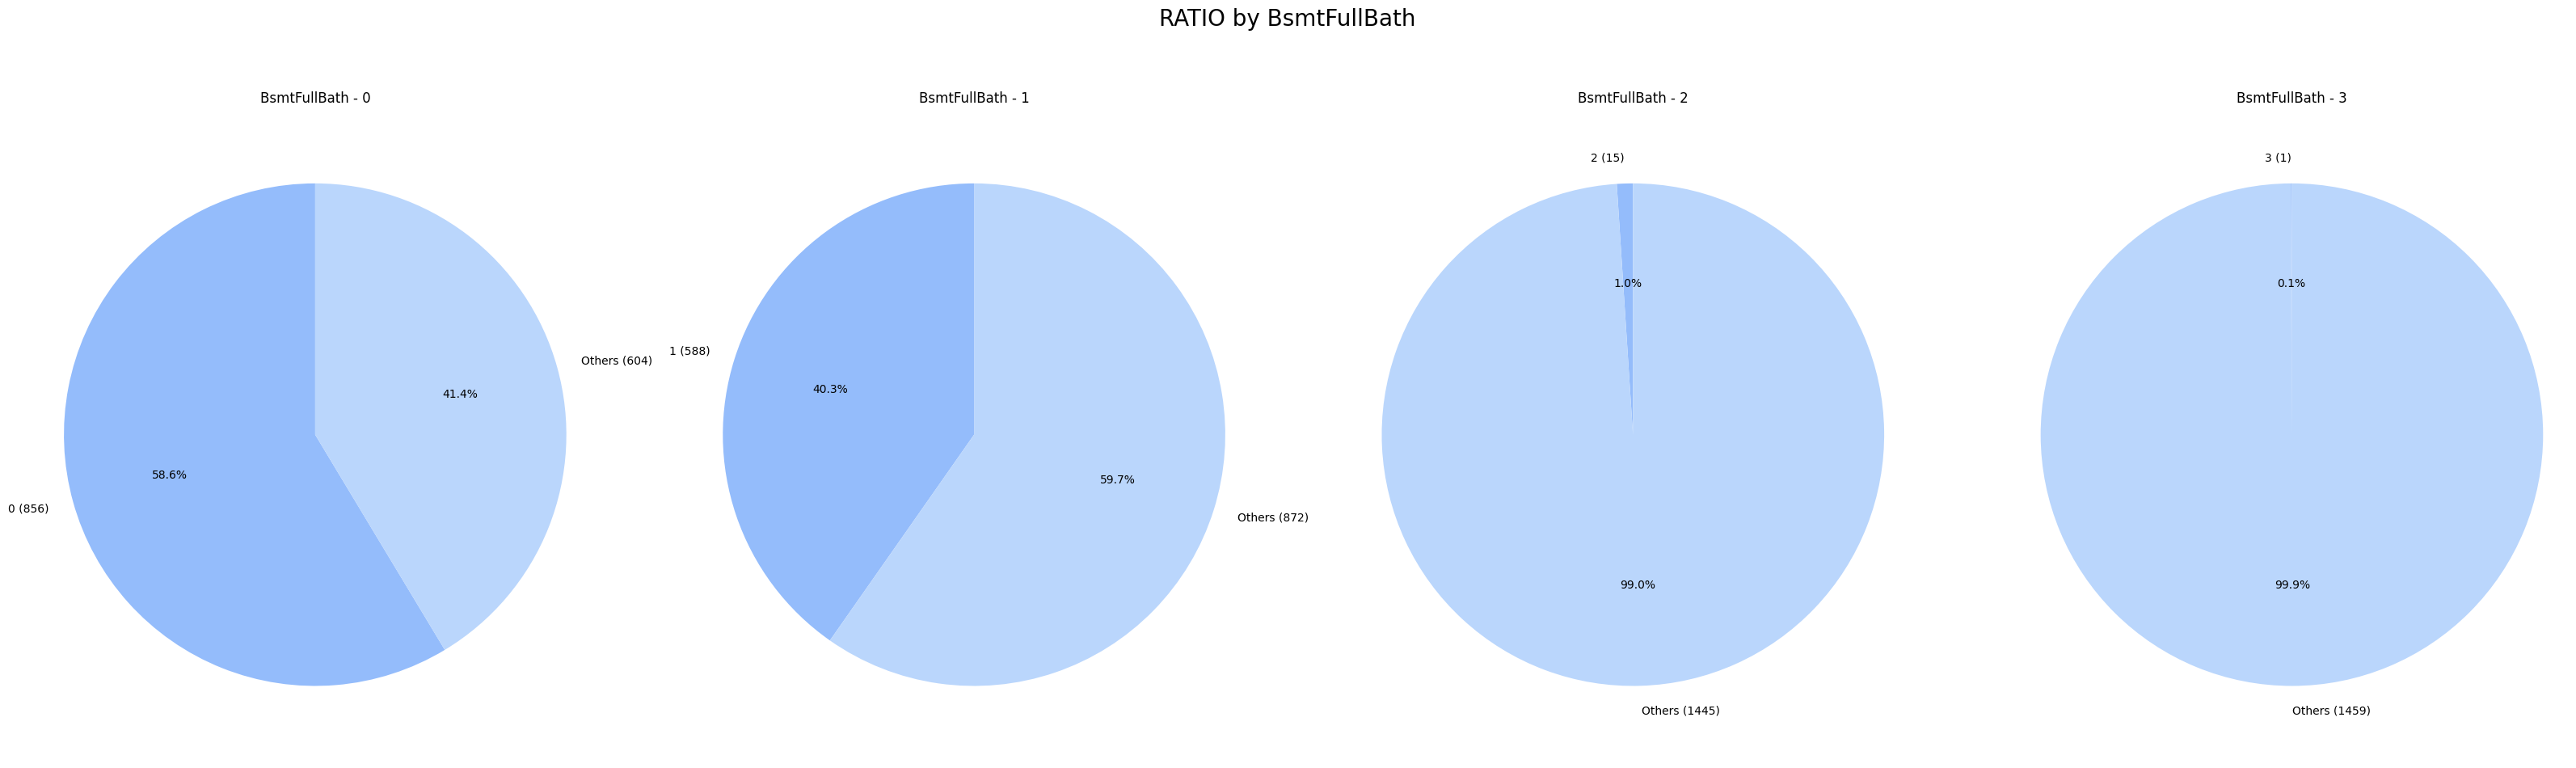

--------------------------------------------------------------------------------
              BsmtHalfBath  Ratio (%)
BsmtHalfBath                         
0                     1378  94.383562
1                       80   5.479452
2                        2   0.136986
--------------------------------------------------------------------------------


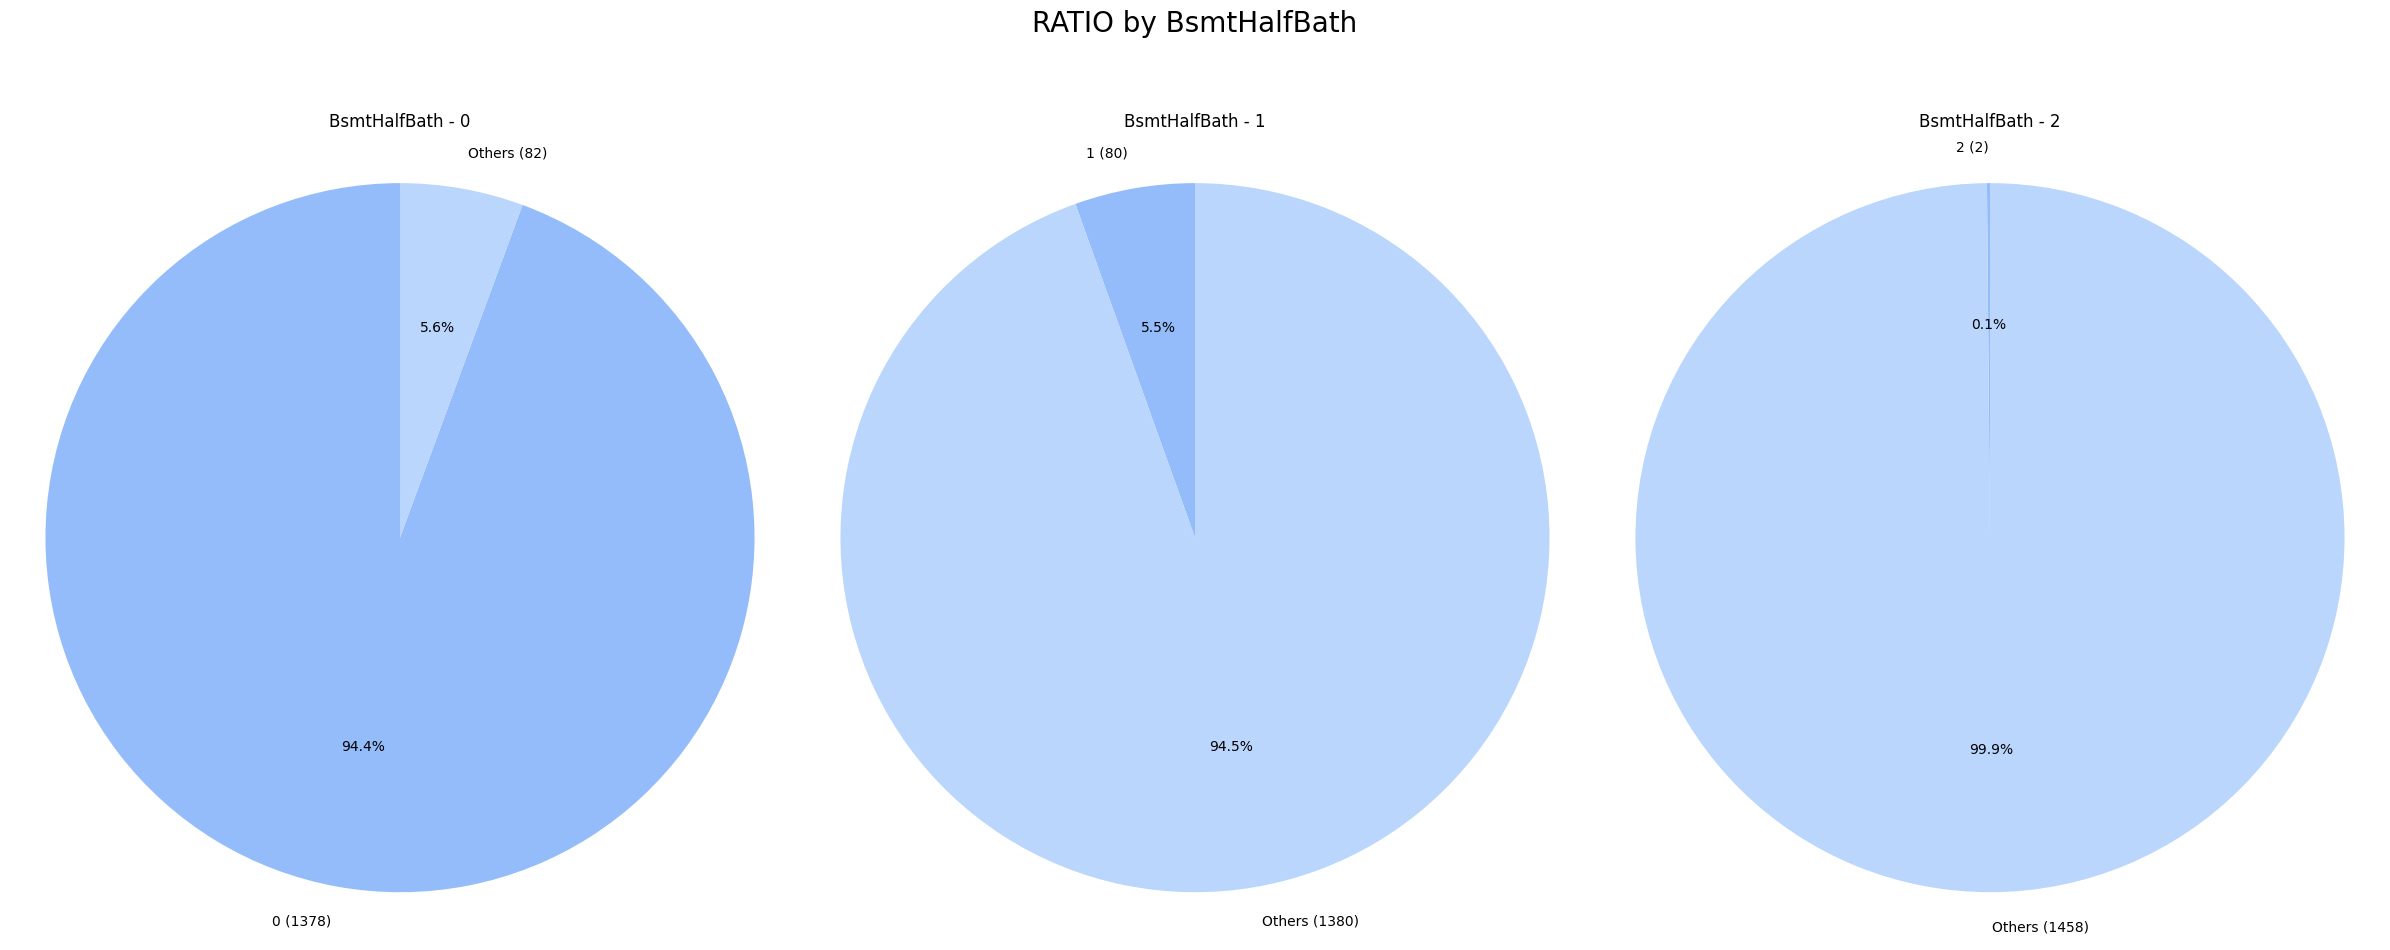

--------------------------------------------------------------------------------
          FullBath  Ratio (%)
FullBath                     
2              768  52.602740
1              650  44.520548
3               33   2.260274
0                9   0.616438
--------------------------------------------------------------------------------


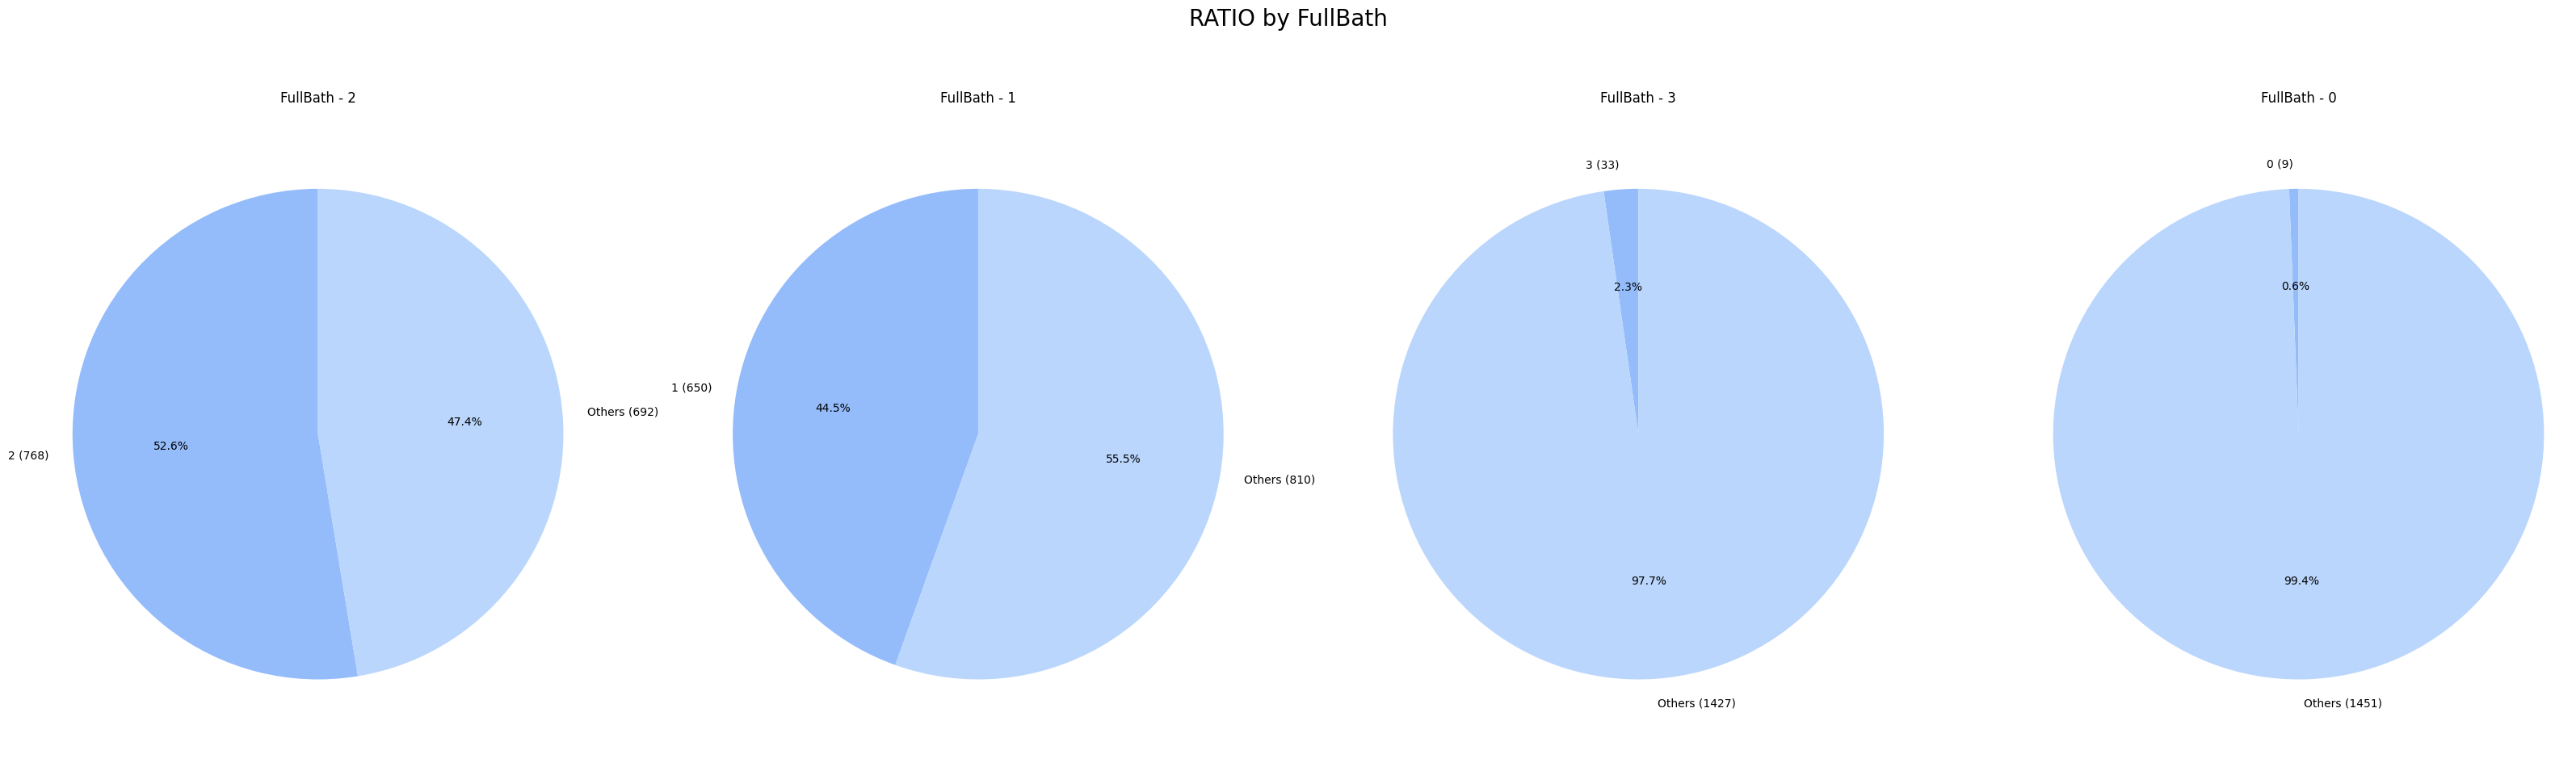

--------------------------------------------------------------------------------
          HalfBath  Ratio (%)
HalfBath                     
0              913  62.534247
1              535  36.643836
2               12   0.821918
--------------------------------------------------------------------------------


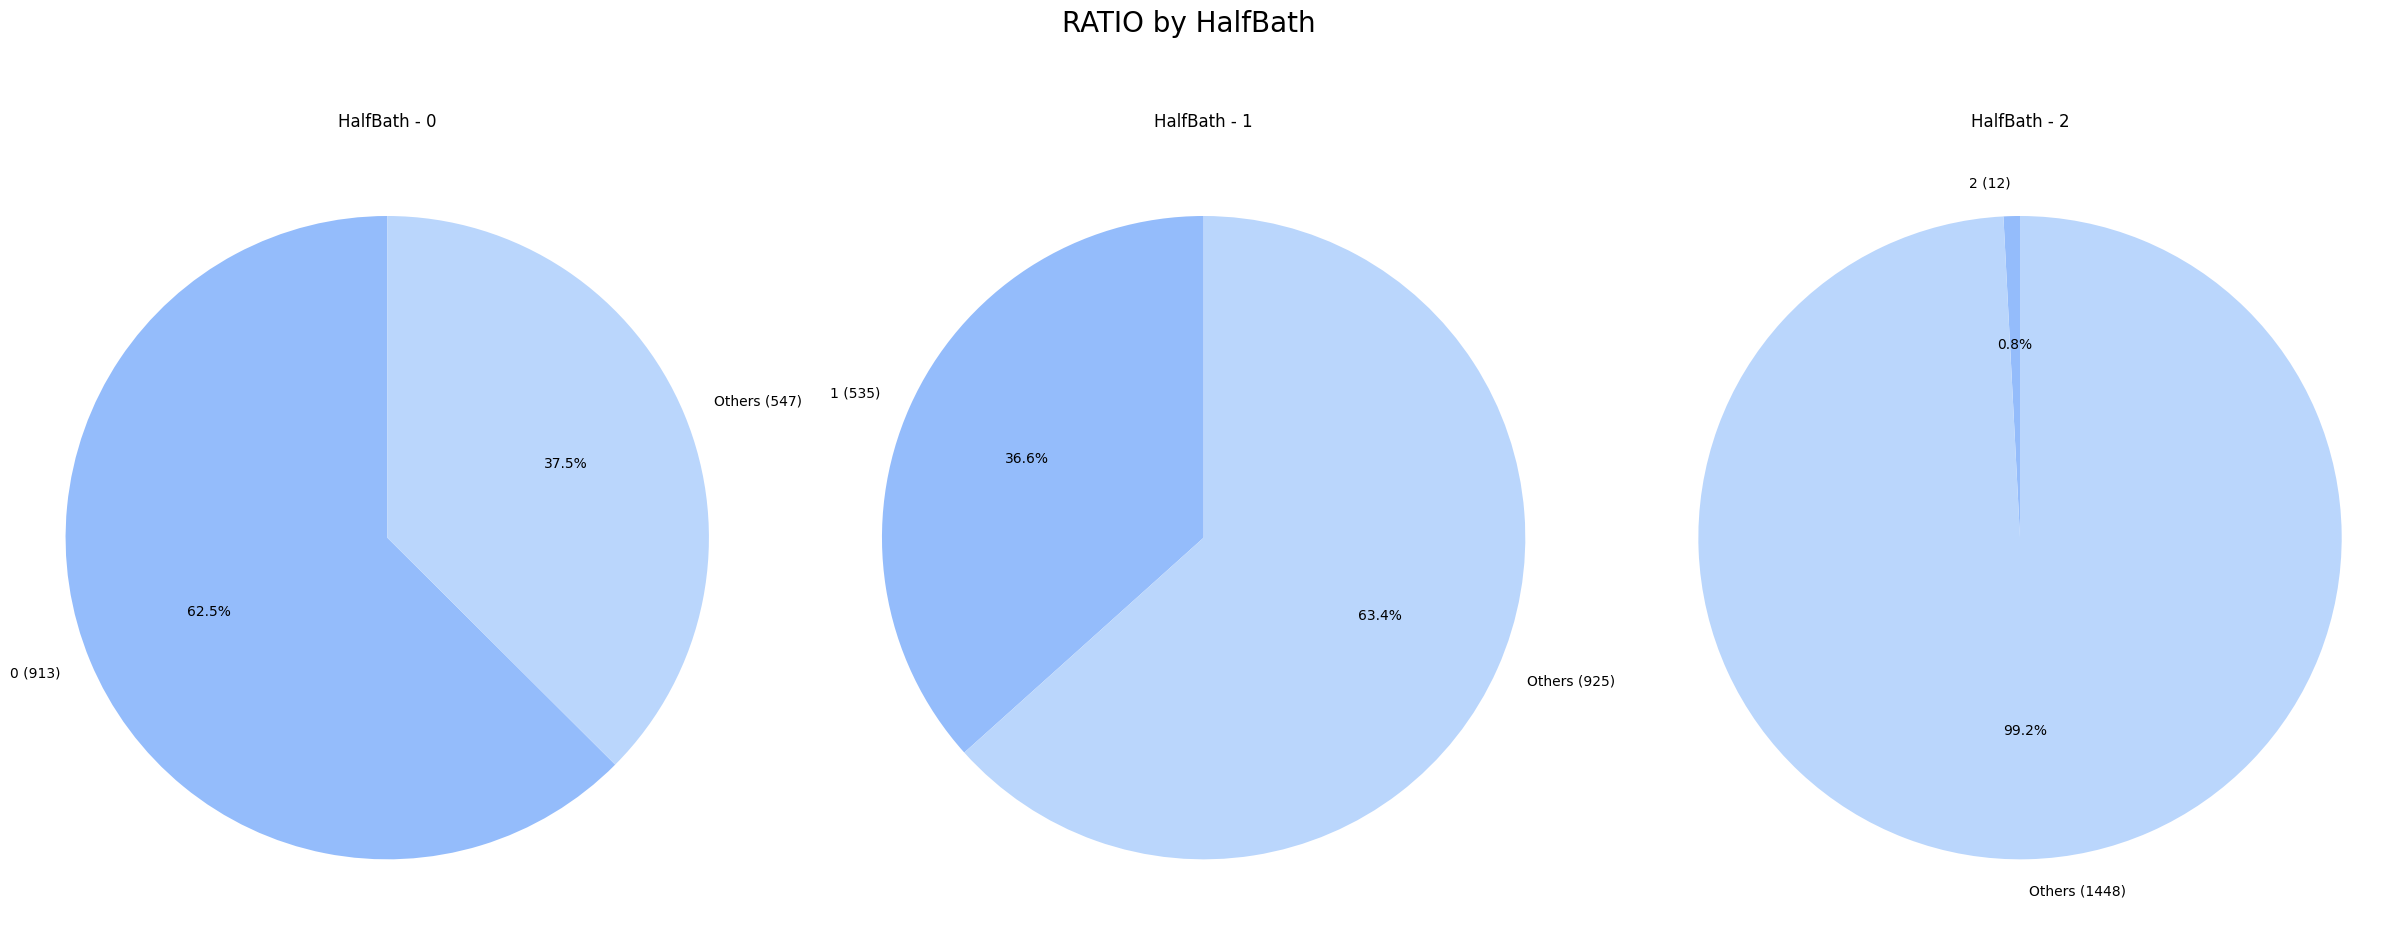

--------------------------------------------------------------------------------
              BedroomAbvGr  Ratio (%)
BedroomAbvGr                         
3                      804  55.068493
2                      358  24.520548
4                      213  14.589041
1                       50   3.424658
5                       21   1.438356
6                        7   0.479452
0                        6   0.410959
8                        1   0.068493
--------------------------------------------------------------------------------


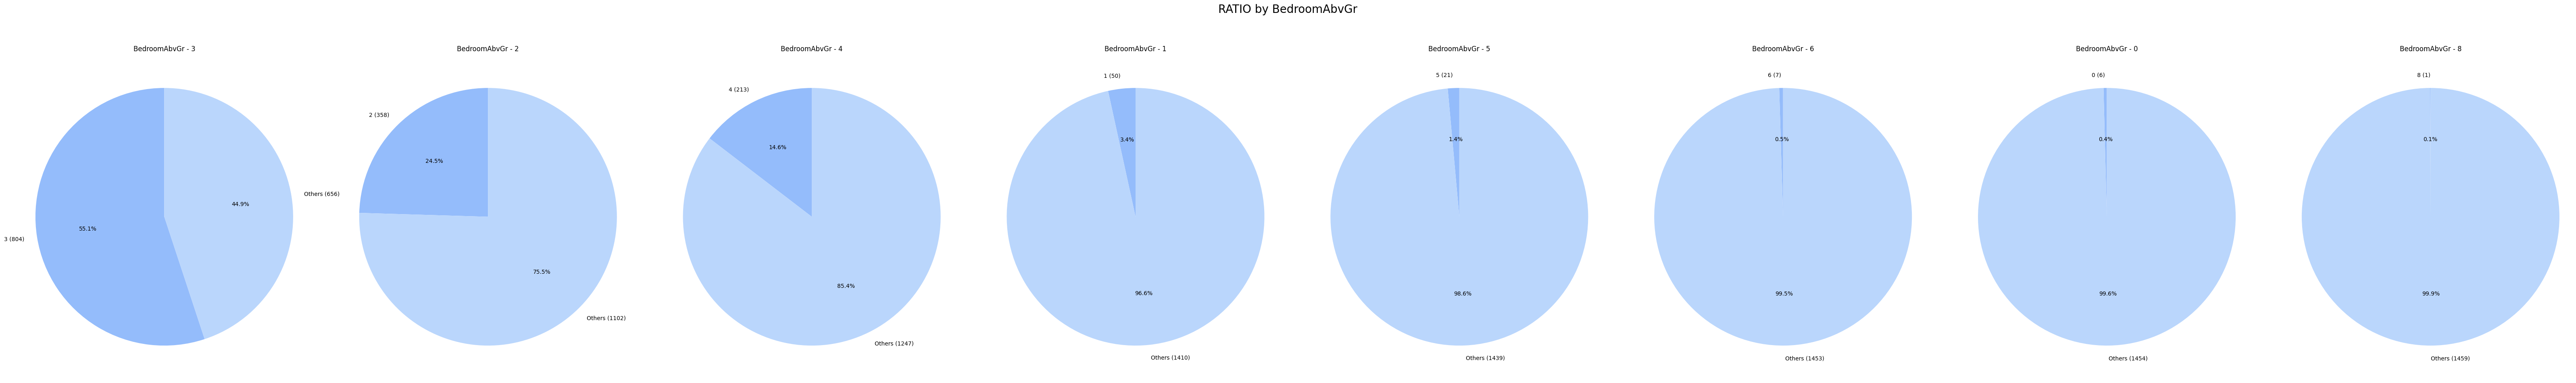

--------------------------------------------------------------------------------
              KitchenAbvGr  Ratio (%)
KitchenAbvGr                         
1                     1392  95.342466
2                       65   4.452055
3                        2   0.136986
0                        1   0.068493
--------------------------------------------------------------------------------


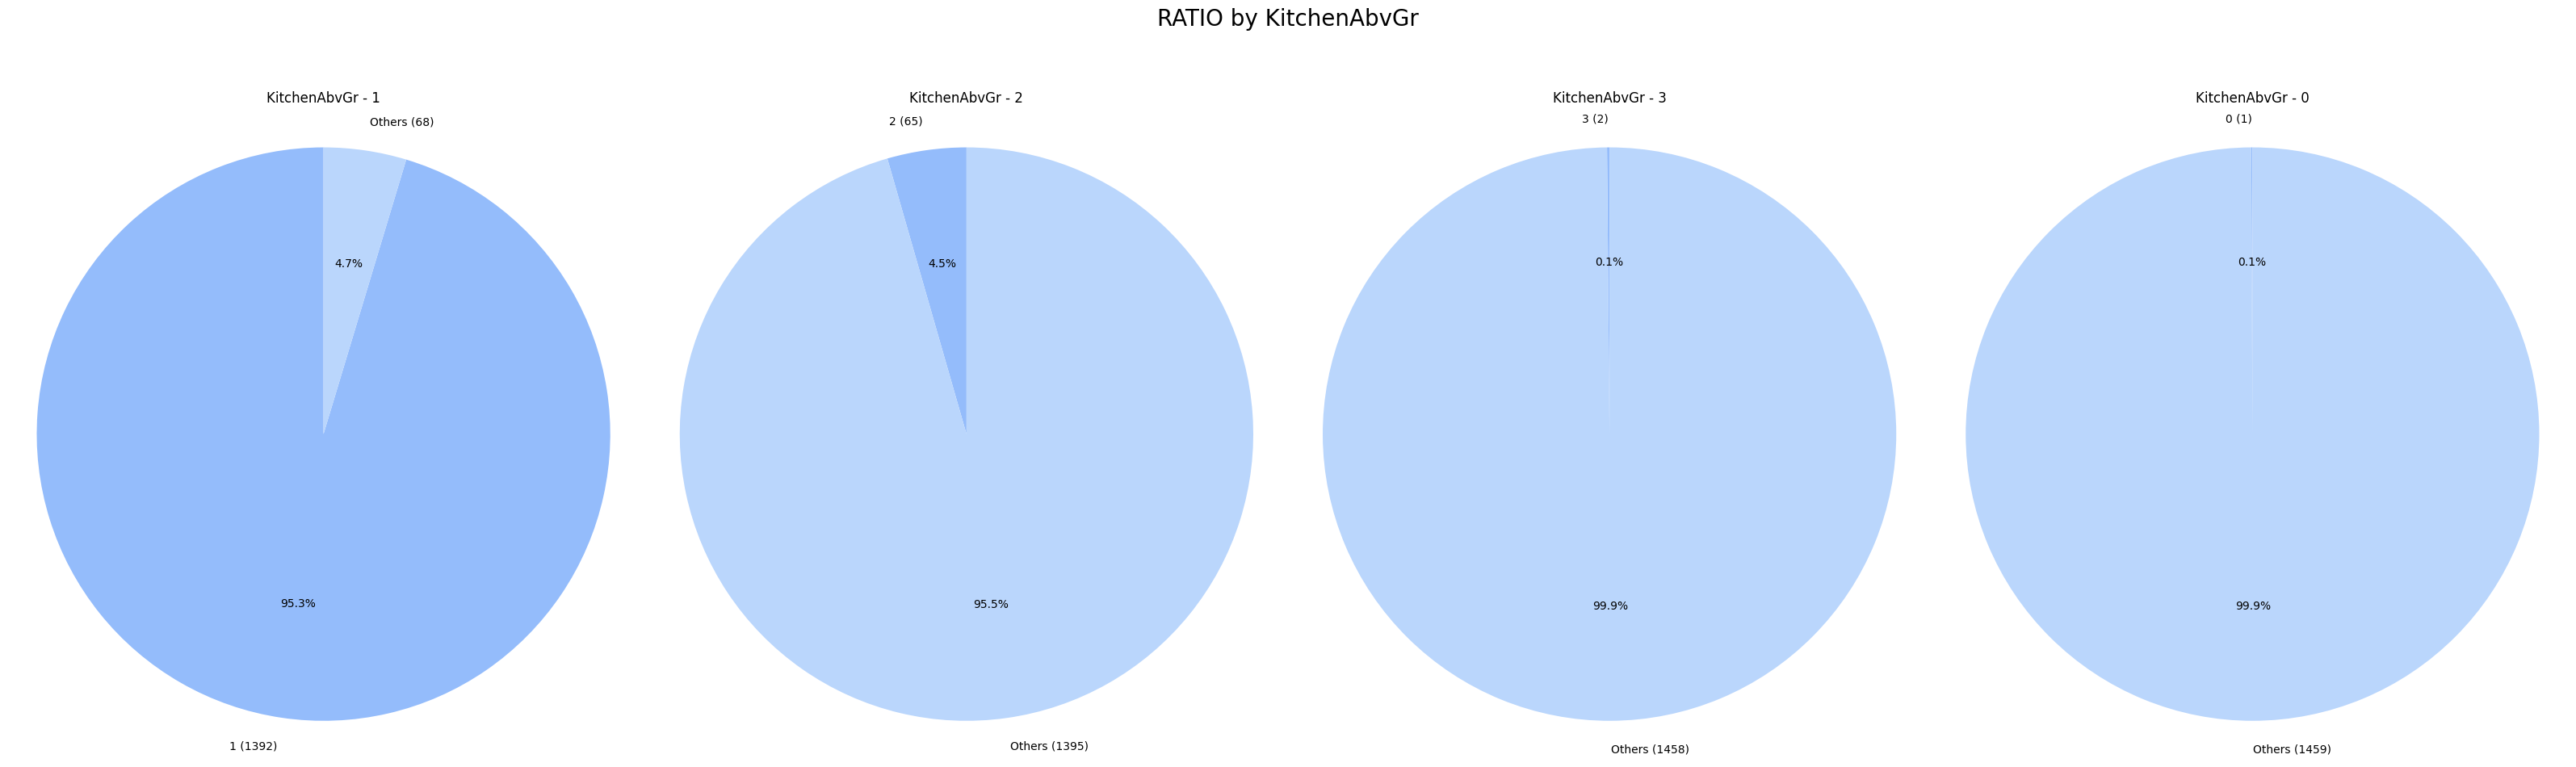

--------------------------------------------------------------------------------
            Fireplaces  Ratio (%)
Fireplaces                       
0                  690  47.260274
1                  650  44.520548
2                  115   7.876712
3                    5   0.342466
--------------------------------------------------------------------------------


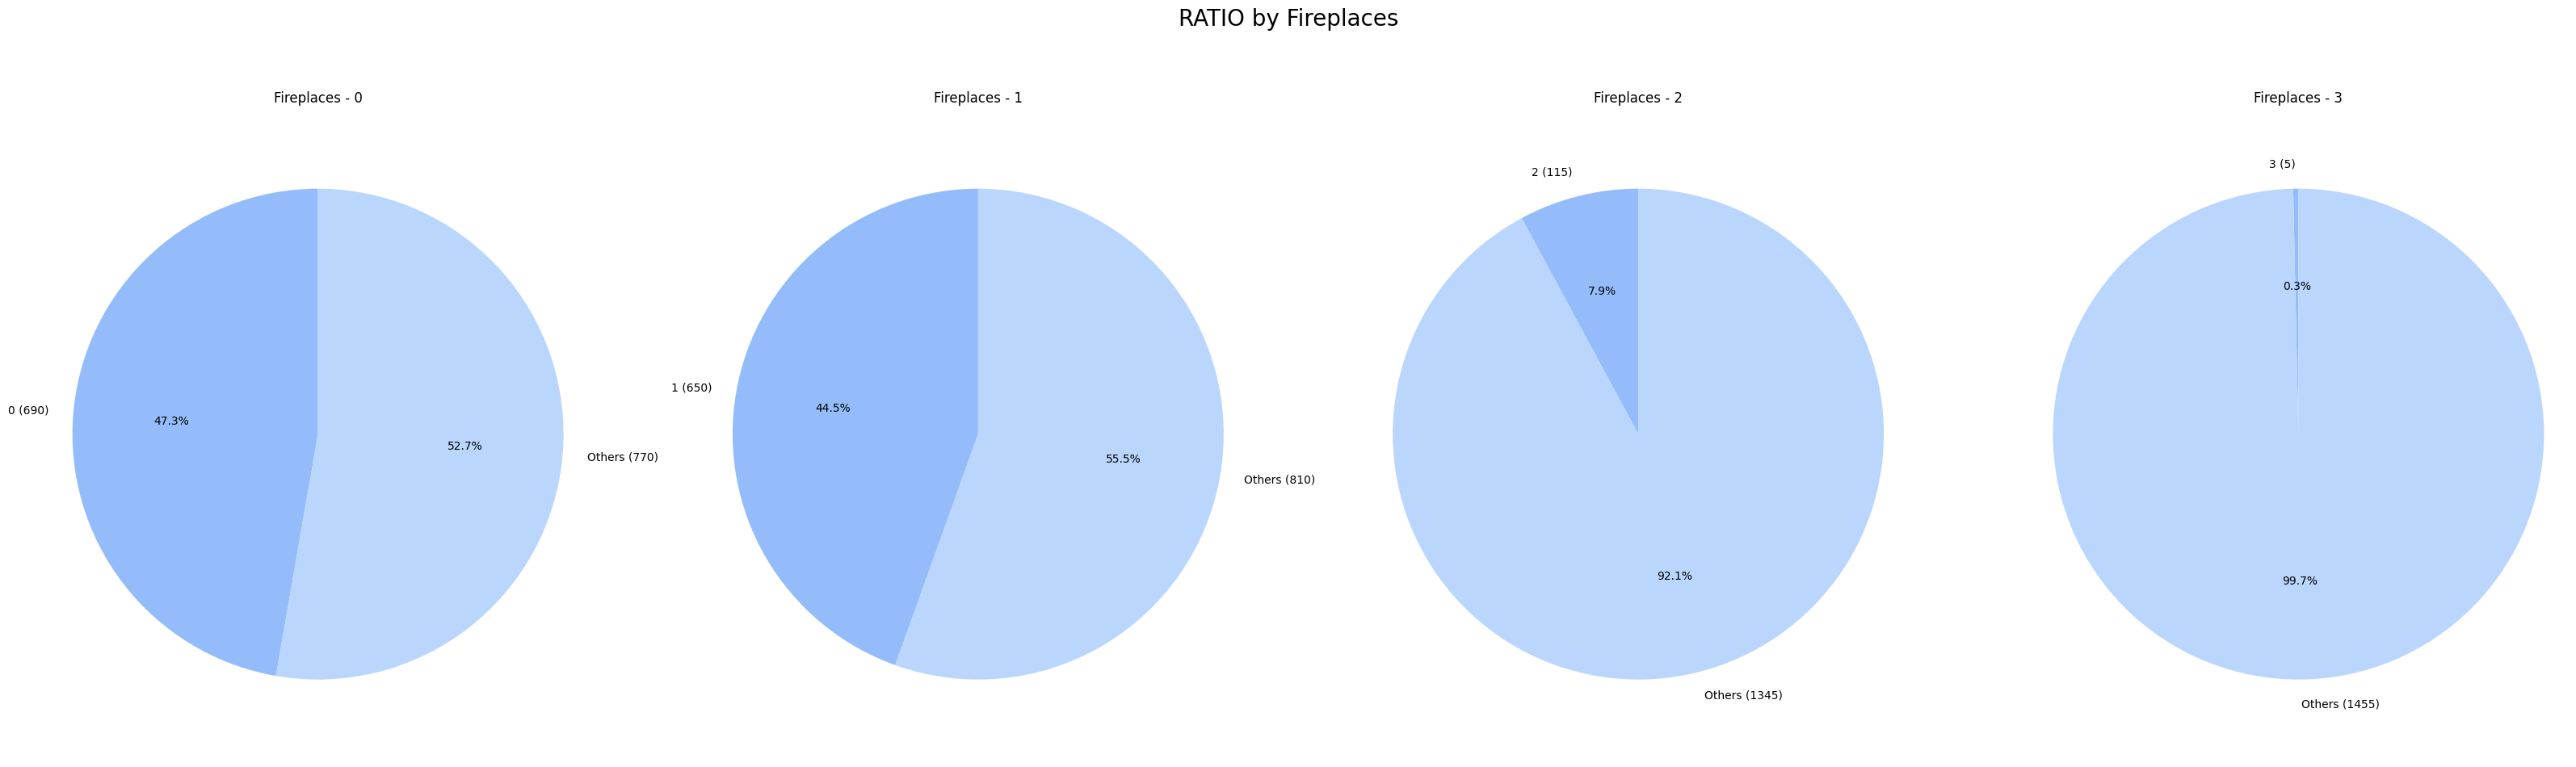

--------------------------------------------------------------------------------
            GarageCars  Ratio (%)
GarageCars                       
2                  824  56.438356
1                  369  25.273973
3                  181  12.397260
0                   81   5.547945
4                    5   0.342466
--------------------------------------------------------------------------------


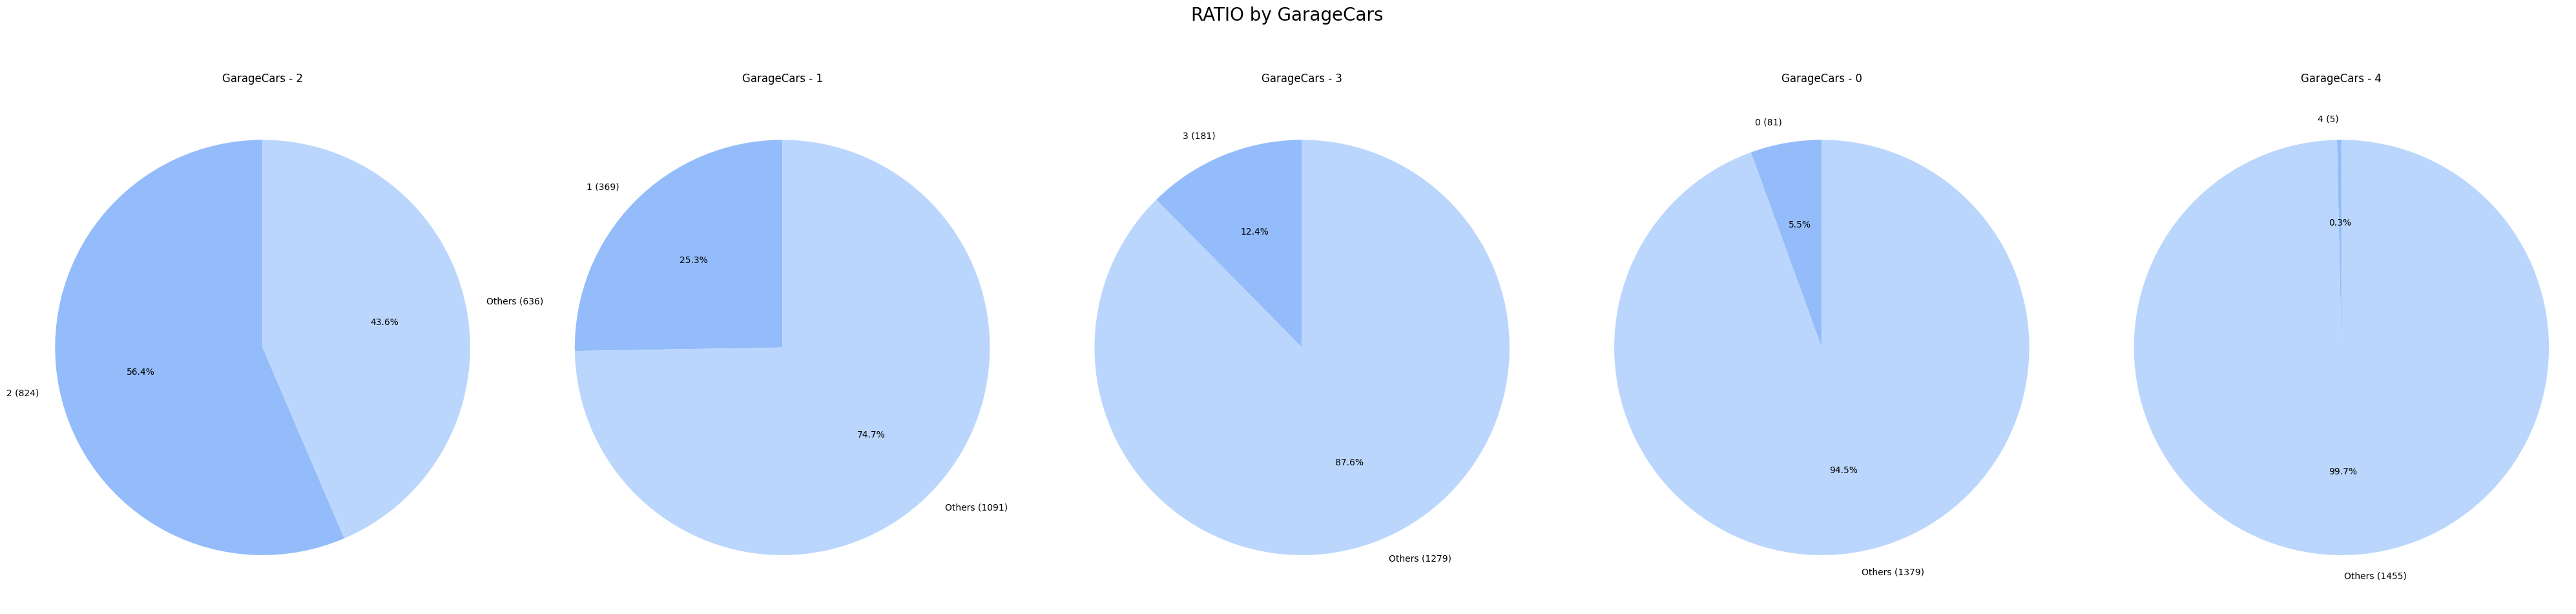

--------------------------------------------------------------------------------
          PoolArea  Ratio (%)
PoolArea                     
0             1453  99.520548
512              1   0.068493
648              1   0.068493
576              1   0.068493
555              1   0.068493
480              1   0.068493
519              1   0.068493
738              1   0.068493
--------------------------------------------------------------------------------


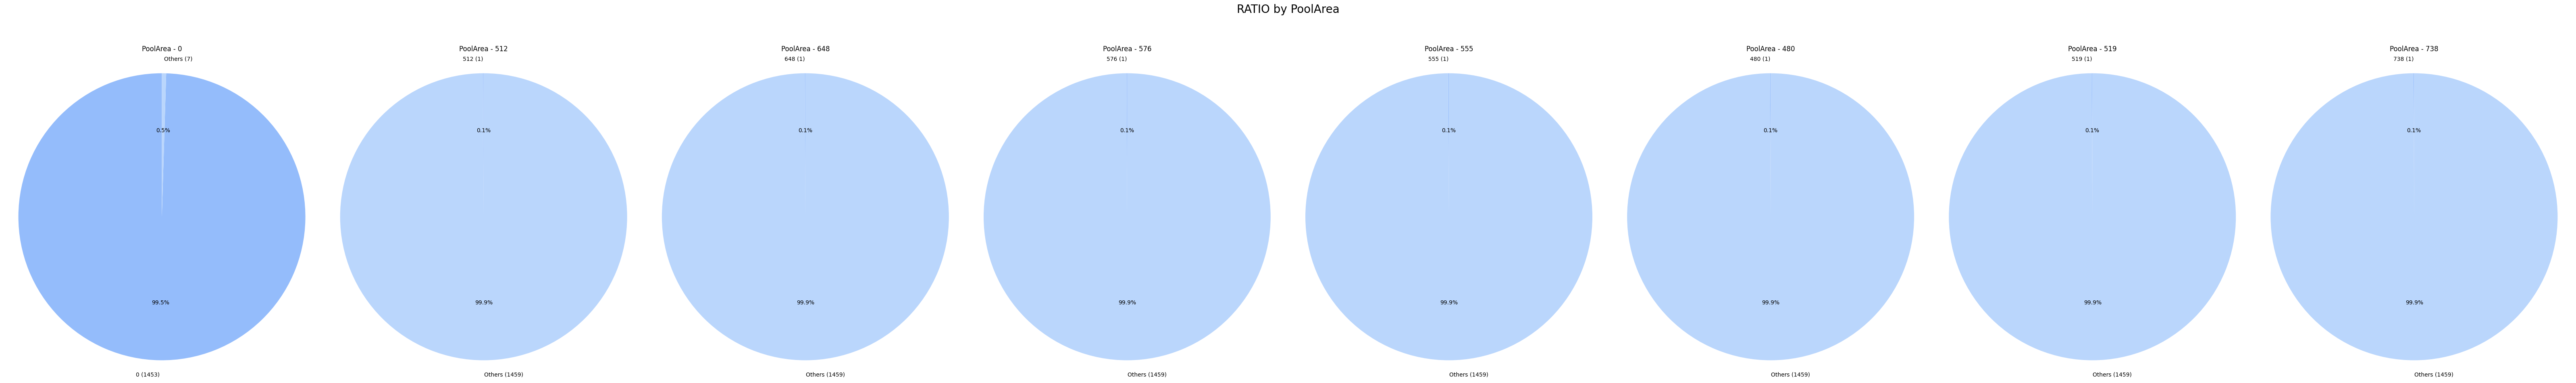

--------------------------------------------------------------------------------
        YrSold  Ratio (%)
YrSold                   
2009       338  23.150685
2007       329  22.534247
2006       314  21.506849
2008       304  20.821918
2010       175  11.986301
--------------------------------------------------------------------------------


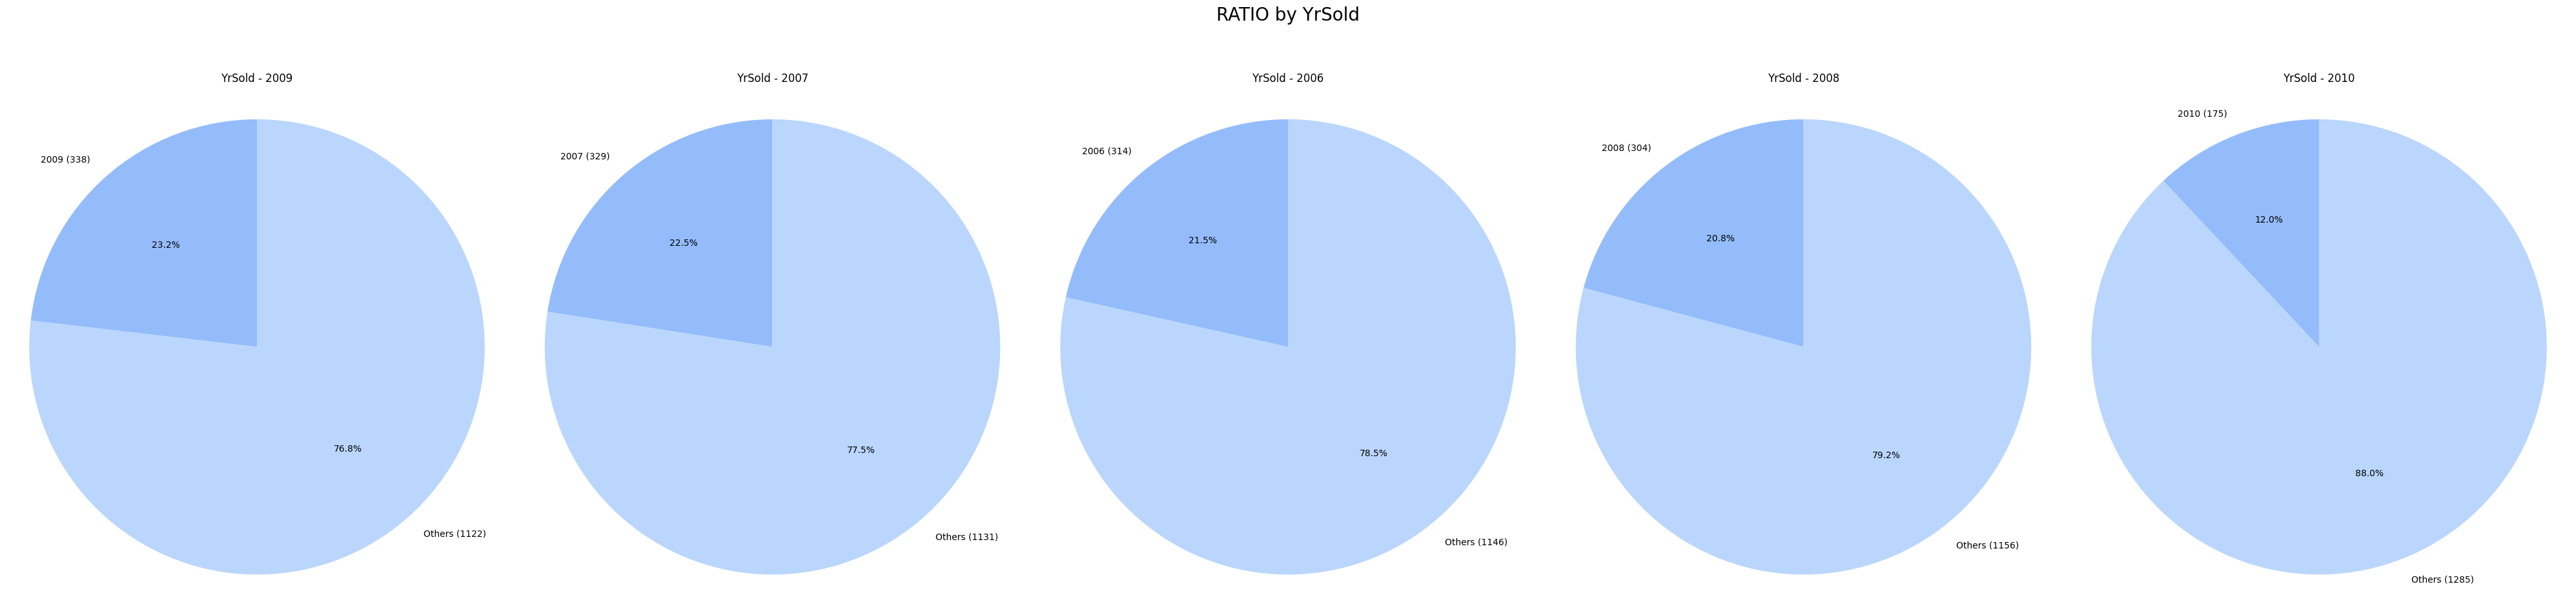

In [11]:
for col in cat_cols:
    to_analysis_cat(train, col, ratio=True, plot=True)